<left> <font size=5 style='font-family:Courier New' color='Blue' > **Project 3 - Supervised Learning (Classification):** 
<left> <font size=5 style='font-family:Courier New' color='Green' > **Loan Campaign**    

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Objective:** 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> Predicting whether a Customer will buy a Personal Loan or not...

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Data Dictionary:** 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 1. **ID**: Customer ID.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 2. **Age**: Customer’s age in completed years.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 3. **Experience**: No. of years of professional experience.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 4. **Income**: Annual income of the customer (in thousand dollars).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 5. **ZIP Code**: Home Address ZIP code.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 6. **Family**: The Family size of the customer. 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 7. **CCAvg**: Average spending on credit cards per month (in thousand dollars).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 8. **Education**: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 9. **Mortgage**: Value of house mortgage if any (in thousand dollars).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 10. **Personal_Loan**: Did this customer accept the personal loan offered in the last campaign?
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 11. **Securities_Account**: Does the customer have securities account with the bank?
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 12. **CD_Account**: Does the customer have a certificate of deposit (CD) account with the bank?
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 13. **Online**: Do customers use internet banking facilities?
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 14. **CreditCard**: Does the customer use a credit card issued by any other Bank (excluding AllLife Bank)?

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Case Understanding:** 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> It's quite clear and straightforward case study with small No. of Features. Initially, we will assume that the True Case is 1 while the False Case is 0.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> While main object is to find the features that either affecting the Depositor Customer to eather accept or reject the Personal Loan, we've to go through all features by processing them in a manner that results in clean, ordered, and minimum categorical Data Rows.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> Since it's obvious that some features are expected to be Numeric Type or Binary Type, other features might be in need for reprocessing to minimize the categories or even dropping them as they have no impact on Customer characteristics.  

<left> <font size=6 style='font-family:Courier New' color='Orange' > **1. Prework:**  

In [ ]:
# Start with importing the necessary libraries:
# 1. Data Reading and Manipulating:
import numpy as np 
import pandas as pd 

# 2. Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()

# 3. Logistic Regression/Decision Tree – Building, Splitting, Tuning, and Evaluating:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import (f1_score , accuracy_score , recall_score , 
                             precision_score , confusion_matrix , 
                             roc_auc_score , precision_recall_curve , roc_curve)

# 4. Displaying all Columns and 200 Rows: 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('mode.chained_assignment', None)

# 5. Suppressing warnings:
import warnings
warnings.filterwarnings("ignore")

# 6. Grid Settings:
sns.set_style(style = 'darkgrid')

# 7. Code Structuring:
!pip install nb-black 

# 8. Supress Warning Library Module:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the csv file and assign it to a variable df:

df = pd.read_csv('Project_03_SupervisedLearning_Classification_LoanCampaign_Dataset.csv')

<left> <font size=6 style='font-family:Courier New' color='Orange' > **2. Sanity Check:**  

In [3]:
# Ensuring that everything is working as expected by displaying the First 5 Data Rows:

df.head().style.set_properties(**{'color': 'green'})

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000000,2,0,0,0,0,0,1


In [4]:
# Displaying the Last 5 Data Rows:

df.tail().style.set_properties(**{'color': 'green'})

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800000,1,0,0,0,0,1,1


In [5]:
# Examining the No. of Data Rows and Columns:

print('\033[0m', '\033[92m' , 'Personal Loan Campaign Dataset contins' , df.shape[0] , 'Data Rows and' , df.shape[1] , 'columns.')

  Personal Loan Campaign Dataset contins 5000 Data Rows and 14 columns.


In [6]:
# Examining the Dataset Information and Data Types:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# Displayinh the No. of Non-Null/Null/Zero Entries in the Columns:

def summary(x):
    column = x.columns.values.tolist()
    dtype = [x[i].dtypes for i in x.columns]
    non_null = [x[i].notnull().sum() for i in column]
    null = [x[i].isnull().sum() for i in column]
    zero = [x[i].eq(0).sum() for i in column]
    summary_df = pd.DataFrame(data = {'Column Name' : column ,
                                      'Column Type' : dtype ,
                                      'Non-Null Entries' : non_null , 
                                      'Null Entries' : null , 
                                      'Zero Entries' : zero})
    return summary_df

summary(df).style.set_properties(**{'color': 'green'})

,Column Name,Column Type,Non-Null Entries,Null Entries,Zero Entries
0,ID,int64,5000,0,0
1,Age,int64,5000,0,0
2,Experience,int64,5000,0,66
3,Income,int64,5000,0,0
4,ZIPCode,int64,5000,0,0
5,Family,int64,5000,0,0
6,CCAvg,float64,5000,0,106
7,Education,int64,5000,0,0
8,Mortgage,int64,5000,0,3462
9,Personal_Loan,int64,5000,0,4520


##### <left> <font size=5 style='font-family:Courier New' color='Grey'> **2.1 Observations:**
<left> <font size=3 style='font-family:Courier New' color='black'> **1.** Dataset consists of 5,000 Data Rows and 14 Columns.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** There are 0 Columns with Missing Values.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** ID Column adds Zero Value to the Dataset; It can be dropped safely without affecting our analysis.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** All Columns are int64 Data Type except CCAvg Column which has float64 Data Type.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** Experience Column has 66 Zero Values; It indicates Customers with Zero Experience (Unemployed) which is realistic.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** CCavg Column has 106 Zero Values; It indicates Customers who don't use Credit Cards.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Mortage Column has 3,462 Zero Values; It indicates Customers who don't owe the bank any mortgages.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8.** Personal_Loan Column has 4,520 Zero Values; It indicates Customers who don't owe the bank any Loans.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **9.** CD_Account Column has 4,698 Zero Values; It indicates Customers who don't have a Certificate of Deposit.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **10.** Online Column has 2,016 Zero Values; It indicates Customers who don't use the Internet Banking Facilities.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **11.** Credit Card Column has 3,530 Zero Values; It indicates Customers who don't have Credit Cards issued by other Banks.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **12.** Data Types for all columns look good and no need for any conversion.

In [8]:
'''
We will investigate the values inside some Important columns which - by sense - shall have 
a specific categories/reasonable ranges:
'''

var = ['Family' , 'Personal_Loan' , 'Education' , 'Securities_Account' , 'CD_Account' , 'Online' , 'CreditCard'] 
for i in var:
    print('\033[1m' , '\033[92m' , f'{i}: {df[i].value_counts().count()} Distinct Entries' , '\033[0m' , '\033[92m' , )
    print(df[i].value_counts())
    print("-"*40)

  Family: 4 Distinct Entries  
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
----------------------------------------
  Personal_Loan: 2 Distinct Entries  
0    4520
1     480
Name: Personal_Loan, dtype: int64
----------------------------------------
  Education: 3 Distinct Entries  
1    2096
3    1501
2    1403
Name: Education, dtype: int64
----------------------------------------
  Securities_Account: 2 Distinct Entries  
0    4478
1     522
Name: Securities_Account, dtype: int64
----------------------------------------
  CD_Account: 2 Distinct Entries  
0    4698
1     302
Name: CD_Account, dtype: int64
----------------------------------------
  Online: 2 Distinct Entries  
1    2984
0    2016
Name: Online, dtype: int64
----------------------------------------
  CreditCard: 2 Distinct Entries  
0    3530
1    1470
Name: CreditCard, dtype: int64
----------------------------------------


<left> <font size=5 style='font-family:Courier New' color='Grey'> **2.2 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customer's Family Members varying from 1 to 4 which is realistic (1 might indicate a Single Customer).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Out of 5,000 Customers, only 480 have accepted the Personal Loan in the last Campaign of AllLife Bank (Personal Loan is our Target Variable).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** 3 Types of Education Levels have been found (1: Undergrad; 2: Graduate; 3: Advanced/Professional), No out-of-range values have been observed. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Out of 5,000 Customers, only 522 have Security Accounts in AllLife Bank.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** Out of 5,000 Customers, only 2,984 do use the Internet Banking Facilities of AllLife Bank.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** Out of 5,000 Customers, only 1,470 do use a Credit Card issued by other (Competitor) Bank.

In [9]:
# It's the time to verify statistics of all Columns:

df.describe(include='all').T.style.set_properties(**{'color': 'green'})

,count,mean,std,min,25%,50%,75%,max
ID,5000.000000,2500.500000,1443.520003,1.000000,1250.750000,2500.500000,3750.250000,5000.000000
Age,5000.000000,45.338400,11.463166,23.000000,35.000000,45.000000,55.000000,67.000000
Experience,5000.000000,20.104600,11.467954,-3.000000,10.000000,20.000000,30.000000,43.000000
Income,5000.000000,73.774200,46.033729,8.000000,39.000000,64.000000,98.000000,224.000000
ZIPCode,5000.000000,93169.257000,1759.455086,90005.000000,91911.000000,93437.000000,94608.000000,96651.000000
Family,5000.000000,2.396400,1.147663,1.000000,1.000000,2.000000,3.000000,4.000000
CCAvg,5000.000000,1.937938,1.747659,0.000000,0.700000,1.500000,2.500000,10.000000
Education,5000.000000,1.881000,0.839869,1.000000,1.000000,2.000000,3.000000,3.000000
Mortgage,5000.000000,56.498800,101.713802,0.000000,0.000000,0.000000,101.000000,635.000000
Personal_Loan,5000.000000,0.096000,0.294621,0.000000,0.000000,0.000000,0.000000,1.000000


<left> <font size=5 style='font-family:Courier New' color='Grey'> **2.3 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** As Seen, ID Column has no value and shall be dropped accordingly.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Average Age of Customers is 45.33 Years with no Outliers. Furthermore, Percentiles indicate a good distribution with Zero-Skewness.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Average Experience of Customers is 20.10 Years. Also, Negative Years is Abnormal and must be treated accordingly.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Average Income of Customers is 73.77 Thousand USD/Year. Also, Right-Skewness is expected.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** ZIPCode displayed as Numeric although it's a Text String indicating the Home Address, it might be used as a Feature that Refers to the upscale area in which the customer lives. Furthermore, more analysis are required to map the Zip Codes into Locations.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** Family members ranging from 1 to 4 with Average around 2 members, it indicates a newly married customer with a Family of 2 members ( Bar Plot Analysis will be used for better understanding the distribution).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Customers Average Spending on Credit Cards is 1.94 Thousand USD/Month. Also, Right-Skewed Distribution is expected with the fact that some customers don't have credit cards or they don't use it in daily transactions/shopping.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8.** Education Levels ranging from 1 to 3 ( Bar Plot Analysis will be used for better understanding the distribution).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **9.** 75% of Customers have Zero Mortgage. Also, Right-Skewness is expected. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **9.** Personal_Loan, Securities_Account, CD_Acount, Online, and Credit Card will be investigated using the Bar Plots.

In [10]:
'''
Although identical customers may occur due to dataset nature, we will examine the Dataset against duplicate Data Rows:
To get accurate results, 1st Column (ID) must be excluded as it does not belong to customer characteristics:
'''

dup = df.loc[:, df.columns != 'ID'].duplicated().sum()
print('\033[0m', '\033[92m' , 'There are' , dup , 'Duplicate Data Rows in the Dataset.')

  There are 0 Duplicate Data Rows in the Dataset.


<left> <font size=5 style='font-family:Courier New' color='Grey'> **2.4 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> No Duplicate Data Rows have been found in the Dataset!

<left> <font size=6 style='font-family:Courier New' color='Orange' > **3. Data Preprocessing:**  

In [11]:
# Dropping the ID Column:

df.drop(['ID'] , axis = 1 , inplace=True)

In [12]:
# Ensuring that everything is working as expected after dropping the ID Column by displaying the first 5 Data Rows:

df.head().style.set_properties(**{'color': 'green'})

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.600000,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.500000,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.000000,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.700000,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.000000,2,0,0,0,0,0,1


In [ ]:
# Installing uszipcode Library to find the Locations corresponding to the Zip Codes:
! pip install --upgrade uszipcode
from uszipcode import SearchEngine

In [14]:
# In order to group the Customers in fewer Categories, Will use the County as a Criteria to replace the Zip Codes:
sr = SearchEngine()
df['County'] = df['ZIPCode'].apply(lambda x: sr.by_zipcode(x).county if str(sr.by_zipcode(x)) !='None' else x)   

In [15]:
# Ensuring that everything is working as expected by displaying the First 5 Data Rows:

df.head().style.set_properties(**{'color': 'green'})

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1,49,91107,4,1.600000,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.500000,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.000000,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.700000,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,91330,4,1.000000,2,0,0,0,0,0,1,Los Angeles County


In [16]:
# County Column has been added at the end, lets verify it's contents:

print('\033[1m', '\033[92m' , 'County Column contains ' , df['County'].value_counts().count() , ' Distinct Entries:' , sep='')
print('\033[0m', '\033[92m' , df['County'],sep='')

County Column contains 42 Distinct Entries:
0         Los Angeles County
1         Los Angeles County
2             Alameda County
3       San Francisco County
4         Los Angeles County
                ...         
4995           Orange County
4996        San Diego County
4997          Ventura County
4998      Los Angeles County
4999           Orange County
Name: County, Length: 5000, dtype: object


In [17]:
# Lets find if there are Entries can't be filled using uszipcode:

i = 0
list = []
for index, row in df.iterrows():
    val = df.loc[index,'County']
    if isinstance(val, int):
        i+=1
        if val not in list:
            list.append(val)

print('\033[0m', '\033[92m' , 'There are' , i , 'ZIP Codes not transformed using the Library.')
print('\033[0m', '\033[92m' , 'List of Unique ZIP Codes:' , list)

  There are 34 ZIP Codes not transformed using the Library.
  List of Unique ZIP Codes: [92717, 93077, 92634, 96651]


In [18]:
'''
Using Google Search Engine, We were able to find the corresponding County for missed ZIP Codes:
92717: Orange County
96651: San Francisco County
92634: Orange County 
93077: Ventura County
'''

df['County'] = df['County'].replace([92717 , 96651 , 92634 , 93077 ] , 
                                    ['Orange County' , 'San Francisco County' , 'Orange County' , 'Ventura County'])

print('\033[1m', '\033[92m' , 'County Column contains ' , df['County'].value_counts().count() , ' Distinct Entries:' , sep='')
print('\033[0m', '\033[92m' , df['County'].value_counts() , sep='')

County Column contains 38 Distinct Entries:
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              366
San Francisco County       263
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             115
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County          

In [19]:
'''
As noticed, all of above counties belong to California State.
In order to decrease the No. of Categories, We will combine those counties into the 6 Administrative Regions of California State as below:
Note: The reference of this process is (https://en.wikipedia.org/wiki/Six_Californias)
'''

six_resgions = {'North California' : ['Sacramento County' , 'Yolo County' , 'Marin County' , 'Solano County' , 
                                      'Sonoma County' , 'Placer County' , 'El Dorado County' , 'Napa County'] , 
                'Jefferson' : ['Humboldt County' , 'Butte County' , 'Shasta County' , 'Mendocino County' , 
                               'Siskiyou County' , 'Trinity County' , 'Lake County'] ,
                'Silicon Valley' : ['Santa Clara County' , 'Alameda County' , 'San Francisco County' , 
                                    'San Mateo County' , 'Monterey County' , 'Contra Costa County' , 
                                    'Santa Cruz County' , 'San Benito County'] , 
                'Central California' : ['Kern County' , 'Fresno County' , 'Stanislaus County' , 'San Joaquin County' , 
                                      'Tuolumne County' , 'Merced County'] , 
                'West California' : ['Los Angeles County' , 'Santa Barbara County' , 'Ventura County' , 
                                     'San Luis Obispo County'] ,
                'South California' : ['San Diego County' , 'Orange County' , 'San Bernardino County' , 'Riverside County' , 
                                      'Imperial County']}
list = []
for index, row in df.iterrows():
    for key, value in six_resgions.items():
        if df.loc[index,'County'] in value:
            list.append(key)

df['Region'] = list
df.head().style.set_properties(**{'color': 'green'})

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Region
0,25,1,49,91107,4,1.600000,1,0,0,1,0,0,0,Los Angeles County,West California
1,45,19,34,90089,3,1.500000,1,0,0,1,0,0,0,Los Angeles County,West California
2,39,15,11,94720,1,1.000000,1,0,0,0,0,0,0,Alameda County,Silicon Valley
3,35,9,100,94112,1,2.700000,2,0,0,0,0,0,0,San Francisco County,Silicon Valley
4,35,8,45,91330,4,1.000000,2,0,0,0,0,0,1,Los Angeles County,West California


In [20]:
# ZIP Code Column is no longer required, lets drop it:

df.drop(['ZIPCode'] , axis = 1 , inplace=True)

In [21]:
# Ensuring that everything is working as expected after dropping the ZIP Code Column by displaying the first 5 Data Rows:

df.head().style.set_properties(**{'color': 'green'})

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Region
0,25,1,49,4,1.600000,1,0,0,1,0,0,0,Los Angeles County,West California
1,45,19,34,3,1.500000,1,0,0,1,0,0,0,Los Angeles County,West California
2,39,15,11,1,1.000000,1,0,0,0,0,0,0,Alameda County,Silicon Valley
3,35,9,100,1,2.700000,2,0,0,0,0,0,0,San Francisco County,Silicon Valley
4,35,8,45,4,1.000000,2,0,0,0,0,0,1,Los Angeles County,West California


In [22]:
# One last step before proceeding into analysis, Experience Column has abnormal negative values!

df[df['Experience']<0].style.set_properties(**{'color': 'green'})

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Region
89,25,-1,113,4,2.300000,3,0,0,0,0,0,1,San Mateo County,Silicon Valley
226,24,-1,39,2,1.700000,2,0,0,0,0,0,0,Santa Clara County,Silicon Valley
315,24,-2,51,3,0.300000,3,0,0,0,0,1,0,Orange County,South California
451,28,-2,48,2,1.750000,3,89,0,0,0,1,0,San Francisco County,Silicon Valley
524,24,-1,75,4,0.200000,1,0,0,0,0,1,0,Santa Barbara County,West California
536,25,-1,43,3,2.400000,2,176,0,0,0,1,0,San Diego County,South California
540,25,-1,109,4,2.300000,3,314,0,0,0,1,0,San Mateo County,Silicon Valley
576,25,-1,48,3,0.300000,3,0,0,0,0,0,1,Orange County,South California
583,24,-1,38,2,1.700000,2,0,0,0,0,1,0,San Benito County,Silicon Valley
597,24,-2,125,2,7.200000,1,0,0,1,0,0,1,Orange County,South California


In [23]:
'''
No obvious relation could be found between Experience and other Columns. Therefore, let’s review the correlations between
Experience and other features to find the best impute mechanism!
'''
print('\033[1m', '\033[92m' , 'Correlation (Experience-Features):' , sep='')
print('\033[0m', '\033[92m' , df[df.columns[:]].corr()['Experience'][:-1] , sep='')

Correlation (Experience-Features):
Age                   0.994215
Experience            1.000000
Income               -0.046574
Family               -0.052563
CCAvg                -0.050077
Education             0.013152
Mortgage             -0.010582
Personal_Loan        -0.007413
Securities_Account   -0.001232
CD_Account            0.010353
Online                0.013898
Name: Experience, dtype: float64


<left> <font size=5 style='font-family:Courier New' color='Grey'> **3.1 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Very Strong Correlation has been found between Age and Experience (0.994215). Thus, we may use the Age to impute the Negative Values in Experience Column.


In [24]:
# Lets find the No. of Data Rows with -Ve Experience:

print('\033[0m', '\033[92m' , 'No. of Data Rows with -Ve Values in Experience Column is: ' , df[df['Experience']<0].shape[0])

  No. of Data Rows with -Ve Values in Experience Column is:  52


In [25]:
# Lets Replace the -Ve Values with np.nan before impute it with other statistics:

df['Experience']=df['Experience'].apply(lambda x: np.nan if x < 0 else x)

print('\033[0m', '\033[92m' , 'No. of Data Rows with -Ve Values in Experience Column is:  ' , df[df['Experience']<0].shape[0])
print('\033[0m', '\033[92m' , 'No. of Data Rows with Null Values in Experience Column is: ' , df[df['Experience'].isnull()].shape[0])

  No. of Data Rows with -Ve Values in Experience Column is:   0
  No. of Data Rows with Null Values in Experience Column is:  52


In [26]:
'''
Since these is a very strong correlation (0.994215) between Experience and Age Columns, we may use the Age Column to impute 
the created Null Vlaues in Experience Column::
'''

df['Experience']=df['Experience'].fillna(value=df.groupby(['Age'])['Experience'].transform('median'))
print('\033[0m', '\033[92m' , 'No. of Data Rows with -Ve Values in Experience Column is:  ' , df[df['Experience']<0].shape[0])
print('\033[0m', '\033[92m' , 'No. of Data Rows with Null Values in Experience Column is: ' , df[df['Experience'].isnull()].shape[0])

  No. of Data Rows with -Ve Values in Experience Column is:   0
  No. of Data Rows with Null Values in Experience Column is:  12


In [27]:
'''
Still there are 12 Values in Experience Column not imputed!
Technically, it represent all the customers with 23 Years Age so maintain it within our Dataset is very important! 
'''

df[df['Experience'].isnull()].style.set_properties(**{'color': 'green'})

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Region
670,23,nan,61,4,2.600000,1,239,0,0,0,1,0,San Bernardino County,South California
909,23,nan,149,1,6.330000,1,305,0,0,0,0,1,San Bernardino County,South California
2430,23,nan,73,4,2.600000,1,0,0,0,0,1,0,San Diego County,South California
2618,23,nan,55,3,2.400000,2,145,0,0,0,1,0,Orange County,South California
2717,23,nan,45,4,0.600000,2,0,0,0,0,1,1,Lake County,Jefferson
2962,23,nan,81,2,1.800000,2,0,0,0,0,0,0,Los Angeles County,West California
3130,23,nan,82,2,1.800000,2,0,0,1,0,0,1,San Diego County,South California
3157,23,nan,13,4,1.000000,1,84,0,0,0,1,0,Alameda County,Silicon Valley
3425,23,nan,12,4,1.000000,1,90,0,0,0,1,0,Los Angeles County,West California
3824,23,nan,12,4,1.000000,1,0,0,1,0,0,1,Santa Cruz County,Silicon Valley


In [28]:
# For better understanding, lets display the Data Rows with Age 23 - 26 (Noting that Age 23 has Null Values and will not be displayed): 
x = df[(df['Age'] >=23) & (df['Age'] <=26)]
print('\033[0m', '\033[92m' , x.groupby(['Age'])['Experience'].value_counts() , sep='')

Age  Experience
24   0.0           28
25   1.0           36
     0.0           17
26   0.0           28
     2.0           27
     1.0           23
Name: Experience, dtype: int64


In [29]:
'''
Since the 24 Years Age Customers have an Experience of Zero Years, we will assume that the younger Customers will
also have a Zero Years of Experience! 
'''

df['Experience'] = df['Experience'].fillna(0)
print('\033[0m', '\033[92m' , 'No. of Data Rows with -Ve Values in Experience Column is:  ' , df[df['Experience']<0].shape[0])
print('\033[0m', '\033[92m' , 'No. of Data Rows with Null Values in Experience Column is: ' , df[df['Experience'].isnull()].shape[0])

  No. of Data Rows with -Ve Values in Experience Column is:   0
  No. of Data Rows with Null Values in Experience Column is:  0


In [30]:
# Finally, we may review the Statistics before proceeding into Analysis:

df.describe(include='all').T.style.set_properties(**{'color': 'green'})

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000.000000,nan,nan,nan,45.338400,11.463166,23.000000,35.000000,45.000000,55.000000,67.000000
Experience,5000.000000,nan,nan,nan,20.126400,11.429180,0.000000,10.000000,20.000000,30.000000,43.000000
Income,5000.000000,nan,nan,nan,73.774200,46.033729,8.000000,39.000000,64.000000,98.000000,224.000000
Family,5000.000000,nan,nan,nan,2.396400,1.147663,1.000000,1.000000,2.000000,3.000000,4.000000
CCAvg,5000.000000,nan,nan,nan,1.937938,1.747659,0.000000,0.700000,1.500000,2.500000,10.000000
Education,5000.000000,nan,nan,nan,1.881000,0.839869,1.000000,1.000000,2.000000,3.000000,3.000000
Mortgage,5000.000000,nan,nan,nan,56.498800,101.713802,0.000000,0.000000,0.000000,101.000000,635.000000
Personal_Loan,5000.000000,nan,nan,nan,0.096000,0.294621,0.000000,0.000000,0.000000,0.000000,1.000000
Securities_Account,5000.000000,nan,nan,nan,0.104400,0.305809,0.000000,0.000000,0.000000,0.000000,1.000000
CD_Account,5000.000000,nan,nan,nan,0.060400,0.238250,0.000000,0.000000,0.000000,0.000000,1.000000


<left> <font size=5 style='font-family:Courier New' color='Grey'> **3.2 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Average Age of Customers is 45.34 Years with no Outliers. Furthermore, Percentiles indicate a good distribution with No-Skewness.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Average Experience of Customers is 20.17 Years. Also, Negative Years have been imputed.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Average Income of Customers is 73.77 Thousand USD/Year. Also, Right-Skewness is expected.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Family members ranging from 1 to 4 with Average around 2 members, it indicates a newly married customer with a Family of 2 members ( Bar Plot Analysis will be used for better understanding the distribution).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** Customers Average Spending on Credit Cards is 1.94 Thousand USD/Month with Right-Skewed Distribution is expected. Also, Zero Values indicate that some customers don't have credit cards or they don't use it in daily transactions/shopping.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** Education Levels ranging from 1 to 3 ( Bar Plot Analysis will be used for better understanding the distribution).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** 75% of Customers have Zero Mortgage. Also, Right-Skewness is expected. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8.** Personal_Loan, Securities_Account, CD_Acount, Online, and Credit Card will be investigated using the Bar Plots.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **9.** Most of customers are living in Los Angeles County (1,095) while in term of Region, most of them are living in Silicon Valley (1,825).

<left> <font size=6 style='font-family:Courier New' color='Orange' > **4. Univariate Analysis:**

  1 - Count Plot: Family  
1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64


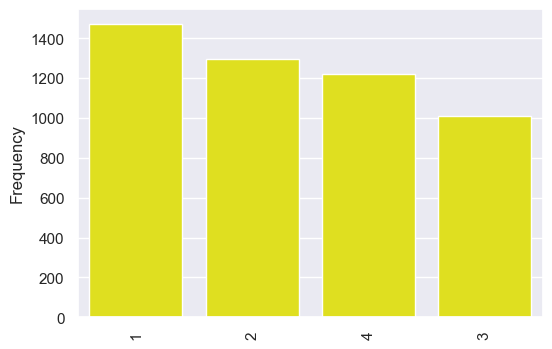

  2 - Count Plot: Education  
1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64


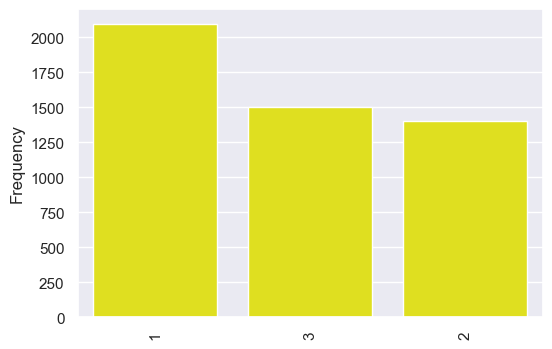

  3 - Count Plot: Personal_Loan  
0    0.904
1    0.096
Name: Personal_Loan, dtype: float64


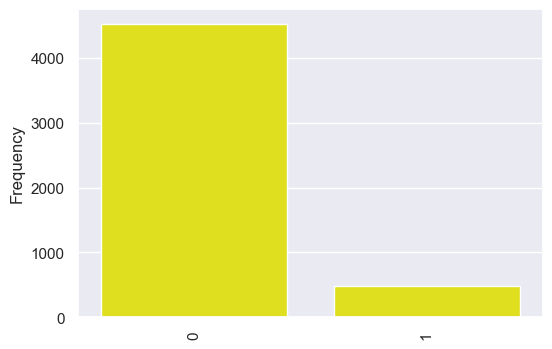

  4 - Count Plot: Securities_Account  
0    0.8956
1    0.1044
Name: Securities_Account, dtype: float64


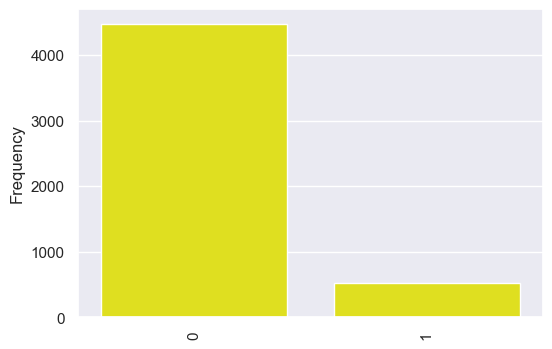

  5 - Count Plot: CD_Account  
0    0.9396
1    0.0604
Name: CD_Account, dtype: float64


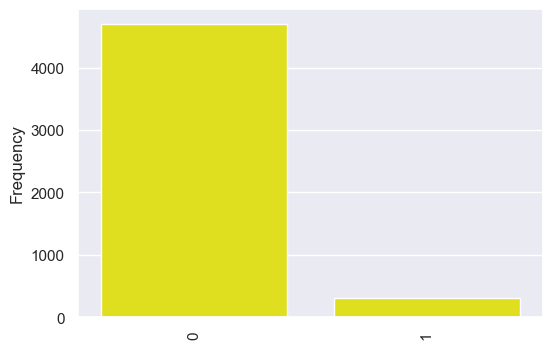

  6 - Count Plot: Online  
1    0.5968
0    0.4032
Name: Online, dtype: float64


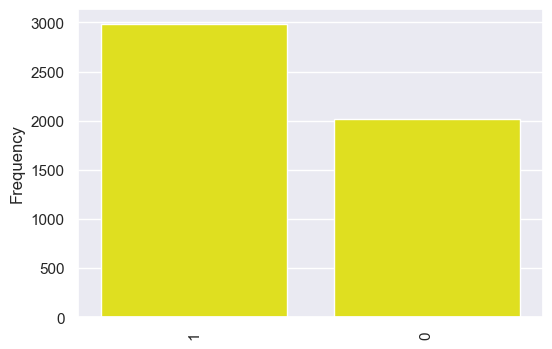

  7 - Count Plot: CreditCard  
0    0.706
1    0.294
Name: CreditCard, dtype: float64


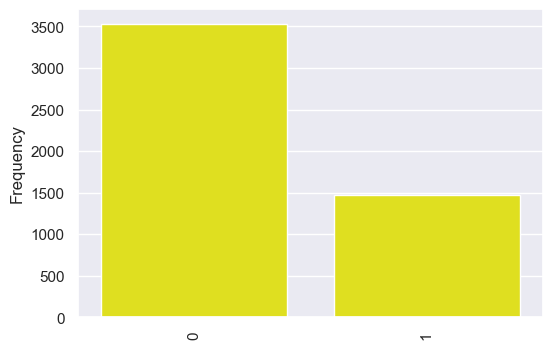

  8 - Count Plot: County  
Los Angeles County        0.2190
San Diego County          0.1136
Santa Clara County        0.1126
Alameda County            0.1000
Orange County             0.0732
San Francisco County      0.0526
San Mateo County          0.0408
Sacramento County         0.0368
Santa Barbara County      0.0308
Yolo County               0.0260
Monterey County           0.0256
Ventura County            0.0230
San Bernardino County     0.0202
Contra Costa County       0.0170
Santa Cruz County         0.0136
Riverside County          0.0112
Marin County              0.0108
Kern County               0.0108
Solano County             0.0066
San Luis Obispo County    0.0066
Humboldt County           0.0064
Sonoma County             0.0056
Fresno County             0.0052
Placer County             0.0048
Butte County              0.0038
Shasta County             0.0036
El Dorado County          0.0034
Stanislaus County         0.0030
San Benito County         0.0028
San Joaquin Coun

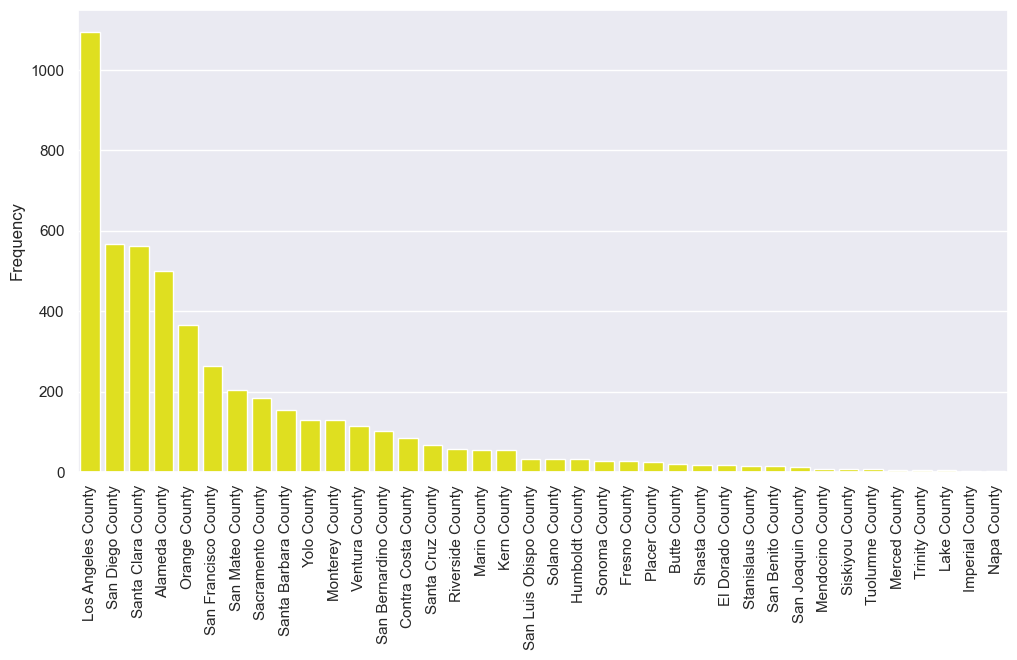

  9 - Count Plot: Region  
Silicon Valley        0.3650
West California       0.2794
South California      0.2188
North California      0.0946
Central California    0.0238
Jefferson             0.0184
Name: Region, dtype: float64


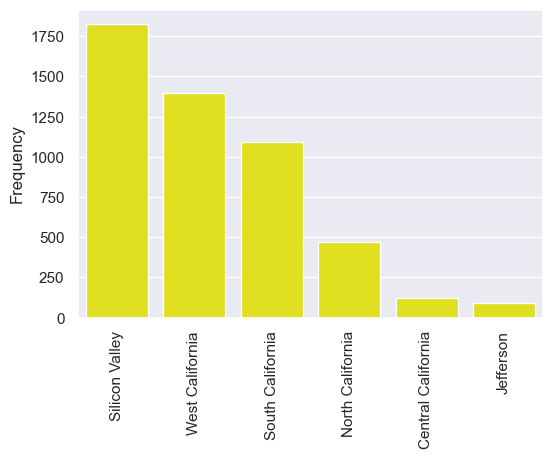

In [31]:
'''
Firstly, will start the Univariate Analysis by checking the distribution of Features with Categorical/Discrete Values.
'''

discrete_var = ['Family' , 'Education' , 'Personal_Loan' , 'Securities_Account' , 'CD_Account' , 'Online' , 
                'CreditCard', 'County' , 'Region']

continuous_var = ['Age' , 'Experience' , 'Income' , 'CCAvg' , 'Mortgage']

for index, element in enumerate(discrete_var):
    if df[element].nunique() <= 6:
        plt.figure(figsize=(6 , 4))
    elif df[element].nunique() > 6:
        plt.figure(figsize=(12 , 6))

    print('\033[1m' , '\033[92m' , index+1 , '- Count Plot:' , element , '\033[0m' , '\033[92m')
    print(df[element].value_counts(normalize = True).sort_values(ascending=False))
    plot = sns.countplot(data=df , x = element , color = 'yellow', 
                         order=df[element].value_counts(ascending=False).index)
    plt.xticks(rotation = 90)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show();

## <left> <font size=5 style='font-family:Courier New' color='Grey'> **4.1 Observations:**
<left> <font size=3 style='font-family:Courier New' color='black'> **1.** 29.44% of Customers have a Family Members (1) which indicate Single Customer, followed by Newly Married Customers with 2 Family Members (25.92%).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** 41.92% of Customers are Undegraded which might indicate that these customers are youth.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Only 9.6% of customers have accepted the Personal Loan offered in the last campaign.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Only 10.44% of customers have Security Accounts with AllLife Bank.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** Only 6% of customers have a Certificate of Deposit (CD) Account with AllLife Bank.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** 59.7 customers do use the Internet Banking Facilities of AllLife Bank.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** 29.4% of customers do use a Credit Card issued by other Banks (Probably, Competitors Banks).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8.** 21.9% of customers live in Los Angeles County, followed with convergent percentage of those live in San Diego, Santa Clara, and Alameda Counties.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **9.** 20 Counties have been represented with Customers less than 1% each.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **10.** In Terms of Regions, the highest percentage of 36.5% of customers live in Silicon Valley Region while the lowest live in Jefferson Region with 1.84%.

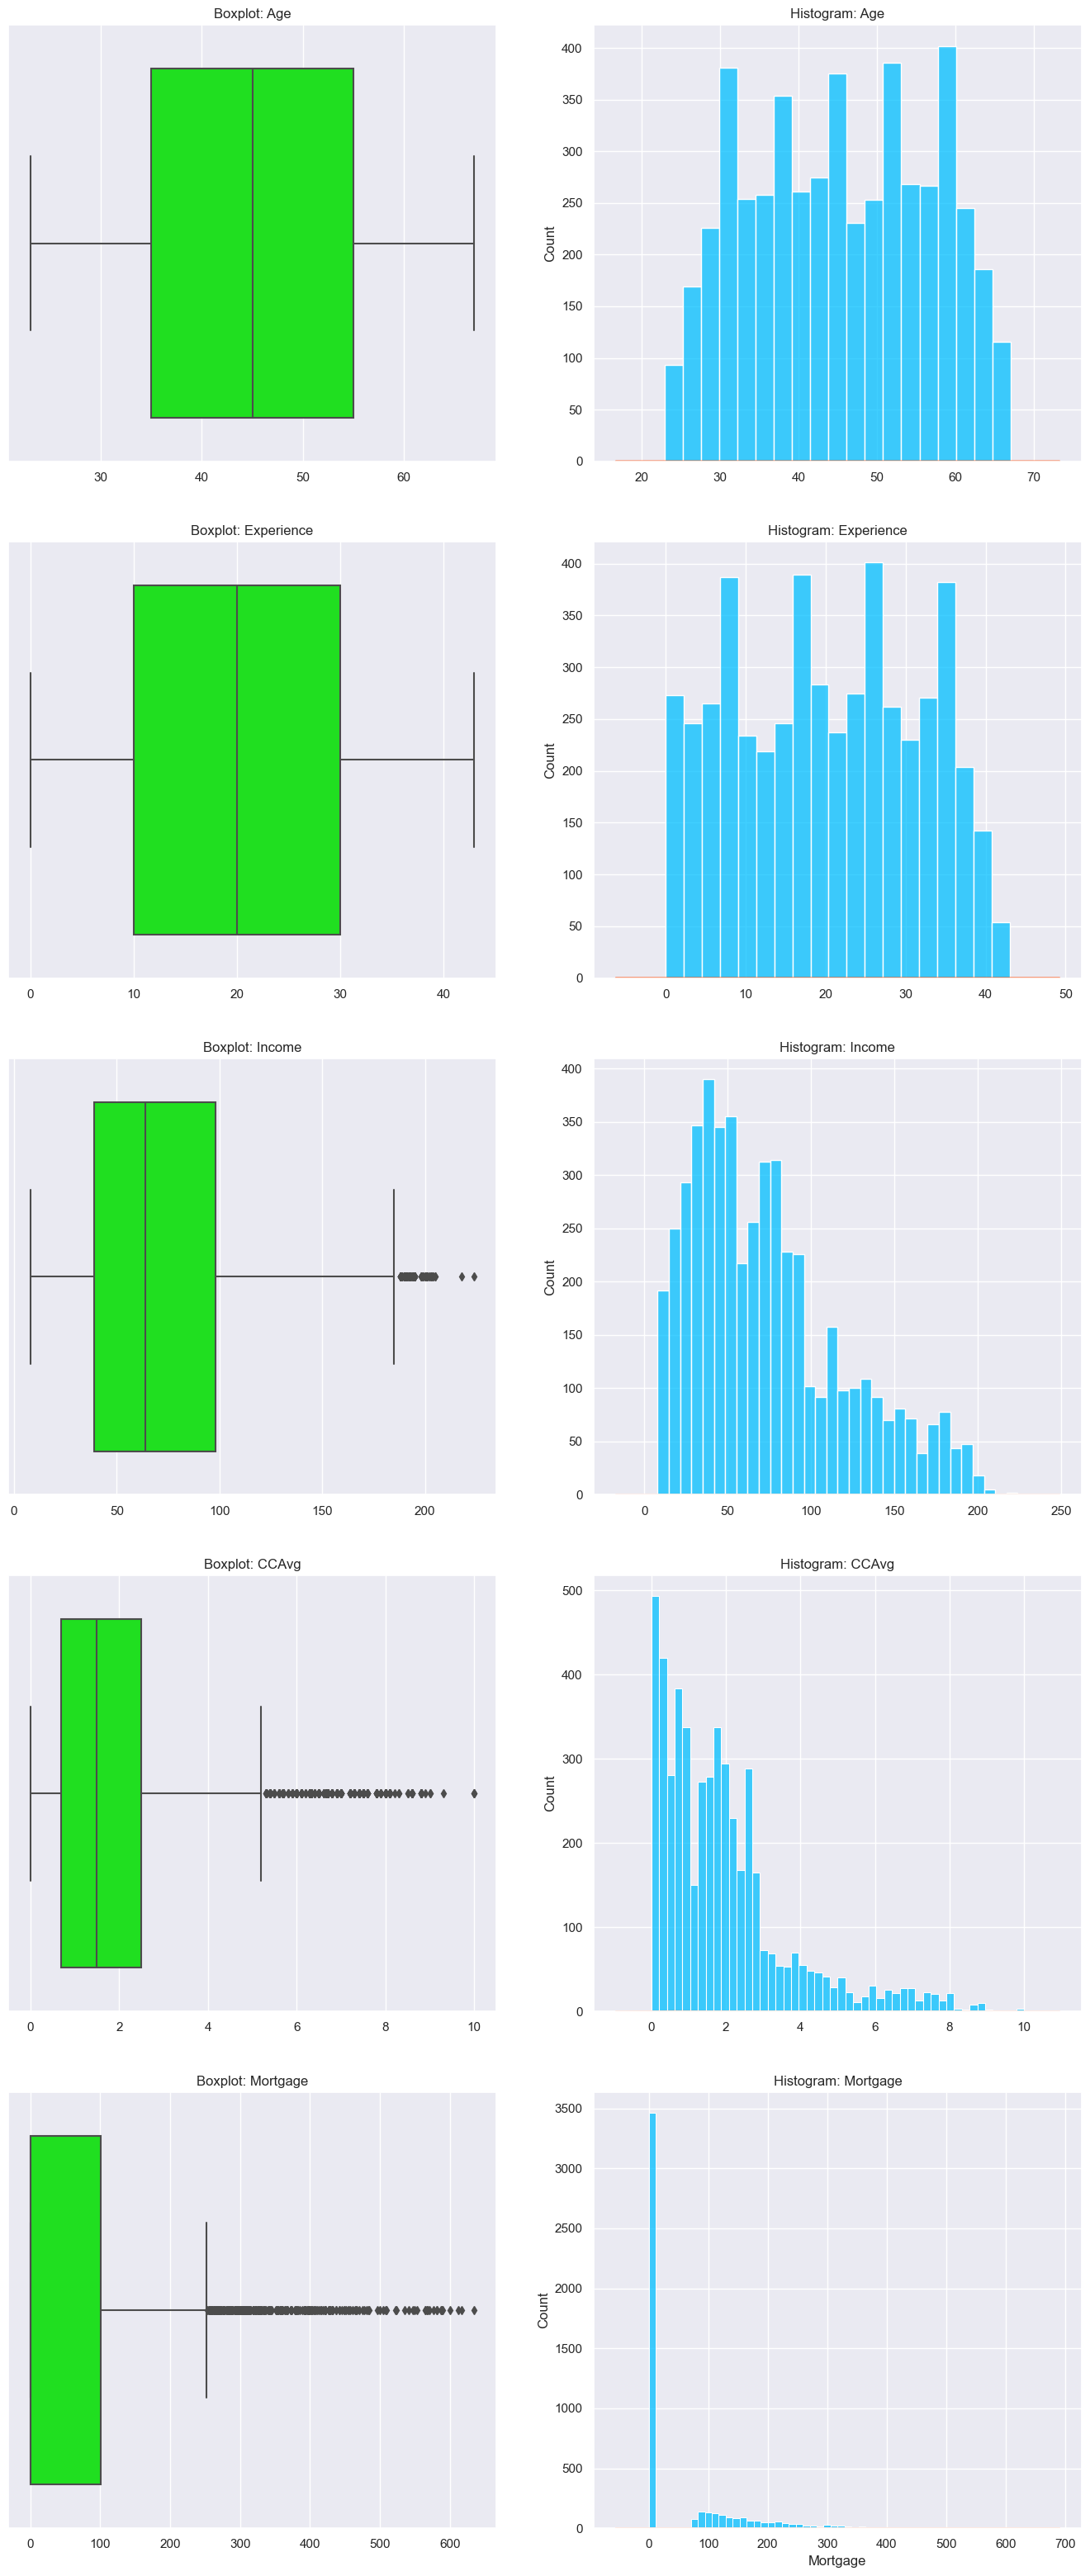

In [32]:
'''
Secondly, let's continue the Univariate Analysis by checking the distribution of Continuous Features.
'''

fig, axis = plt.subplots(len(continuous_var), 2, figsize=(14, 32)) # 8 Rows X 2 Columns = 16 Plots
i = 0
for element in continuous_var:
    j = 0
    sns.boxplot(data=df , x=element , ax=axis[i, j] , color='Lime')
    plt.setp(axis[:, 0] , xlabel='')
    plt.setp(axis[:, 1] , xlabel='')
    plt.setp(axis[:, 1] , ylabel='Count')
    plt.setp(axis[i:i+1, 0] , title='Boxplot: '+ element)
    plt.setp(axis[i:i+1, 1] , title='Histogram: '+ element)
    sns.histplot(data=df , x=element , ax=axis[i, j+1] , color='deepskyblue')
    sns.kdeplot(data=df , x=element , ax=axis[i, j+1] , color='orangered')
    fig.tight_layout(pad=3.0)
    i+=1

##### <left> <font size=5 style='font-family:Courier New' color='Grey'> **4.2 Observations:**
<left> <font size=4 style='font-family:Courier New' color='Grey'> **4.2.1 Age:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** A Semi-Normal Distribution of Age with no Outliers (No-Skewness).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** 50% of customers are between 35 and 55 Years old.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Many Modes are observed at 30-32, 38-40, 44-46, 5-52, and 58-60 Years Bars.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Age Distribution indicates that around 80% of customers are Non-Retired (Assuming that Retirement Age is at 60 Years).
<br> 
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **4.2.2 Experience:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** A Semi-Normal Distribution of Experience with no Outliers (little Right Skewness is observed).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** 50% of customers have an experience between 10 and 30 Years.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Similar to Age, many Modes are observed.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Although no outliers, 43 Years of Experience is still a something that can be achieved in the real life.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** 83 customers have Zero Years of Experience; It might indicate an Undergrad Customers.
<br> 
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **4.2.3 Income:** 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Heavy Right Skewness is observed with some outliers to the right.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** 50% of customers have an Annual Income between 39 and 98 Thousand USD/Year. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Outliers are normal and might occur in any Income Distribution.
<br>
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **4.2.4 CCAvg:** 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Heavy Right Skewness is observed with many outliers to the right.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** 50% of customers have an Average spending on credit cards between 0.7 and 2.5 Thousand USD/Month.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** 106 customers have Zero Spent on Credit Cards, either they don't have a Credit Card, or they don't use it in daily transactions/shopping!
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Further Analysis to compare between Income and CCavg might be required.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** Outliers cannot be assumed since richer customer might have huge spent on Credit Cards; Also, no obvious discontinuity is observed in extreme values.
<br>
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **4.2.5 Mortgage:** 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Heavy Right Skewness is observed with many outliers to the right.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Around 75% of customers (3,462 Customers) don't have a House Mortgage, either they own their homes, or they live in Rented one.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Outliers are normal and might occur in any Mortgage Distribution due to variations in house prices.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **5. Bivariate Analysis:**  

In [33]:
'''
Firstly, we will start the Bivariate Analysis by discovering the Correlation between all Numeric Columns in the Dataset.
Correlations are our guidance into understanding the Positive or Negative impact of each Variable on the other.  
'''

df.corr().style.set_properties(**{'color': 'green'})

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994214,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994214,1.000000,-0.046880,-0.052119,-0.050030,0.014071,-0.010950,-0.008060,-0.001258,0.009905,0.013765,0.009073
Income,-0.055269,-0.046880,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052119,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050030,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.014071,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010950,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.008060,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.001258,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD_Account,0.008043,0.009905,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


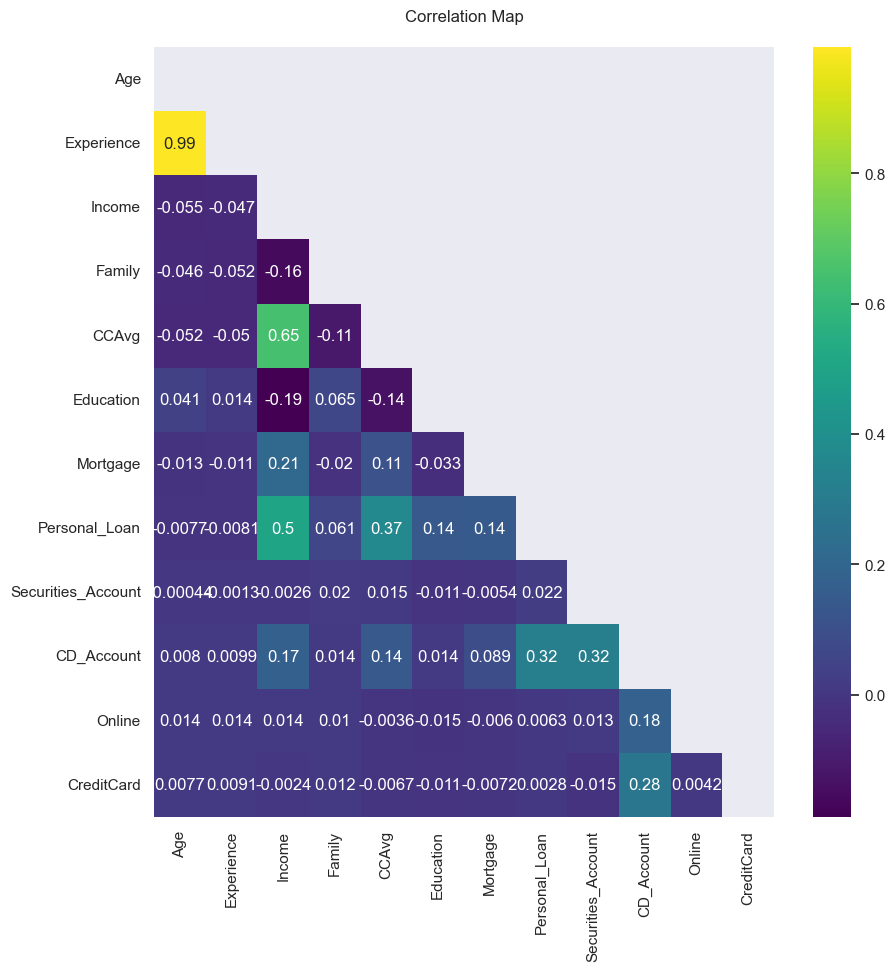

In [34]:
# Lets plot a Heatmap to visualize the correlation between Numerical Columns:

plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap="viridis", annot=True, mask=mask)
plt.title('Correlation Map\n');

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.1 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Although a Perfect Positive Correlation is rare, it found between Age-Experience (0.99); Usually, Years of Experience increase while the Age increase.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** A fairly strong positive correlation is found between Income-CCAvg (0.65) which is very important; Richer customers spent more on Credit Cards.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** A medium Strong Correlation is found between Income-Personal Loan (0.5) which is also very important; Richer customers tend to accept the Personal Loans more than others.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** A week positive correlation is found between CCAvg-Personal Loan (0.37), Customers who have obligations tend to use the Credit Cards more than others.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** Focusing on our Target Feature (Personal Loan), Income (0.5), CCAvg (0.37), and CD Account (0.32) are the most influencing features.

In [35]:
# Prior to start the Plotting, lets define a Function to plot Discrete Featues:

def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True) \
                      .sort_values(by=sorter, ascending=False)

    if data[predictor].nunique() <=10:
        print('\033[1m' , '\033[92m' , 'Stacked Bar Plot (' , predictor , ' vs ' , 
              target , ') \033[0m', '\033[92m' , sep='')
        print(tab1)
        tab = pd.crosstab(data[predictor], data[target], normalize='index') \
                    .sort_values(by=sorter, ascending=False)
        tab.plot(kind='bar', stacked=True, color = ('Lime','yellow'), figsize=(count + 5, 6))
        plt.legend(loc='lower left', frameon=False)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.xlabel('')
        plt.show()
    else:
        print('\033[1m' , '\033[92m' , 'Stacked Bar Plot (' , predictor , ' vs ' , 
              target , ') \033[0m', '\033[92m' , sep='')
        print(tab1)       

Stacked Bar Plot (Family vs Personal_Loan) 
Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296


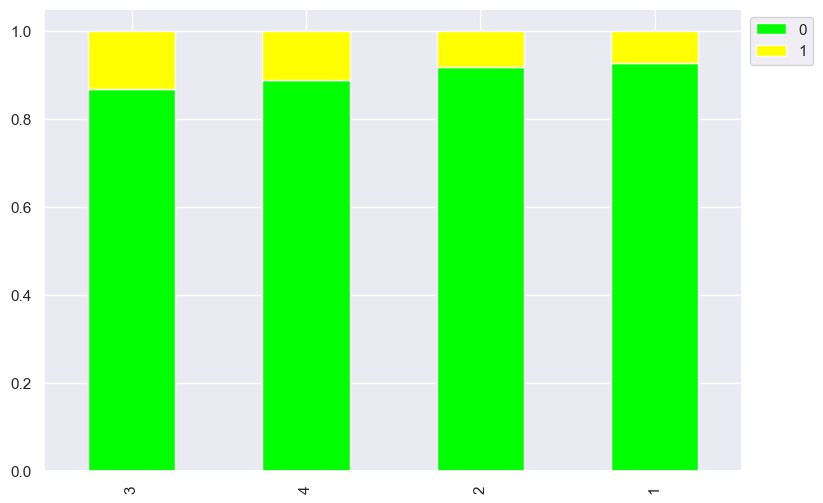

In [36]:
stacked_barplot(df , 'Family', 'Personal_Loan')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.2 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers with 3 and 4 Family members have accepted the Personal Loan more than customers with 1 and 2 Family members; it might indicate their higher obligations.

Stacked Bar Plot (Education vs Personal_Loan) 
Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096


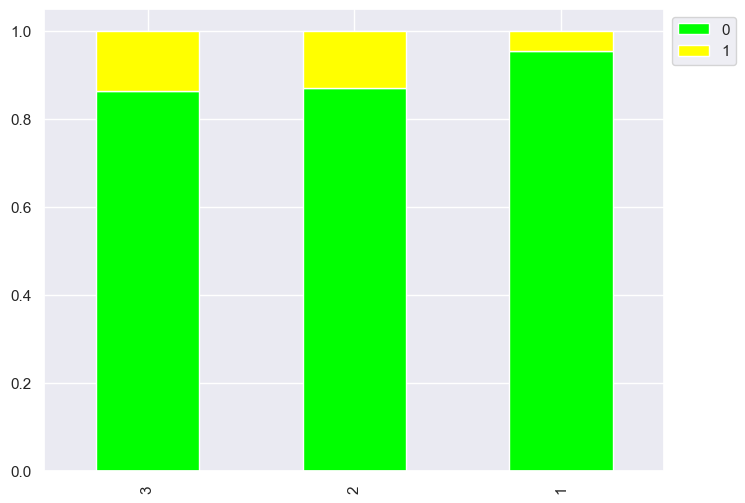

In [37]:
stacked_barplot(df , 'Education', 'Personal_Loan')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.3 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers with Advanced/Professional and Graduate Level in Education have accepted the Personal Loan more than Undergrad customers.

Stacked Bar Plot (Securities_Account vs Personal_Loan) 
Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522


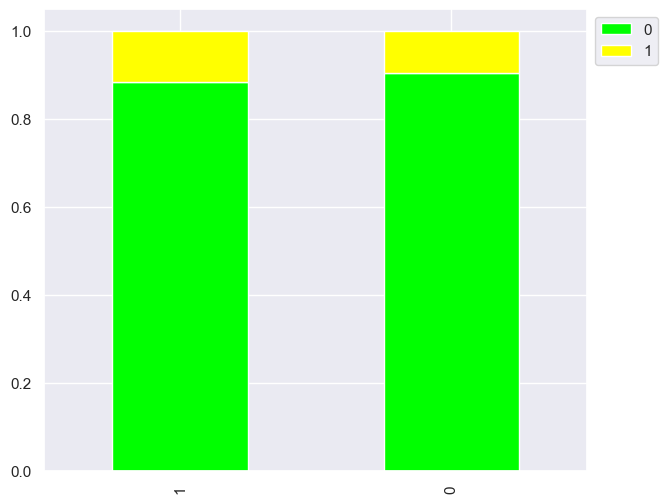

In [38]:
stacked_barplot(df , 'Securities_Account', 'Personal_Loan')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.4 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers who don't have Security Accounts with AllLife Bank have accepted the Personal Loan more than others who do have.

Stacked Bar Plot (CD_Account vs Personal_Loan) 
Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302


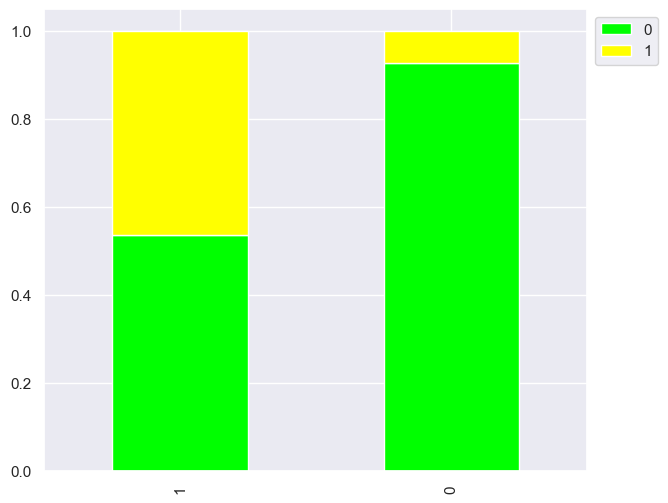

In [39]:
stacked_barplot(df , 'CD_Account', 'Personal_Loan')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.5 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers who don't have Certificate of Deposit Accounts with AllLife Bank have accepted the Personal Loan more than others who do have.

Stacked Bar Plot (Online vs Personal_Loan) 
Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016


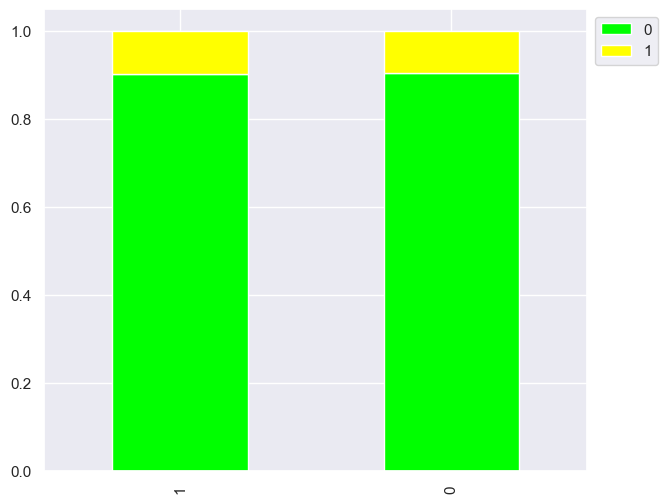

In [40]:
stacked_barplot(df , 'Online', 'Personal_Loan')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.6 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers who do use the Internet Banking Facilities of AllLife Bank have accepted the Personal Loan more than others who don't use it.

Stacked Bar Plot (CreditCard vs Personal_Loan) 
Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470


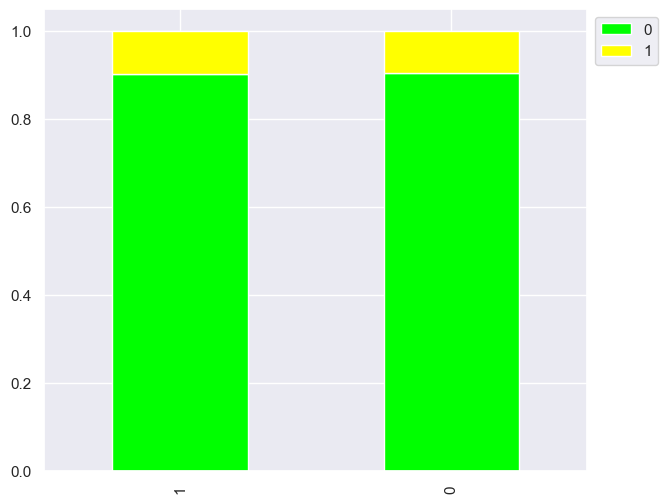

In [41]:
stacked_barplot(df , 'CreditCard', 'Personal_Loan')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.7 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers who don't use a Credit Card issued by any other Bank have accepted the Personal Loan more than other who do use it.

In [42]:
stacked_barplot(df , 'County' , 'Personal_Loan')

Stacked Bar Plot (County vs Personal_Loan) 
Personal_Loan              0    1   All
County                                 
All                     4520  480  5000
Los Angeles County       984  111  1095
Santa Clara County       492   71   563
San Diego County         509   59   568
Alameda County           456   44   500
Orange County            333   33   366
San Francisco County     244   19   263
Monterey County          113   15   128
Sacramento County        169   15   184
Contra Costa County       73   12    85
San Mateo County         192   12   204
Ventura County           104   11   115
Santa Barbara County     143   11   154
Santa Cruz County         60    8    68
Yolo County              122    8   130
Kern County               47    7    54
Sonoma County             22    6    28
Marin County              48    6    54
Riverside County          50    6    56
San Luis Obispo County    28    5    33
Solano County             30    3    33
San Bernardino County     98    3   

Stacked Bar Plot (Region vs Personal_Loan) 
Personal_Loan          0    1   All
Region                             
All                 4520  480  5000
Silicon Valley      1644  181  1825
West California     1259  138  1397
South California     993  101  1094
North California     432   41   473
Central California   108   11   119
Jefferson             84    8    92


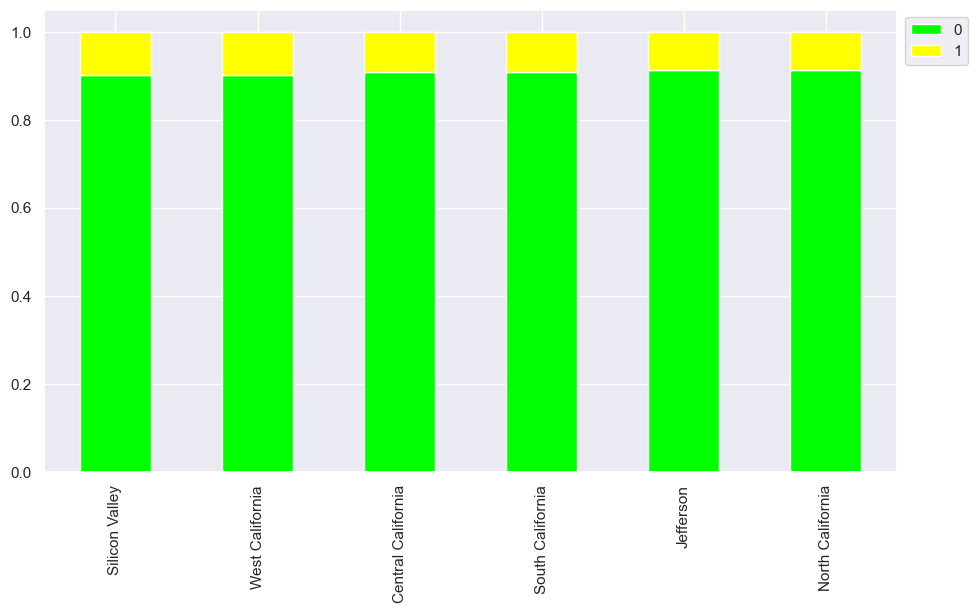

In [43]:
stacked_barplot(df , 'Region', 'Personal_Loan')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.8 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers who live Los Angeles, Santa Clara, San Diego, Alameda, and Orange Counties have accepted the Personal Loan more than other who live in other Counties.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Customers who live in Silicon Valley have accepted the Personal Loan more than other who live in other Regions.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** A few No. of customers in North California, Central California, and Jefferson Regions have accepted the Personal Loan.

In [44]:
# Secondly, lets define a Function to plot Continuous Featues:

def continuous_plot(x):
    print('\033[1m' , '\033[92m' , 'Box Plot: Personal Loan vs', x)
    values = df['Personal_Loan'].unique().tolist()
    for value in values:
        mean = round(np.mean(df[df['Personal_Loan']==value][x]) , 2) 
        print('\033[1m' , '\033[94m   -' , value , 'Mean =' , f"{mean:,}")
    sns.catplot(data=df , x='Personal_Loan' , y=x , kind='box' , ci=False , height=4 , \
                showfliers=False , color = 'Lime')
    plt.show();

  Box Plot: Personal Loan vs Age
    - 0 Mean = 45.37
    - 1 Mean = 45.07


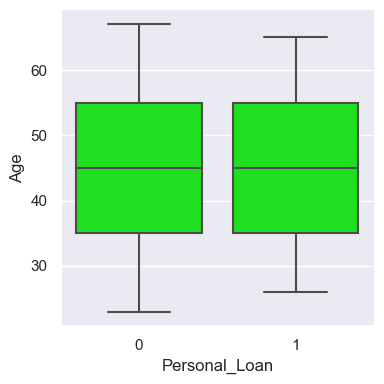

In [45]:
continuous_plot('Age')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.9 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Nothing important regarding the Age; Although 50% of customers who have accepted the Personal Loan have an Age between 36 and 54 Years, the distribution still shows all Age Interval - Approximately - that might be a promised Customers in next Campaign.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** The Average Age is almost the same (45 Years) for both customers who have accepted/rejected the Personal Loan in the last Campaign.

Stacked Bar Plot (Age_int vs Personal_Loan) 
Personal_Loan      0    1   All
Age_int                        
All             4520  480  5000
(31.8, 40.6]    1000  111  1111
(40.6, 49.4]    1023  109  1132
(49.4, 58.2]    1093  109  1202
(58.2, 67.0]     728   78   806
(22.956, 31.8]   676   73   749


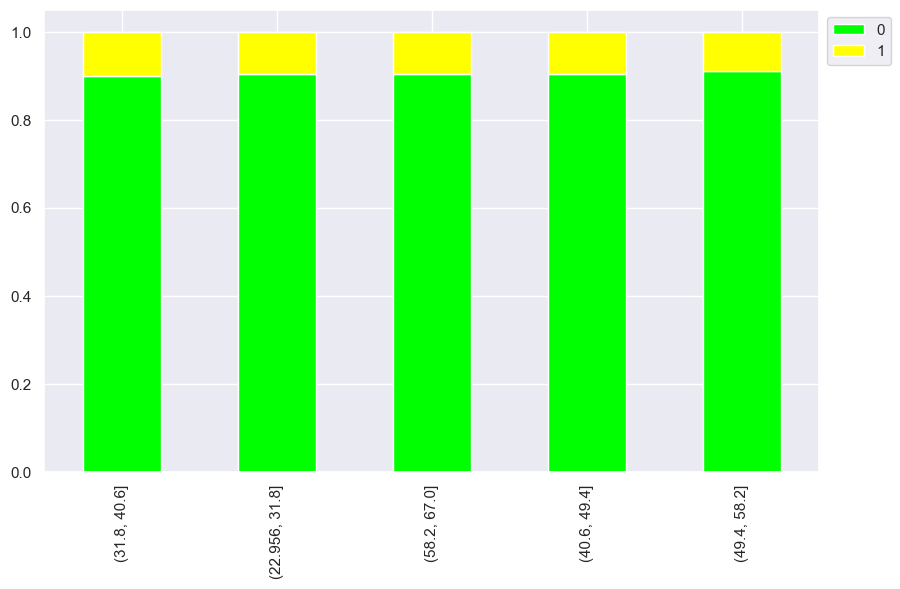

In [46]:
'''
To go further in analyzing the effect of Age on the acceptance of Persoanl Loan, we will slice the Age Values into 5 intervals:
Note: Newly added column (Age_int) will be dropped once the analysis is done.
'''

df['Age_int'] = pd.cut(df['Age'] , 5)

stacked_barplot(df , 'Age_int', 'Personal_Loan')

df.drop(['Age_int'] , axis = 1 , inplace=True)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.10 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** A better understanding has been achieved regarding the Age where Customers with Age between 32 and 41 Years have a better trend into accepting the Personal Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Although all Customers with Age around 32 to 58 Years have the best trend into accepting the Personal Loan, a noticeable decreasing in that trend is observed with Young and elder customers.

  Box Plot: Personal Loan vs Experience
    - 0 Mean = 20.16
    - 1 Mean = 19.84


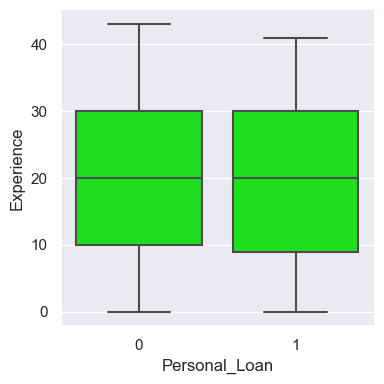

In [47]:
continuous_plot('Experience')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.11 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Again, nothing important regarding the Experience; Although 50% of customers who have accepted the Personal Loan have an Experience between 9 and 30 Years, the distribution still shows all Experience Years  - Approximately - that might be a promised Customers in next Campaign.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** The Average Experience is almost the same (20 Years) for both customers who have accepted/rejected the Personal Loan in the last Campaign.

Stacked Bar Plot (Experience_int vs Personal_Loan) 
Personal_Loan      0    1   All
Experience_int                 
All             4520  480  5000
(-0.043, 8.6]    918  106  1024
(25.8, 34.4]    1044  103  1147
(8.6, 17.2]      996  102  1098
(17.2, 25.8]     972  102  1074
(34.4, 43.0]     590   67   657


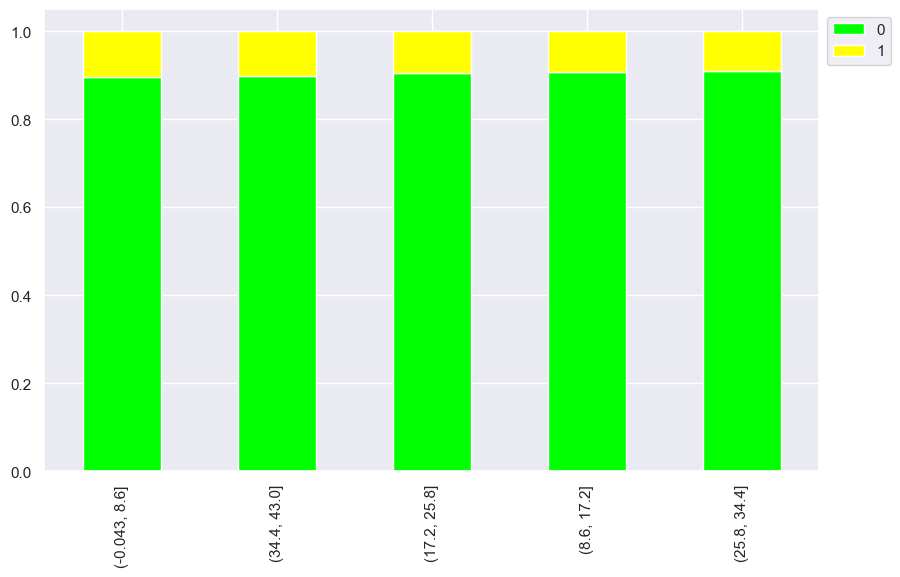

In [48]:
'''
To go further in analyzing the effect of Experience on the acceptance of Persoanl Loan, we will slice the Experience Values into 5 intervals:
Note: Newly added column (Experience_int) will be dropped once the analysis is done.
'''

df['Experience_int'] = pd.cut(df['Experience'] , 5)

stacked_barplot(df , 'Experience_int', 'Personal_Loan')

df.drop(['Experience_int'] , axis = 1 , inplace=True)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.12 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** A better understanding has been achieved regarding the Experience where Customers with Experience between 0 and 9 Years have a better trend into accepting the Personal Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Although all Customers with Experience around 0 to 29 Years have the best trend into accepting the Personal Loan, a slight decreasing in that trend is observing while the years of Experience is increasing.

  Box Plot: Personal Loan vs Income
    - 0 Mean = 66.24
    - 1 Mean = 144.75


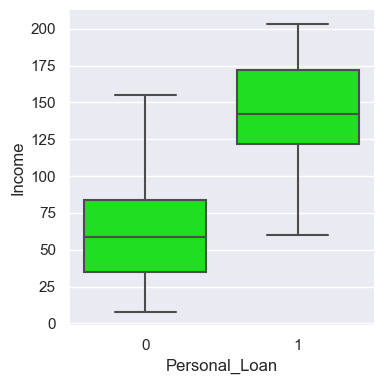

In [49]:
continuous_plot('Income')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.13 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers with higher income represents a promised target for next Campaign.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** The Average Income for customers who have accepted the Personal Loan (144.75 Thousand USD/Year) is much higher than those who have rejected it (66.24 Thousand USD/Year).

Stacked Bar Plot (Income_int vs Personal_Loan) 
Personal_Loan      0    1   All
Income_int                     
All             4520  480  5000
(116.0, 137.6]   200  107   307
(159.2, 180.8]    95  102   197
(137.6, 159.2]   174   94   268
(180.8, 202.4]    64   77   141
(94.4, 116.0]    309   68   377
(72.8, 94.4]     853   26   879
(51.2, 72.8]     862    5   867
(202.4, 224.0]     8    1     9
(7.784, 29.6]    802    0   802
(29.6, 51.2]    1153    0  1153


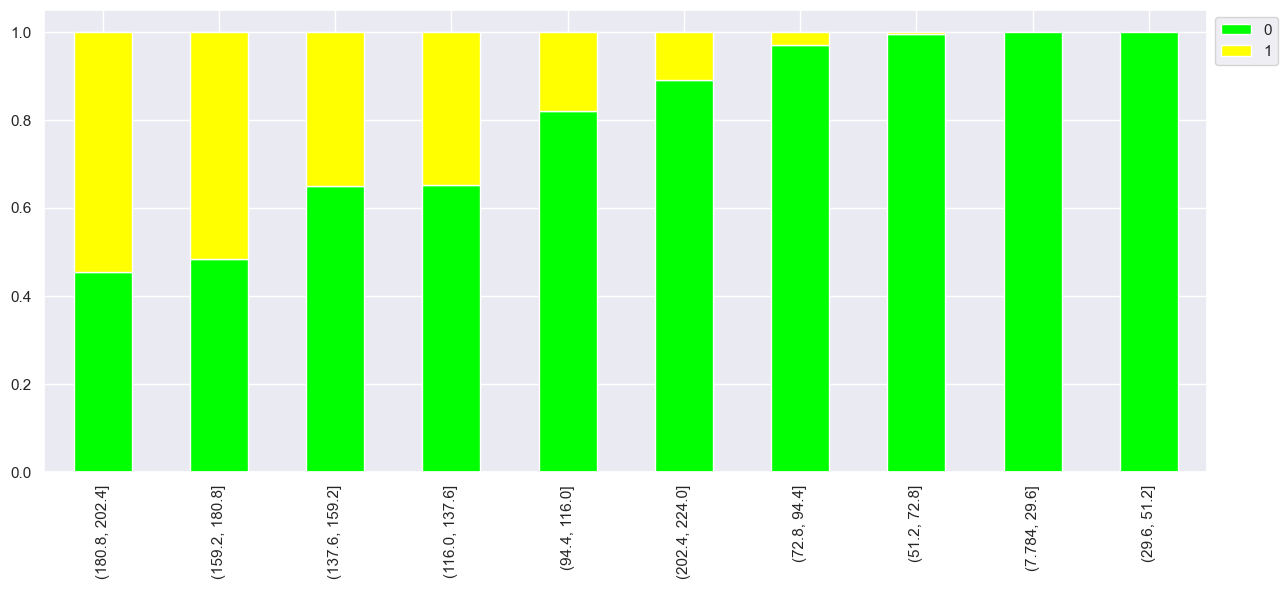

In [50]:
'''
To go further in analyzing the effect of Income on the acceptance of Persoanl Loan, we will slice the Income Values into 10 intervals:
Note: Newly added column (Income_int) will be dropped once the analysis is done.
'''

df['Income_int'] = pd.cut(df['Income'] , 10)

stacked_barplot(df , 'Income_int', 'Personal_Loan')

df.drop(['Income_int'] , axis = 1 , inplace=True)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.14 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** A better understanding has been achieved regarding the Income where Customers with Income between 116 and 181 Thousand USD/Year have a better tend into accepting the Personal Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Customers with Income varying between 94 and 202 Thousand USD/Year have the best tend into accepting the Personal Loan, while both Customers with low Income (8 to 93 Thousand USD/Year) and extremely high Income (Above 202 Thousand USD/Year) don't represent a promised opportunity into accepting.

  Box Plot: Personal Loan vs CCAvg
    - 0 Mean = 1.73
    - 1 Mean = 3.91


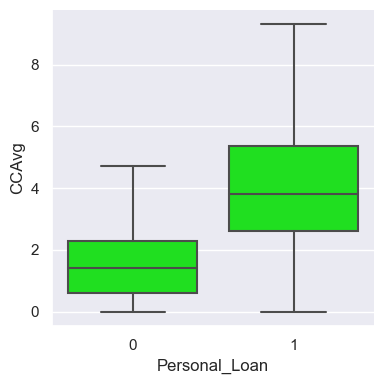

In [51]:
continuous_plot('CCAvg')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.15 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers with medium spending on Credit Cards represents a promised target for next Campaign.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** The Average Spent for customers who have accepted the Personal Loan (3.91 Thousand USD/Month) is much higher than those who have rejected it (1.73 Thousand USD/Month).

Stacked Bar Plot (CCavg_int vs Personal_Loan) 
Personal_Loan     0    1   All
CCavg_int                     
All            4520  480  5000
(2.0, 4.0]     1040  163  1203
(4.0, 6.0]      164  145   309
(-0.01, 2.0]   3151   96  3247
(6.0, 8.0]      140   62   202
(8.0, 10.0]      25   14    39


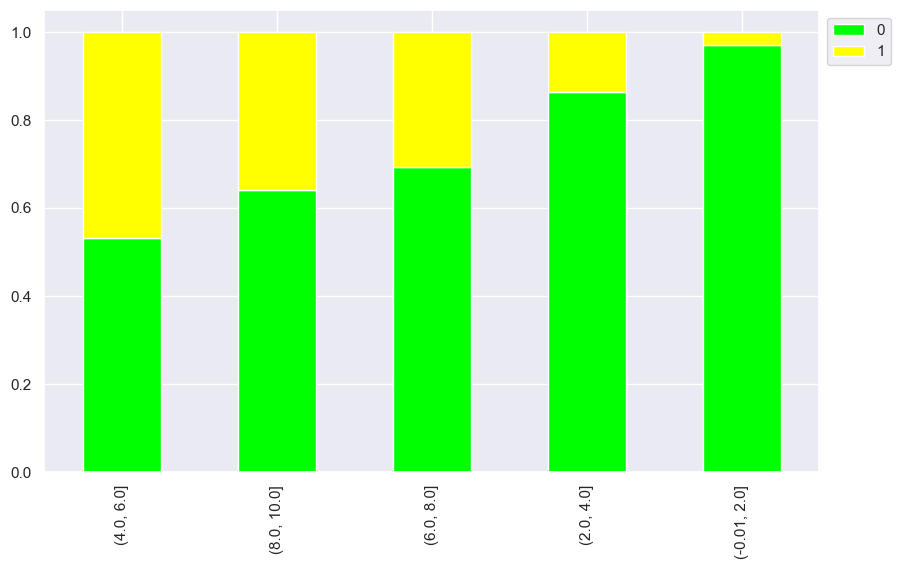

In [52]:
'''
To go further in analyzing the effect of CCAvg on the acceptance of Persoanl Loan, we will slice the CCavg Values into 5 intervals:
Note: Newly added column (Income_int) will be dropped once the analysis is done.
'''

df['CCavg_int'] = pd.cut(df['CCAvg'] , 5)

stacked_barplot(df , 'CCavg_int', 'Personal_Loan')

df.drop(['CCavg_int'] , axis = 1 , inplace=True)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.16 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** A better understanding has been achieved regarding the CCAvg where Customers with Medium Spending on Credit Cards between 2 and 6 Thousand USD/Month have a better tend into accepting the Personal Loan, while Customers with either low or high spending have a lowest tend into accepting.

  Box Plot: Personal Loan vs Mortgage
    - 0 Mean = 51.79
    - 1 Mean = 100.85


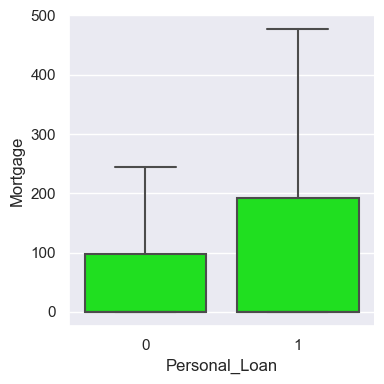

In [53]:
continuous_plot('Mortgage')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.17 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Fair to say! Customers with lower obligations dues to Mortgage represents a promised target for next Campaign.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** The Average Mortgage Obligations for customers who have accepted the Personal Loan (100.85 Thousand USD) is much higher than those who have rejected it (51.79 Thousand USD/Month).

Stacked Bar Plot (Mortgage_int vs Personal_Loan) 
Personal_Loan      0    1   All
Mortgage_int                   
All             4520  480  5000
(-0.635, 63.5]  3150  312  3462
(190.5, 254.0]   225   29   254
(254.0, 317.5]    98   29   127
(63.5, 127.0]    548   25   573
(317.5, 381.0]    50   24    74
(127.0, 190.5]   399   22   421
(381.0, 444.5]    29   16    45
(508.0, 571.5]     5    8    13
(571.5, 635.0]     2    8    10
(444.5, 508.0]    14    7    21


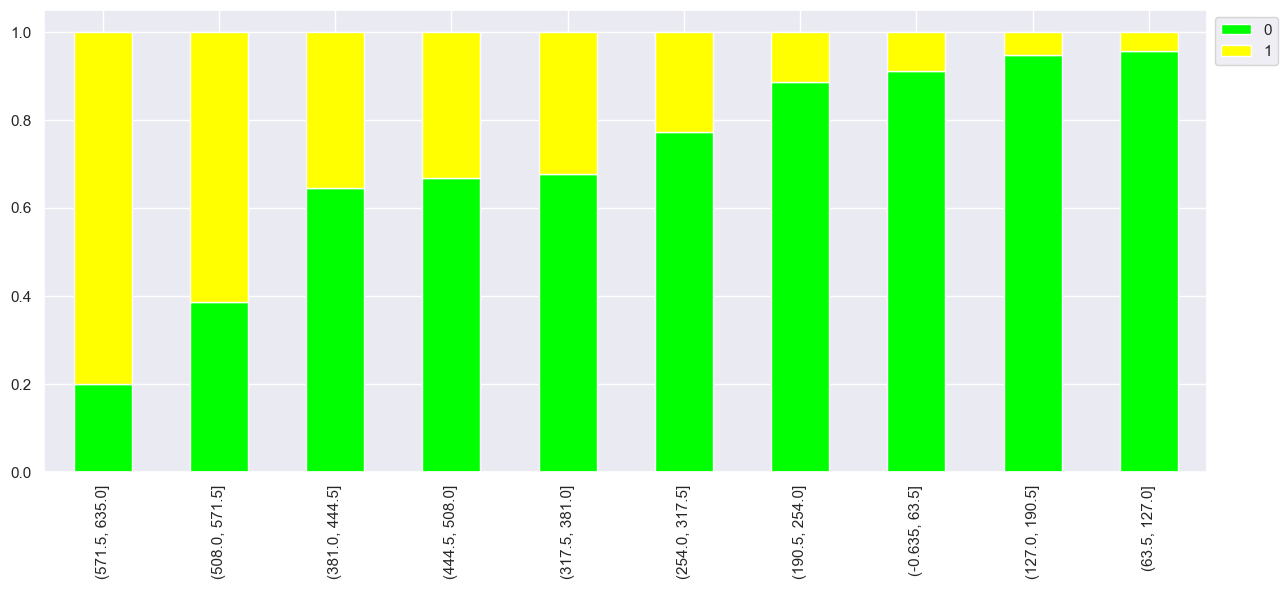

In [54]:
'''
To go further in analyzing the effect of Mortgage on the acceptance of Persoanl Loan, we will slice the Mortgage Values into 10 intervals:
Note: Newly added column (Income_int) will be dropped once the analysis is done.
'''

df['Mortgage_int'] = pd.cut(df['Mortgage'] , 10)

stacked_barplot(df , 'Mortgage_int', 'Personal_Loan')

df.drop(['Mortgage_int'] , axis = 1 , inplace=True)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.18 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** A better understanding has been achieved regarding the Mortgage where Customers with lower Mortgage (0-63.5 Thousand USD) have the best tend into accepting the Personal Loan, while an increasing in Mortgage leads to decreasing in that tend.

  Box Plot: Personal Loan vs Family
    - 0 Mean = 2.37
    - 1 Mean = 2.61


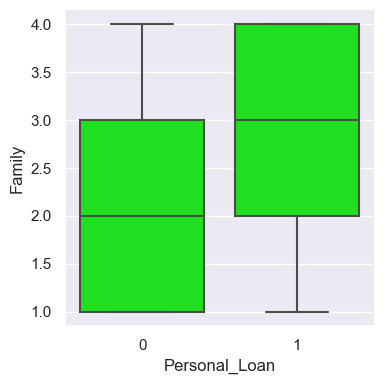

In [55]:
continuous_plot('Family')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.19 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers with Family Members of 3 or 4 tend to accept the personal Loan more than Customers with 1 or 2 Family Members.

  Box Plot: Personal Loan vs Education
    - 0 Mean = 1.84
    - 1 Mean = 2.23


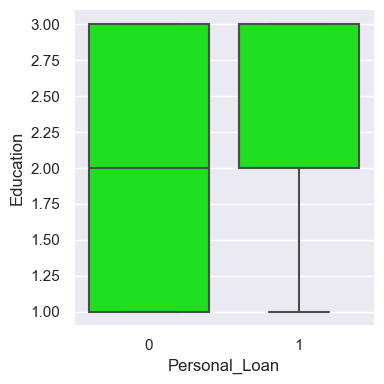

In [56]:
continuous_plot('Education')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.20 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers who are Graduate or  Advanced/Professionals tend to accept the Personal Loan more than Undergrad Customers.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** 75% of Customers who have accepted the Personal Loan have 2 or 3 Education Level.

In [57]:
'''
In addition to above Analysis, lets discover the most correlated features that 
might affect the Personal Loans and their distributions over Regions in order to generate a better recommendations:
'''

def multi_plot(x , y):
    print('\033[1m' , '\033[92m' , 'Box Plot:' , x , 'vs', y)
    values = df[x].unique().tolist()
    for value in values:
        mean = round(np.mean(df[df[x]==value][y]) , 2) 
        print('\033[1m' , '\033[94m   -' , value , 'Mean =' , f"{mean:,}")
    
    sns.catplot(data=df , x=x , y=y , kind='box' , ci=False , height=5, aspect=3 , \
                showfliers=False , color='Lime')
    plt.show();

  Box Plot: Region vs Income
    - West California Mean = 74.9
    - Silicon Valley Mean = 74.37
    - South California Mean = 74.59
    - North California Mean = 67.94
    - Jefferson Mean = 70.72
    - Central California Mean = 69.44


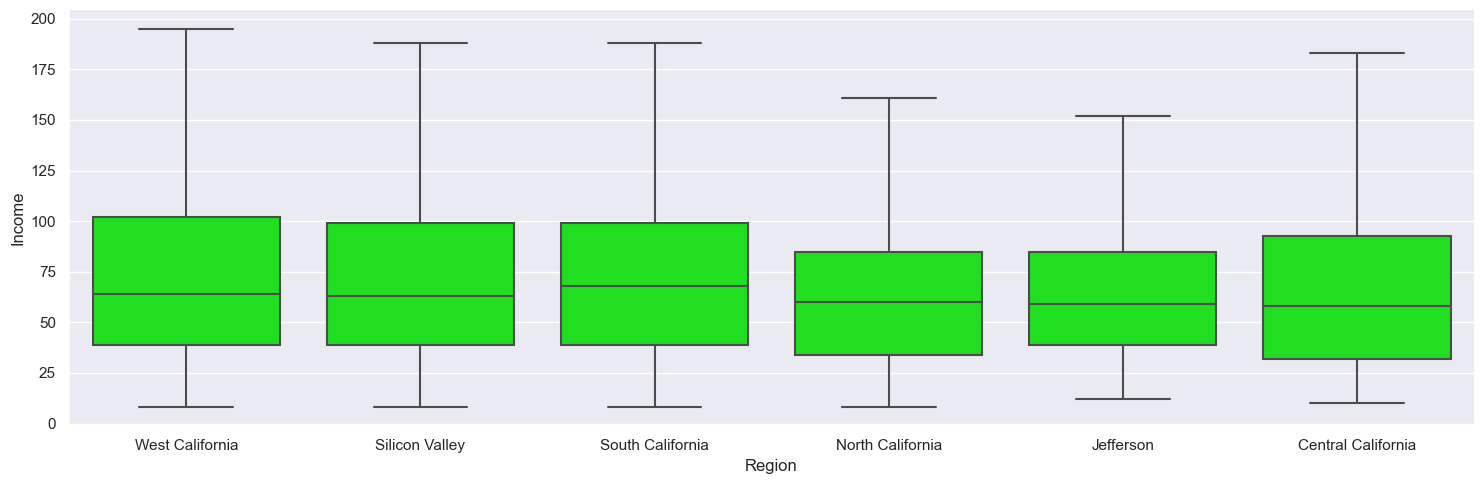

In [58]:
multi_plot(x = 'Region' , y = 'Income')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.21 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Although the Average of Income is convergent for all Regions, West California Customers have higher income than others.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Customers with lower income live in North California and Jefferson Sub-Sates.

  Box Plot: Region vs CCAvg
    - West California Mean = 1.95
    - Silicon Valley Mean = 1.94
    - South California Mean = 1.97
    - North California Mean = 1.87
    - Jefferson Mean = 1.92
    - Central California Mean = 1.7


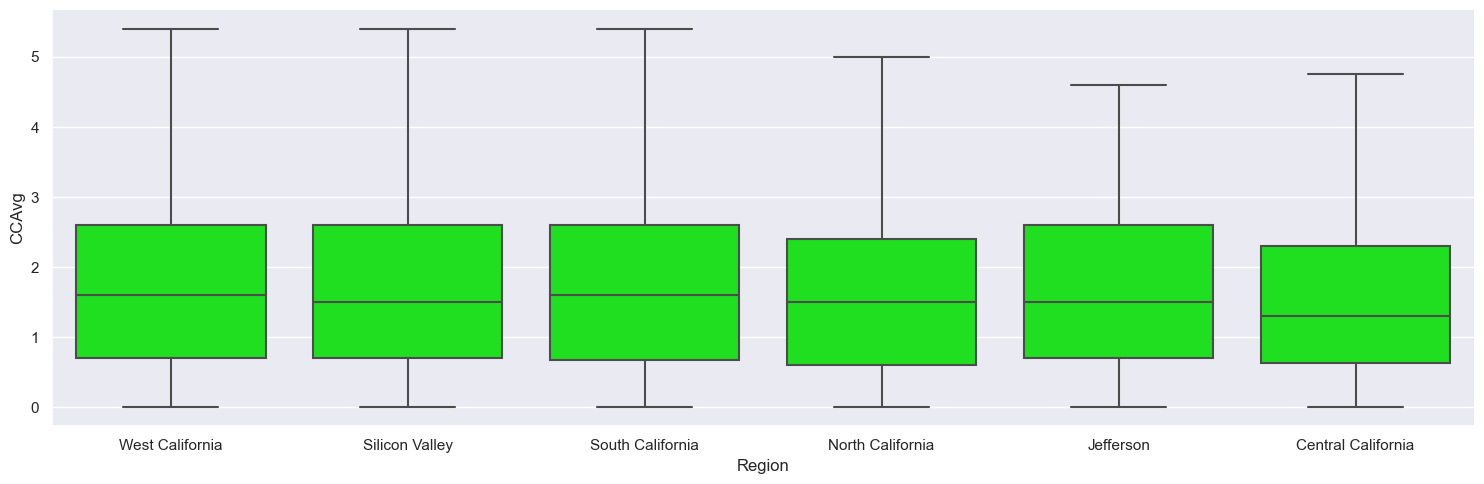

In [59]:
multi_plot(x = 'Region' , y = 'CCAvg')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.22 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Although the Average Spent on Credit Cards  is convergent for all Regions, West California, Silicon Valley, and South California Customers have higher spent than others.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Customers with lower spent on Credit Cards live in Central California and Jefferson Sub-Sates.

  Box Plot: Region vs Age
    - West California Mean = 45.94
    - Silicon Valley Mean = 45.01
    - South California Mean = 45.39
    - North California Mean = 45.11
    - Jefferson Mean = 45.13
    - Central California Mean = 43.83


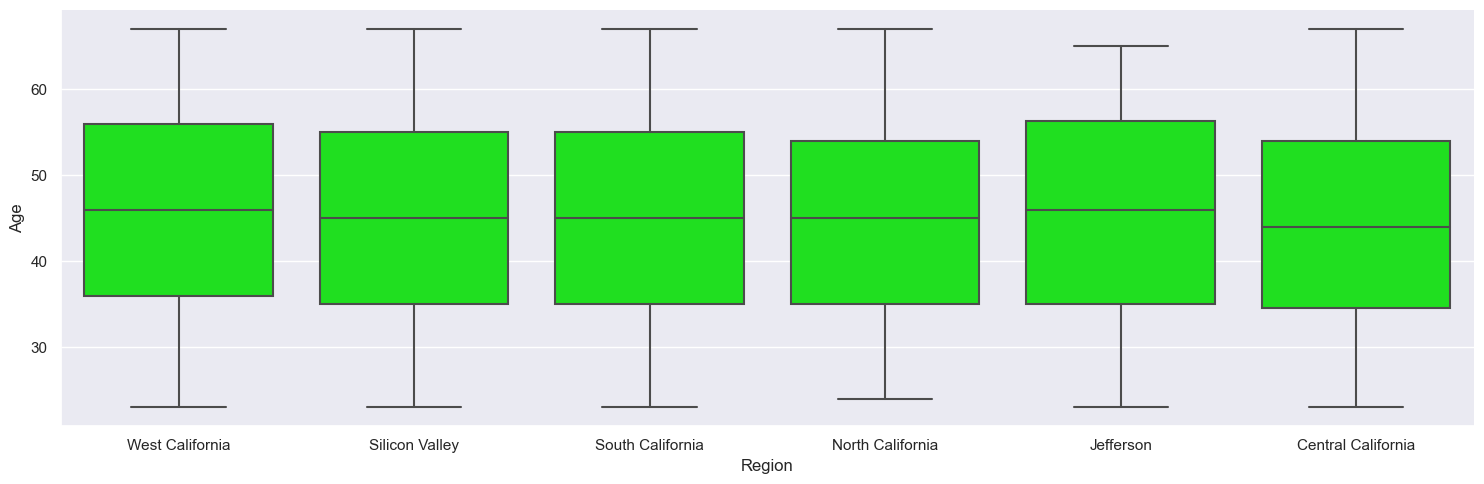

In [60]:
multi_plot(x = 'Region' , y = 'Age')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.23 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** The Age again does not show a huge difference between customers who live in different Regions.

  Box Plot: Region vs Mortgage
    - West California Mean = 56.35
    - Silicon Valley Mean = 56.14
    - South California Mean = 56.67
    - North California Mean = 56.73
    - Jefferson Mean = 61.42
    - Central California Mean = 57.55


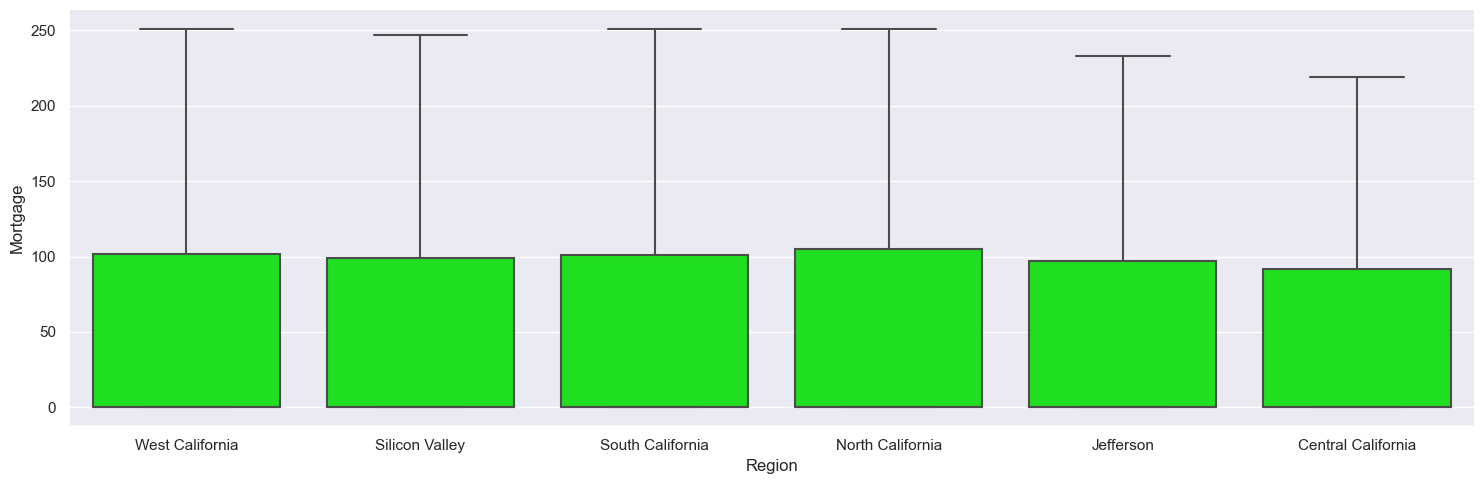

In [61]:
multi_plot(x = 'Region' , y = 'Mortgage')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.24 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers who live in West California, Silicon Valley, South California, and North California have similar Mortgage.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Customers who live in Jefferson and Central California have lower Mortgage than others.

  Box Plot: Region vs Experience
    - West California Mean = 20.71
    - Silicon Valley Mean = 19.79
    - South California Mean = 20.22
    - North California Mean = 19.9
    - Jefferson Mean = 20.01
    - Central California Mean = 18.59


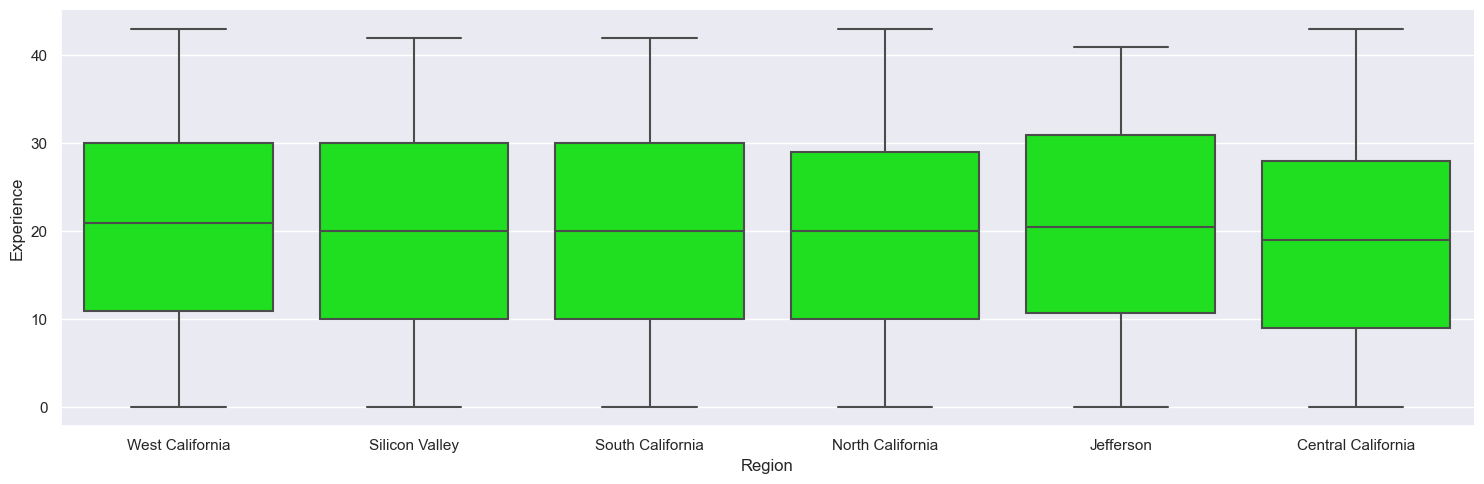

In [62]:
multi_plot(x = 'Region' , y = 'Experience')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.25 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Similar to Age, the Experience again does not show a huge difference between customers who live in different Regions.

  Box Plot: Region vs Family
    - West California Mean = 2.35
    - Silicon Valley Mean = 2.43
    - South California Mean = 2.39
    - North California Mean = 2.44
    - Jefferson Mean = 2.53
    - Central California Mean = 2.34


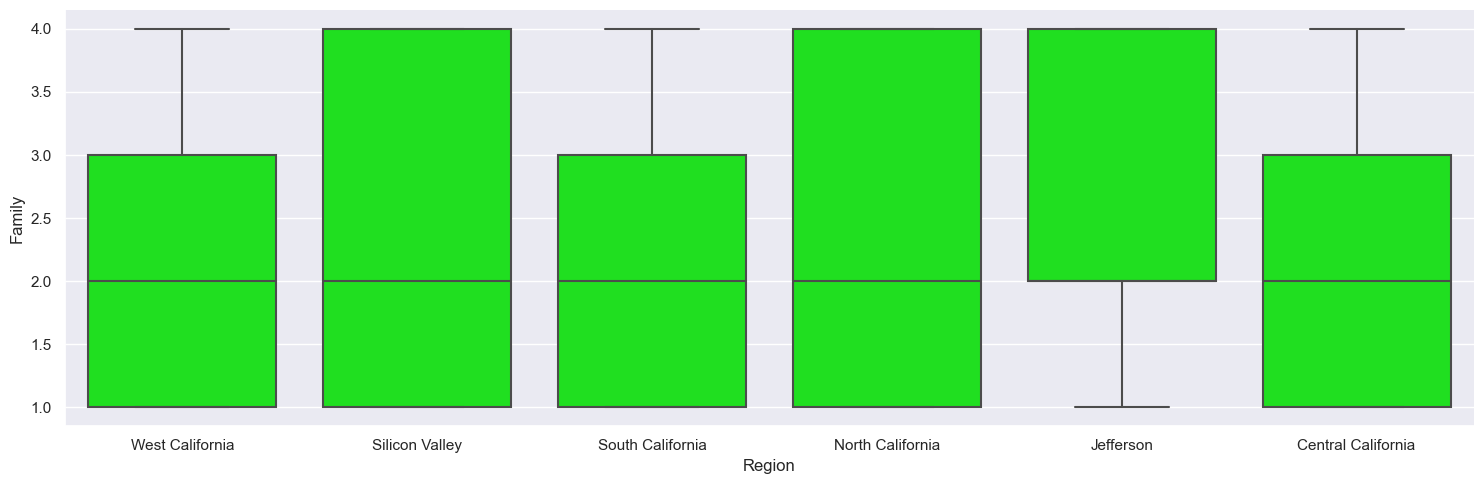

In [63]:
multi_plot(x = 'Region' , y = 'Family')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.26 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers who live in Jefferson have Family Members more than other customers.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Customers who live in Silicon Valley and North California have similar Family Members while those who live in West California and Central California have the lowest Family Members.

  Box Plot: Family vs Income
    - 4 Mean = 62.51
    - 3 Mean = 66.9
    - 1 Mean = 78.62
    - 2 Mean = 84.24


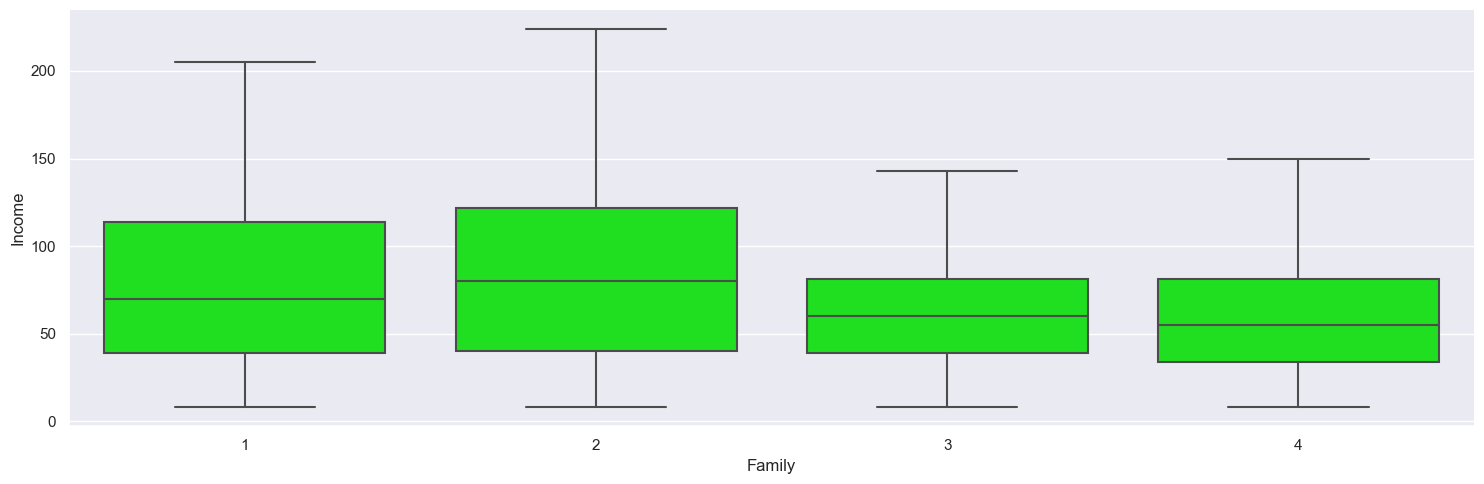

In [64]:
multi_plot(x = 'Family' , y = 'Income')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.27 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers who have 1 (Single) or 2 (Newly Married) Family Members have higher Income comparing with Customers who have 3 or 4 Family Members.

  Box Plot: Family vs CCAvg
    - 4 Mean = 1.66
    - 3 Mean = 1.7
    - 1 Mean = 2.07
    - 2 Mean = 2.24


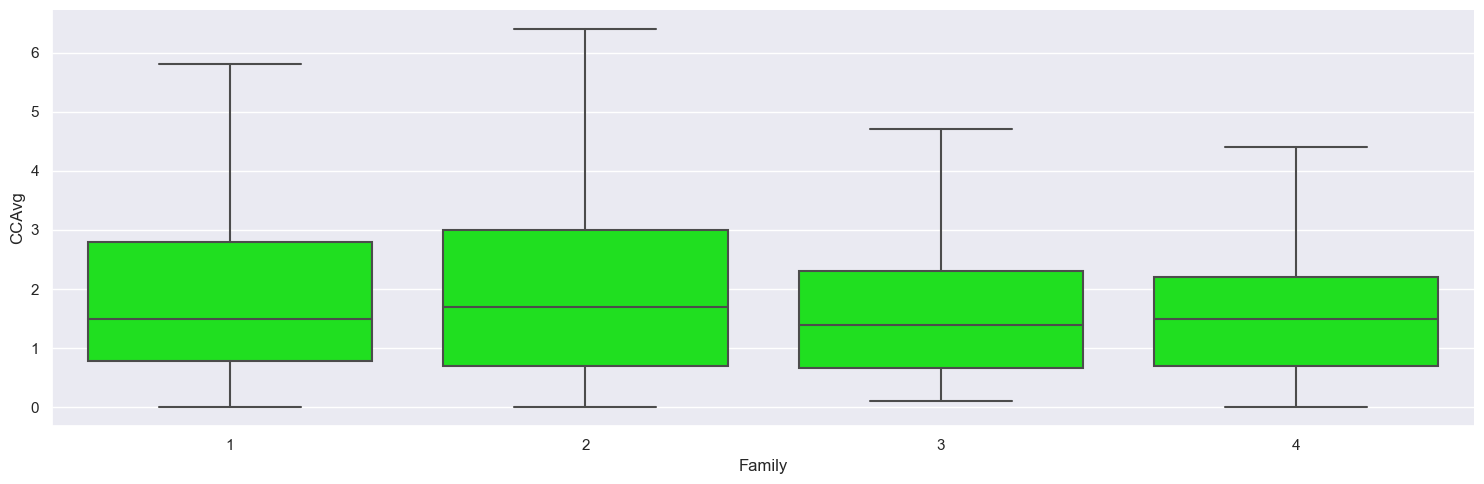

In [65]:
multi_plot(x = 'Family' , y = 'CCAvg')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.28 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Similar to Income, Customers who have 1 (Single) or 2 (Newly Married) Family Members have higher spent on Credit Cards comparing with Customers who have 3 or 4 Family Members.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **6. Insights (EDA):**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> During the analysis, the focal point was the Personal Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> In order to be able to give our business recommendations and expectations about potential customers in next Campaign, we were in a real need to determine the most important factors that have a positive influence.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Consequently, we've the below insights which will constitute a solid base for our recommendations!
    
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.1 Age:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** Customers Age is varying between 23 and 67 Years with an Average of 45.34 Years.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** 50% of customers are between 35 and 55 Years old.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Around 80% of customers are Non-Retired (Assuming that Retirement Age is at 60 Years).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** No correlation has been detected between Age and Income.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **5.** Perfect correlation has been detected between Age and Experience.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **6.** Customers with Age between (Approximately) 32 and 41 Years old have the best tend into accepting the Personal Loan.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **7.** Although all Customers with Age around 32 to 58 Years have convergent tends into accepting the Personal Loan, a noticeable decreasing in that trend is observed with Young and elder customers.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **8.** In terms of Regions, all Customers have convergent Ages and no obvious differences have been noticed.
  
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.2 Experience:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** Customers Experience is varying between 0 and 43 Years with an Average of 20.33 Years.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** 50% of customers have Experience between 10 and 30 Years.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** No correlation has been detected between Experience and Income.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** Customers with Experience (Approximately) between 0 and 9 Years have the best tend into accepting the Personal Loan.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **5.** Although all Customers with Experience around 0 to 34 Years have the convergent tends into accepting the Personal Loan, a slight decreasing in that tend is observing while the years of Experience is increasing. Furthermore, the most experienced Customers have the lowest tend into accepting.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **6.** In terms of Regions, Customers have convergent Experience and no obvious differences have been noticed.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **7.** 83 customers have Zero Years of Experience; It might indicate an Undergrad or newly Graduate Customers.


<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.3 Income:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** Customers Income is varying between 8 and 224 Thousand USD/Year with an Average of 73.77 Thousand USD/Year.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** 50% of customers have Income between 39 and 98 Thousand USD/Year.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** A fairly strong positive correlation has been found between Income-CCAvg (0.6) which is very important; Richer customers spent more on Credit Cards.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** Customers with higher Income tend to accept the Personal Loan more than Customers with lower Income.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **5.** The Average Income for customers who have accepted the Personal Loan (144.75 Thousand USD/Year) is much higher than those who have rejected it (66.24 Thousand USD/Year).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **6.** In terms of Regions; West California Customers have higher income than others, while Customers with lower income live in North California and Jefferson Sub-Regions.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.4 Family:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** Customers Family Members is varying between 1 and 4 with around 29.44% of Customers are Single (1 Family Member).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** Customers with larger Family Members (3 or 4) tend to accept the Personal Loan more than Customers with smaller Family Member (1 or 2).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Customers with larger Family Members (3 or 4) have lower Income than Customers with smaller Family Member (1 or 2).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** In terms of Regions; Customers who live in Jefferson have Family Members more than other customers, while Customers who live in Silicon Valley and North California have similar Family Members and those who live in West California and Central California have the lowest Family Members.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.5 CCAvg:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** Customers Spent on Credit Cards is varying between 0 and 10 Thousand USD/Month with an Average of 1.94.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** 50% of customers have Spent on Credit Cards between 0.7 and 2.5 Thousand USD/Month.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** A fairly strong positive correlation has been found between Income-CCAvg (0.6) which is very important; Richer customers spent more on Credit Cards.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** Customers with medium Spending on Credit Cards tend to accept the Personal Loan more than Customers with lower or higher Spending.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **5.** In terms of Regions; West California, Silicon Valley, and South California Customers have higher spent than others , while Customers with lower spent on Credit Cards live in Central California and Jefferson Regions.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **6.** 106 customers have Zero Spent on Credit Cards, either they don't have a Credit Card, or they don't use it in daily transactions/shopping!.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.6 Education:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** Dataset contains 3 Types of Education (1: Undergrad, 2: Graduate, and 3: Advanced/Professional).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** 41.92% of Customers are Undegraded which might indicate that these customers are youth and probably not having a job yet.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Customers who are Graduate or Advanced/Professional tend to accept the Personal Loan more than Undergrad Customers.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** In terms of Regions, Customers have convergent Education Levels and no obvious differences have been noticed.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.7 Mortgage:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** Customers Obligation due to Mortgage is varying between 0 and 635 Thousand USD with an Average of 56.5 Thousand USD.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** Around 75% of customers (3,462 Customers) don't have a House Mortgage, either they own their homes (including those who live with parents) or they live in a rented one.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** The Average Mortgage for customers who have accepted the Personal Loan (100.85 Thousand USD) is much higher than those who have rejected it (51.79 Thousand USD/Month).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** Customers with lower Mortgage tend to accept the Personal Loan more than Customers with higher Mortgage.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **5.** In Regions; Customers who live in West California, Silicon Valley, South California, and North California have similar Mortgage, while those who live in Jefferson and Central California have the lowest Mortgage.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.8 Personal Loan:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** An obvious positive impact on the acceptance of Personal Loan has been noticed between customers with higher Income, Higher Mortgage, higher Education Level, higher CCAvg, and bigger Family Size.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** In addition to the above, Customers who don't have a Securities Account and/or Certificate of Deposit have accepted the Personal Loan more than others who do have.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Furthermore, Customers who are using the Internet Banking Facilities of AllLife Bank tend to accept the Personal Loan more than others who don't use it. 
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Customers who don't use Credit Cards issued by Competitor Banks tend to accept the Personal Loan more than others who do use it. 
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** Only 9.6% of customers have accepted the Personal Loan offered in the last campaign.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.9 Securities Account:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** Customers who don't have Security Accounts with AllLife Bank tand to accept the Personal Loan more than others who do have.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** Only 10.44% of customers have Security Accounts with AllLife Bank.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.10 CD Account:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** Customers who don't have Certificate of Deposit Accounts with AllLife Bank tend to accept the Personal Loan more than others do have.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** Only 6.1% of customers have a Certificate of Deposit (CD) Account with AllLife Bank.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.11 Online:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** Customers who are using the Internet Banking Facilities of AllLife Bank tend to accept the Personal Loan more than others who don't use it.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** Only 59.7% customers do use the Internet Banking Facilities of AllLife Bank.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.12 Credit Card:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** Customers who don't use a Credit Card issued by any other Bank tend to accept the Personal Loan more than others who do use it.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** 29.4% of customers do use a Credit Card issued by other Banks (Probably, Competitors Banks).

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.13 County:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** Dataset contains 5,000 Customers live in 38 different counties.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** Most of customers are living in Los Angeles County (1,095) with a percentage of 21.9%.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Los Angeles (21.9%), San Diego (11.36%), Santa Clara (11.26%), and Alameda (10%) represent the counties with most intensity with a total percentage of 54.52%.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** 34 Counties combinedly represent the remaining 45.84%.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **5.** 25 Counties have less than 100 Customers for each, some with less than 10!
    
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.14 Region:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** All Customers live in California State, distributed over 6 Regions (West California, Silicon Valley, South California, North California, Jefferson, and Central California). 
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** Silicone Valley represents the highest No. of Customers (1,825), followed by West California (1,397), then South California (1,094).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** North California, Central California, and Jefferson Regions have the lowest No. of Customers with less than 500 for each. 
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** Central California and Jefferson Regions have a quite low No. of Customers, 119 and 92 respectively.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **5.** Jefferson and North Customers have lower Income than others.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **6.** Customers who live in Silicon Valley have accepted the Personal Loan more than others (181), followed with West California (138), then South California (101).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Few Customers in Jefferson, Central California, and North California have accepted the Personal Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8.** Customers who live in West California, Silicon Valley, and South California Customers have higher spent on Credit Cards than others.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **9.** A convergent Age and Experience for all customers in the 6 Regions.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **10.** Customers who live in Jefferson have Family Members more than other customers, Silicon Valley and North California Customers have similar Family Members, and those who live in West California and Central California have the lowest Family Members.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **7. Recommendations (EDA):**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** At the outset, the business owner (AllLife Bank) must realize that while some Features in his Dataset have no effects on prediction (Customer ID), other Features must be added as Integral Part of his Dataset (Region) for quick guidance into segregating, and then targeting the potential customers based on Place of Living rather than using only Numeric/Uninterpreted Feture (ZIP COde).

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** At a glance and before diving deeply in Business Recommendations, it's worthy to guide the Business Owner into the most influencing factors of accepting the Persoanl Loan and conequently, increasing the probability of moving Customers from Loyality (Depositors) Segment into  Depositors/Borrwoers Segment:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Customers with Age varying between 32 and 58 Years Old have the best tend into accepting the Personal Loan; Younger and Elder Customers don't have that much of importance.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-**  Customers with Experience(0-34 Years) have the best tend into accepting the Personal Loan; Most Experienced Customers don't have that much of importance.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-**  Customers with Income (94-202 Thousand USD/Year) have the best tend into accepting the Personal Loan, while both Customers with low Income (8 to 93 Thousand USD/Year) and extremely high Income (Above 202 Thousand USD/Year) don't represent a promised opportunity into accepting.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-**  Customers with larger Family Size (3 or 4 Members) have higher tend into accepting the Personal Loan than Customers with smaller Family Size  (1 or 2 Members).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-**  Customers with Medium Spending on Credit Cards between (2-6 Thousand USD/Month) have higher tend into accepting the Personal Loan than Customers with either low (0-2 Thousand USD/Month) or high (6-10 Thousand USD/Month) spending.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-**  Customers with Education Level (Graduate or Advanced/Professional) have higher tend into accepting the Personal Loan than Customers who are still Undergrad.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-**  Customers with lower Mortgage (0-63.5 Thousand USD) have the best tend into accepting the Personal Loan, while an increasing in Mortgage leads to decreasing in that tend.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-**  Customers who don't have Securities Account have the much higher tend into accepting the Personal Loan much more than those who have it.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-**  Customers who don't have CD Account have the much higher tend into accepting the Personal Loan much more than those who have it.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-**  Customers who are using the Internet Banking Facilities (Online) have higher tend into accepting the Personal Loan than those who don't use it.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-**  Customers who don't use Credit Cards issued by other banks have the much higher tend into accepting the Personal Loan much more than those who use it.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-**  Customers who live in Silicon Valley, West California, and South California Regions have the much higher tend into accepting the Personal Loan much more than those who live in North California, Central California, and Jefferson Regions.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-**  While 54.52 of AllLife Bank Customers live in 4 Counties (Los Angeles, San Diego, Santa Clara, and Alameda), 25 Counties have very few Customers (Less than 2% for the highest and gradually decreasing to 0.0006%).

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Pay more efforts to attract new customers  with Age (32-58 Years), as well as start in the Marketing Plans to target the current Customers whose Age falls within this range. Note that Customers outside this Range represent arrounf 50% of Customers (Young and Elders) - Risk Factor.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Focus the efforts of offereng the Personal Loan to Customers with Experience between 0 and 34 Years.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** Although the best opportunity of accepting the Personal Loan belongs to Customers with Income (94-202 Thousand USD/Year), such Customers represent less than 25% of Current Customers. Thus, Targeting new Customers with similar Income is a must and will be fruitful, as well as targeting the current Customers more than others with lower or extremely higher Income.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** While Targeting new Customers with such considerable high Income(94-202 Thousand USD/Year),  VIP Service Centres must be established - if not exist - to offer a distinguished service and attarcting factor.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Although Customers with larger Family Size (3 or 4 Members) have a little more importance than Customers with smaller Family Size (1 or 2 Members), they still have a valuable opportunity moving them - if not yet moved - into the Depositors/Borrowers Segment.  

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8.** Initiating Kids savings programs (Securing a decent life in the future and tuition fees) would be a priority to attract new customers with larger family size as well as keeping the current Customers with such Family Size and prevent losing them to competitor banks.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **9.** AllLife Credit Cards policies and features must be imroved to encourage the Customers to sepnd more on daily transactions/shopping. Customer must spend (2-6 Thousand USD/Month) to get a better opportunity to move into Depositors/Borrowers Segment while around 60% of current Customers have an Avaerage Spending less than (2 Thousand USD/Month) - Risk Factor.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **10.** Low fees Credit Cards, loyalty programs, rewards and discount's agreements with retail stores, hotels, airlines, cars rental, etc, will have a great impact in increasing the Customers spending on Credit Cards as well as attracting new Customers.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **11.** Although Customers with higher Education Level (Graduate or Advanced/Professional) have a better importance than Customers with lower Education Level (Undergrad), they represnt only 50% of current Customers. Thus, marketing plan must be focused into offering the Personal Loan to Customers with higher education level as well as attracting new Customers with similar high level of education.


<br> <left> <font size=3 style='font-family:Courier New' color='black'> **11.** Targeting Customers whos Mortgage is less than 63.5 Thousand USD as the opportunity of having them in the Depositors/Borrowers Segment is much higher than others.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **12.** AllLife Bank must invest in enhancing the Internet Banking Facilities (Online) due to its important rule in attracting the Customers to accept the Personal Loan. Note that 40% of Customers do not use such Servies - Risk Factor.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **13.** Robust, friendly and easy to use Banking Services would have a Positive Return on Investment.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **14.** Since the Borrowing is the current priority, avoiding the marketing of CD and Securities Account will be more important due to their negative impact on accepting the Personal Loan.  

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **15.** It's worthy to focus the marketing events into Customers who live in Silicon Valley, West California, and South California Regions as they have a better records in accepting the Personal Loan more than others.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **16.** Talking about Counties, Customers who live in Los Angeles, Santa Clara, San Diego, Alameda, and Orange Counties have accepted the Personal Loan more than others who live in other Counties. Thus, targeting these Counties would have higher important and better results. 

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **17.** An optional business advice, it's will noticeable that out of 6 Regions, there are 3 Regions have a very low No. of Customers who have accepted the Personal Loan. Furthermore, 26 out of 38 Counties show the same criteria which raise a flag of urgent action to be taken in order to investigate this issue and try to find the best solutions. AllLife Bank must work hardly ro increase his Customer Base (whom matching the previously detailed conditions) in these Counties.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **8. Logistic Regression Model:**  

In [66]:
# Prior to start in building our Models, Logistic and Decision Tree, we will drop the County Feature and use the Region:

df.drop(['County'] , axis = 1 , inplace=True)

In [67]:
# Ensuring that everything is working as expected after dropping the County Column by displaying the first 5 Data Rows:

df.head().style.set_properties(**{'color': 'green'})

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Region
0,25,1.000000,49,4,1.600000,1,0,0,1,0,0,0,West California
1,45,19.000000,34,3,1.500000,1,0,0,1,0,0,0,West California
2,39,15.000000,11,1,1.000000,1,0,0,0,0,0,0,Silicon Valley
3,35,9.000000,100,1,2.700000,2,0,0,0,0,0,0,Silicon Valley
4,35,8.000000,45,4,1.000000,2,0,0,0,0,0,1,West California


In [68]:
# Initially, we will crate a Copy of our Dataset to be used in Logistic Regression Model:

df_log = df[:]

In [69]:
# Ensuring that the new Dataframe is working by displaying the first 5 Data Rows:

df_log.head().style.set_properties(**{'color': 'green'})

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Region
0,25,1.000000,49,4,1.600000,1,0,0,1,0,0,0,West California
1,45,19.000000,34,3,1.500000,1,0,0,1,0,0,0,West California
2,39,15.000000,11,1,1.000000,1,0,0,0,0,0,0,Silicon Valley
3,35,9.000000,100,1,2.700000,2,0,0,0,0,0,0,Silicon Valley
4,35,8.000000,45,4,1.000000,2,0,0,0,0,0,1,West California


In [70]:
# Summarizing the No./Percentage of True (1) / False (0) Cases in Dataset:

print('\033[1m' , '\033[92m' , '- Original Dataset:' , '\033[0m' , sep='')
print('\033[92m' , 'No. of True Cases (1) : {0} ({1:0.2f}%)'. \
      format(len(df_log.loc[df_log['Personal_Loan'] == 1]) , (len(df_log.loc[df_log['Personal_Loan']==1])/len(df_log.index)) * 100))
print('\033[92m' , 'No. of False Cases (0): {0} ({1:0.2f}%)'. \
      format(len(df_log.loc[df_log['Personal_Loan'] == 0]) , (len(df_log.loc[df_log['Personal_Loan']==0])/len(df_log.index)) * 100))
print()

- Original Dataset:
 No. of True Cases (1) : 480 (9.60%)
 No. of False Cases (0): 4520 (90.40%)



<left> <font size=5 style='font-family:Courier New' color='Red' > **8.1 Model Evaluation Criterion:**
<br> <left> <font size=4 style='font-family:Courier New' color='red'> Logistic Regression Model can make Wrong Predictions if (Where **1: Accept**; **0: Reject**):
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Predict a Customer will accept the Personal Loan but in fact he will reject it (**FP**) - **Loss of Resources**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Predict a Customer will reject the Personal Loan but in fact he will accept it (**FN**) - **Loss of Opportunity**

<br> <left> <font size=4 style='font-family:Courier New' color='red'> Which Loss is greater?
<br> <left> <font size=3 style='font-family:Courier New' color='black'> The Marketing Process to offer the Personal Loan will be conducted by the Bank Team; Paying efforts on FP Customer will not have the same impact as not paying such efforts on FN Customer!
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Thus, Missed Classification a Customer as FP will cause a Loss of Time (Resources), while Missed Classification a Customer as FN will cause a Loss of Valuable Opportunity to increase the Customers base of Personal Loans.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Eventually, Reducing the FN by maximizing the **Recall** must be our Target.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Hint: It's quite important to notice that due to Huge Imbalance between True (1) and False (0) Cases, Accuracy might not lead to fruitful results.

In [71]:
# Splitting the Dataset into Independent and Dependent Subsets:

X = df_log.drop('Personal_Loan' , axis=1)
y = df_log.pop('Personal_Loan')

In [72]:
# One-Hot Encoding the Categorical Feature (Region):

X = pd.get_dummies(X, drop_first=True)

In [73]:
# Ensuring that everything is working as expected after Splitting and One-Hot Encoding by Dispaying X:

X.head().style.set_properties(**{'color': 'green'})

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Region_Jefferson,Region_North California,Region_Silicon Valley,Region_South California,Region_West California
0,25,1.000000,49,4,1.600000,1,0,1,0,0,0,0,0,0,0,1
1,45,19.000000,34,3,1.500000,1,0,1,0,0,0,0,0,0,0,1
2,39,15.000000,11,1,1.000000,1,0,0,0,0,0,0,0,1,0,0
3,35,9.000000,100,1,2.700000,2,0,0,0,0,0,0,0,1,0,0
4,35,8.000000,45,4,1.000000,2,0,0,0,0,1,0,0,0,0,1


In [74]:
# Ensuring that everything is working as expected after Splitting by Dispaying y:

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

In [75]:
# Splitting the Subsets into Training and Testing Subsets:
    
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.30 , random_state=1)

In [76]:
# Summarizing the No./Percentage of True (1) / False (0) Cases in Training and Testing Subsets:

print('\033[1m' , '\033[92m' , '- Training Subset:' , '\033[0m' , sep='')
print('\033[92m' , 'No. of True Cases (1) : {0} ({1:0.2f}%)'. \
      format(len(y_train[y_train[:]==1]) , (len(y_train[y_train[:]==1])/len(y_train)) * 100))
print('\033[92m' , 'No. of False Cases (0): {0} ({1:0.2f}%)'. \
      format(len(y_train[y_train[:]==0]) , (len(y_train[y_train[:]==0])/len(y_train)) * 100))
print()
      
print('\033[1m' , '\033[92m' , '- Testing Subset:' , '\033[0m' , sep='')
print('\033[92m' , 'No. of True Cases (1) : {0} ({1:0.2f}%)'. \
      format(len(y_test[y_test[:]==1]) , (len(y_test[y_test[:]==1])/len(y_test)) * 100))
print('\033[92m' , 'No. of False Cases (0): {0} ({1:0.2f}%)'. \
      format(len(y_test[y_test[:]==0]) , (len(y_test[y_test[:]==0])/len(y_test)) * 100))

- Training Subset:
 No. of True Cases (1) : 331 (9.46%)
 No. of False Cases (0): 3169 (90.54%)

- Testing Subset:
 No. of True Cases (1) : 149 (9.93%)
 No. of False Cases (0): 1351 (90.07%)


<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.2 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** True (1) Cases equal to 480 in the Original Dateset, they have been splitted into 331 Case in Training Subset and 149 Case in Testing Subset with convergent percentages (9.46% and 9.93% Respectively).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** False (0) Cases equal to 4,520 in the Original Dateset, they have been splitted into 3,169 Case in Training Subset and 1,351 Case in Testing Subset with convergent percentages (90.54% and 90.07% Respectively).

In [77]:
# Defining a Function to Plot the Confusion Matrix:

def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold):
    pred_prob = model.predict_proba(predictors)[: , 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format
                        (item / cm.flatten().sum())] for item in cm.flatten()]
                         ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm , annot=labels, fmt="", cmap='viridis')
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

In [78]:
# Defining a Function to report the TN, FP, FN, and Tp in Confusion Matrix:

def confusion_matrix_entries(model, predictors, target, threshold):
    pred_prob = model.predict_proba(predictors)[: , 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format
                        (item / cm.flatten().sum())] for item in cm.flatten()]
                         ).reshape(2, 2)
    cm_df = pd.DataFrame(cm)

    tn = cm_df.loc[0,0]
    fp = cm_df.loc[0,1]
    fn = cm_df.loc[1,0]
    tp = cm_df.loc[1,1]
    
    cm_df = pd.DataFrame({'Value': [tn, fp, fn, tp]})
    return cm_df

In [79]:
# Defining a Function to Display the Performance Metrics for Training/Testing Subsets:

def model_performance_classification_sklearn_with_threshold(model , predictors , target , threshold):
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target , pred)
    recall = recall_score(target , pred)
    precision = precision_score(target , pred)
    f1 = f1_score(target , pred)

    df_perf = pd.DataFrame({"Accuracy" : acc , 
                            "Recall" : recall ,
                            "Precision" : precision ,
                            "F1 Score" : f1} , index=[0])

    return df_perf

In [80]:
# Now, lets build the Logistic Regression Model using the solver (liblinear):

logistic_model = LogisticRegression(solver='liblinear' , random_state=1)
logistic_model = logistic_model.fit(X_train, y_train)

In [81]:
# Lets display the Model Coefficients:

model_coeff = logistic_model.coef_[0]
model_Odds = np.exp(logistic_model.coef_[0])
model_Odds_change = (np.exp(logistic_model.coef_[0]) - 1) * 100

df_coeff = pd.DataFrame({'Column Name' : X_train.columns , 
                         'Coefficient' : model_coeff , 
                         'Odds' : model_Odds , 
                         'Change Odds' : model_Odds_change})
                        
df_coeff['Change Odds'] = pd.Series(['{0:.6f}%'.
format(val) for val in df_coeff['Change Odds']], index = df_coeff.index)

df_coeff.style.set_properties(**{'color': 'green'})

,Column Name,Coefficient,Odds,Change Odds
0,Age,-0.385966,0.679794,-32.020637%
1,Experience,0.386150,1.471305,47.130520%
2,Income,0.048895,1.050110,5.011042%
3,Family,0.635371,1.887721,88.772149%
4,CCAvg,0.162056,1.175927,17.592662%
5,Education,1.627516,5.091211,409.121062%
6,Mortgage,0.000782,1.000782,0.078226%
7,Securities_Account,-0.897485,0.407593,-59.240671%
8,CD_Account,3.252957,25.866719,2486.671947%
9,Online,-0.585138,0.557029,-44.297074%


<left> <font size=5 style='font-family:Courier New' color='darkgreen'> **8.3 Interpretations (Coefficients):**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** CD_Account, Education, and Family Coefficients have the largest +Ve Values.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** CreditCard, Securities_Account, and Region_Jefferson Coefficients have the smallest -Ve Values (Mathematically: -2 < -1).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** An increase in +Ve Coefficient leads to an increase in the Prediction of accepting a Personal Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** A decrease in -Ve Coefficient leads to an increase in the Prediction of rejecting a Personal Loan (Mathematically: Decrease in -Ve is moving away from Zero).

<left> <font size=3 style='font-family:Courier New' color='darkgreen'> ***Consequently, we are able to predict the below Criteria:***
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Customers who have a CD Account, higher Education Level, higher Average Spending on Credit Cards, Higher Experience, and larger Family Size have the higher probability to accept the Personal Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Although of its small impact, Customers with higher Mortgage and Income have the higher probability to accept the Personal Loan more than other Customers with lower Mortgage and Income.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Customers who have Securities Account, use Credit Cards issued by other Banks, and use the Internet Banking Facilities (Online) have the higher probability to reject the Personal Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Younger Customers have higher probability to accept the personal Loan than elders.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** In terms of Region, Customers who live in Jefferson Region have higher probability to reject the Personal Loan, while those who live in North California have higher probability to accept it.

<left> <font size=5 style='font-family:Courier New' color='darkgreen'> **8.3 Interpretations (Odds & Change Odds):**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Age:** Holding all other features constant, a unit change in Age will decrease the odds of a customer accepting the Personal Loan by 0.68 times or a 32% decrease in the odds.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Experience:** Holding all other features constant, a unit change in Experience will increase the odds of a customer accepting the Personal by 1.47 times or a 47.11% increase in the odds.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Income:** Holding all other features constant, a unit change in Income will increase the odds of a customer accepting the Personal Loan by 1.05 times or a 5% increase in the odds.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Family:** Holding all other features constant, a unit change in Family will increase the odds of a customer accepting the Personal Loan by 1.89 times or a 88.54% increase in the odds.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **CCAvg:** Holding all other features constant, a unit change in CCAvg will increase the odds of a customer accepting the Personal Loan by 1.18 times or a 17.6% increase in the odds.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Education:** Holding all other features constant, a unit change in Education will increase the odds of a customer accepting the Personal Loan by 5.09 times or a 409.16% increase in the odds.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Mortgage:** Holding all other features constant, a unit change in Mortgage will increase the odds of a customer accepting the Personal Loan by 1 times or a 0.08% increase in the odds.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Securities_Account:** Holding all other features constant, a unit change in Securities_Account will decrease the odds of a customer accepting the Personal Loan by 0.41 times or a 58.97% decrease in the odds.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **CD_Account:** Holding all other features constant, a unit change in CD_Account will increase the odds of a customer accepting the Personal Loan by 25.82 times or a 2482.17% increase in the odds.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Online:** Holding all other features constant, a unit change in Online will decrease the odds of a customer accepting the Personal Loan by 0.56 times or a 44.33% decrease in the odds.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **CreditCard:** Holding all other features constant, a unit change in CreditCard will decrease the odds of a customer accepting the Personal Loan by 0.36 times or a 63.82% decrease in the odds.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Region_Jefferson:** The odds of a customer who lives in Jefferson Region and accepting a Personal Loan is 0.45 times less than the customer who lives in Central California Region or 55.41% fewer odds of accepting a Persoanl Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Region_North California:** The odds of a customer who lives in North California Region and accepting a Personal Loan is 0.79 times less than the customer who lives in Central California Region or 21.03% fewer odds of accepting a Persoanl Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Region_Silicon Valley:** The odds of a customer who lives in Silicon Valley Region and accepting a Personal Loan is 0.64 times less than the customer who lives in Central California Region or 35.98% fewer odds of accepting a Persoanl Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Region_South California:** The odds of a customer who lives in South California Region and accepting a Personal Loan is 0.66 times less than the customer who lives in Central California Region or 34.24% fewer odds of accepting a Persoanl Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Region_West California:** The odds of a customer who lives in West California Region and accepting a Personal Loan is 0.63 times less than the customer who lives in Central California Region or 37.42% fewer odds of accepting a Persoanl Loan.

Confusion Matrix for Training Subset (Threshold = 0.5):


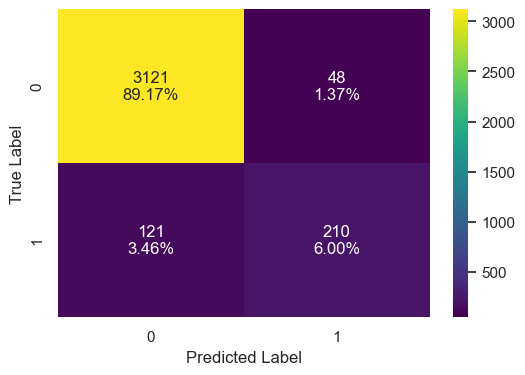

In [82]:
# Displaying the Confusion Matrix for Training Subset using Threshold_init = 0.5:

threshold_init = 0.5
print('\033[1m' , '\033[92m' , 'Confusion Matrix for Training Subset (Threshold = ', round(threshold_init,2), '):', sep='')
confusion_matrix_sklearn_with_threshold(logistic_model , X_train , y_train , threshold = threshold_init)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.4 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Logistic Model is doing Wrong Predictions on Training Subset using Threshold = 0.5 as follow:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **FN = 121 (3.46%)** Predicting a Customer will reject the Personal Loan but in fact he will accept it.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **FP = 48 (1.37%)** Predicting a Customer will  accept the Personal Loan but in fact he will reject it.

In [83]:
# Displaying the Performance Metrics for Training Subset using Threshold_init:

train_metrics_init = model_performance_classification_sklearn_with_threshold(logistic_model , X_train , y_train , threshold = threshold_init)

print('\033[1m' , '\033[92m' , 'Training Performance Metrics (Threshold = ' , 
      '{0:.2}'.format(threshold_init) , '):' , '\033[0m', '\033[92m', sep='')
print(train_metrics_init.to_string(index=False))

Training Performance Metrics (Threshold = 0.5):
 Accuracy   Recall  Precision  F1 Score
 0.951714 0.634441   0.813953  0.713073


<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.5 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** It's cleared that Recall Value is low (0.63) and need to be improved using other Techniques.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** We can't rely on Accuracy Value due to the Huge Imbalance in Dataset (9% to 91% of Cases is risky).

Confusion Matrix for Testing Subset (Threshold = 0.5):


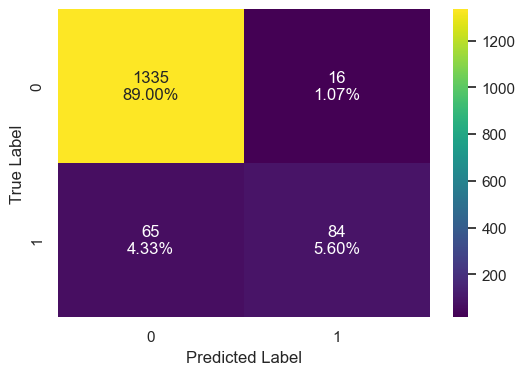

In [84]:
# Displaying the Confusion Matrix for Testing Subset using Threshold_init = 0.5:

print('\033[1m' , '\033[92m' , 'Confusion Matrix for Testing Subset (Threshold = ', round(threshold_init,2), '):', sep='')
confusion_matrix_sklearn_with_threshold(logistic_model , X_test , y_test , threshold = threshold_init)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.6 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Logistic Model is doing Wrong Predictions on Testing Subset using Threshold = 0.5 as follow:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **FN = 65 (4.33%)** Predicting a Customer will reject the Personal Loan but in fact he will accept it.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **FP = 16 (1.07%)** Predicting a Customer will  accept the Personal Loan but in fact he will reject it.

In [85]:
# Displaying the Performance Metrics for Testing Subset using Threshold_init:

test_metrics_init = model_performance_classification_sklearn_with_threshold(logistic_model , X_test , y_test , threshold = threshold_init)

print('\033[1m' , '\033[92m' , 'Testing Performance Metrics (Threshold = ' , 
      '{0:.2}'.format(threshold_init) , '):' , '\033[0m', '\033[92m', sep='')
print(test_metrics_init.to_string(index=False))

Testing Performance Metrics (Threshold = 0.5):
 Accuracy   Recall  Precision  F1 Score
    0.946 0.563758       0.84  0.674699


<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.7 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** It's cleared that Recall Value is lower than its value on Training Subset (0.63 to 0.56).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** The model performance on Testing Subset is worst than its performance on Training Subset.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Again, we can't rely on Accuracy Value due to the Huge Imbalance in Dataset (9% to 91% of Cases is risky).

In [86]:
# Reporting the TN, FP, FN, and TP in Testing Subset using Threshold_init:

cm_init = confusion_matrix_entries(logistic_model , X_test , y_test , threshold = threshold_init)

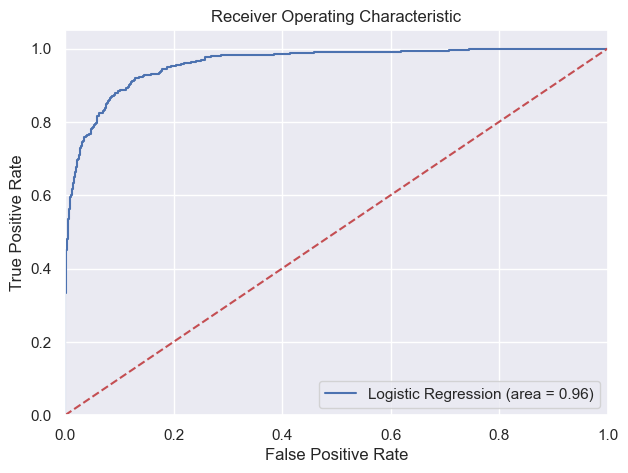

In [87]:
# Plotting ROC-AUC for Training Subset using threshold_init:

logistic_model_roc_train = roc_auc_score(y_train , logistic_model.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train , logistic_model.predict_proba(X_train)[:, 1])

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logistic_model_roc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.8 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Better Recall Value is expected to be obtained from ROC-AUC with Area Under Curve = 0.96.

In [88]:
# Using the ROC-AUC to determine the Optimal Threshold (threshold_roc):

fpr, tpr, thresholds = roc_curve(y_train, logistic_model.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
threshold_roc = thresholds[optimal_idx]
print('\033[92m' , 'Optimal Threshold using ROC-AUC = ' , threshold_roc)

 Optimal Threshold using ROC-AUC =  0.08106306174225751


Confusion Matrix for Training Subset (Threshold = 0.08):


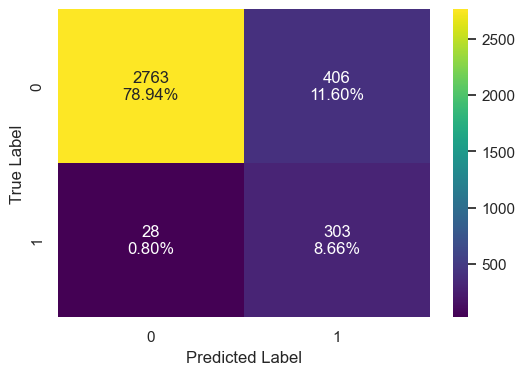

In [89]:
# Displaying the Confusion Matrix for Training Subset using Threshold_roc = 0.081:

print('\033[1m' , '\033[92m' , 'Confusion Matrix for Training Subset (Threshold = ', round(threshold_roc,2), '):', sep='')
confusion_matrix_sklearn_with_threshold(logistic_model , X_train , y_train , threshold = threshold_roc)

In [90]:
# Displaying the Performance Metrics for Training Subset using Threshold_roc = 0.081:

train_metrics_roc = model_performance_classification_sklearn_with_threshold(logistic_model , X_train , y_train , threshold = threshold_roc)

print('\033[1m' , '\033[92m' , 'Training Performance Metrics (Threshold = ' , 
      '{0:.2}'.format(threshold_roc) , '):' , '\033[0m', '\033[92m', sep='')
print(train_metrics_roc.to_string(index=False))

Training Performance Metrics (Threshold = 0.081):
 Accuracy   Recall  Precision  F1 Score
    0.876 0.915408   0.427362  0.582692


<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.9 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** While Accuracy, Precision, and F1 Score have been decreased, a Huge Improvement on Recall (0.634 to 0.915) has been acheived using the Threshold derived from the ROC-AUC.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Although the FP have been increased from 48 to 404, our main target by minimizing the FN has been achieved by decreasing them from 121 to 28.

Confusion Matrix for Testing Subset (Threshold = 0.08):


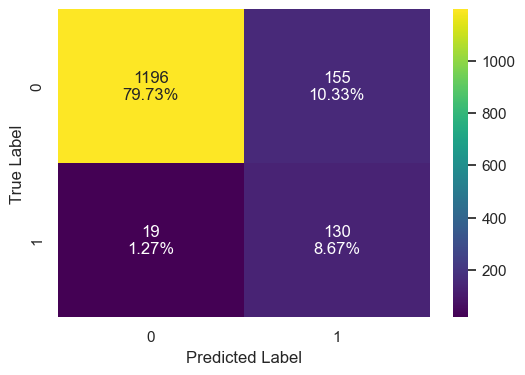

In [91]:
# Displaying the Confusion Matrix for Testing Subset using Threshold_roc = 0.081:

print('\033[1m' , '\033[92m' , 'Confusion Matrix for Testing Subset (Threshold = ', round(threshold_roc,2), '):', sep='')
confusion_matrix_sklearn_with_threshold(logistic_model , X_test , y_test , threshold = threshold_roc)

In [92]:
# Displaying the Performance Metrics for Testing Subset using Threshold_roc = 0.081:

test_metrics_roc = model_performance_classification_sklearn_with_threshold(logistic_model , X_test , y_test , threshold = threshold_roc)

print('\033[1m' , '\033[92m' , 'Testing Performance Metrics (Threshold = ' , 
      '{0:.2}'.format(threshold_roc) , '):' , '\033[0m', '\033[92m', sep='')
print(test_metrics_roc.to_string(index=False))

Testing Performance Metrics (Threshold = 0.081):
 Accuracy   Recall  Precision  F1 Score
    0.884 0.872483    0.45614  0.599078


<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.10 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Comparing with Testing Performance Metrics using Threshold 0.5, The Recall Value has gotten a huge improvement from 0.56 to 0.87 using a Threshold 0.081.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Accuracy, Precision, and F1 Score have now less values than their previous values when using a Threshold 0.5.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** A noticeable decrease in FN from 65 to 19 has been acheived on Testing Subset by changing the Threshold from 0.5 to 0.081.

In [93]:
# Reporting the TN, FP, FN, and TP in Testing Subset using Threshold_roc:

cm_roc = confusion_matrix_entries(logistic_model , X_test , y_test , threshold = threshold_roc)

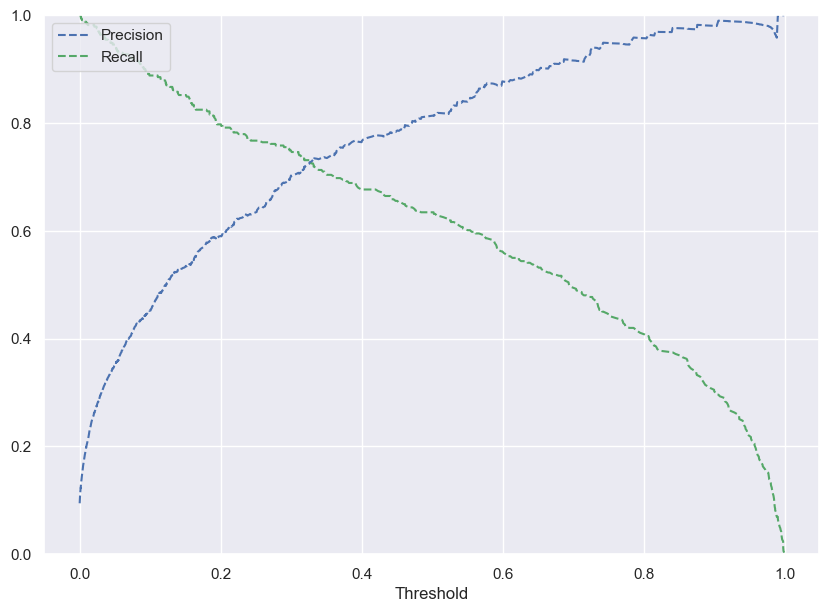

In [94]:
# For further Improvements, lets use the Precision-Recall Curve to find a better Threshold if possible:

y_scores = logistic_model.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()


<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.11 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> The Threshold Value that gives the best of both Precision and Recall is arround 0.34.

Confusion Matrix for Training Subset (Threshold = 0.34):


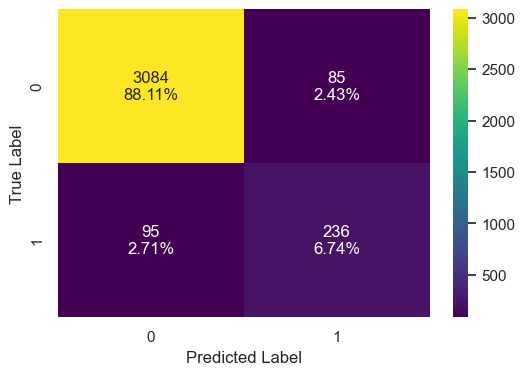

In [95]:
# Displaying the Confusion Matrix for Training Subset using Threshold_cur = 0.34:

threshold_cur = 0.34
print('\033[1m' , '\033[92m' , 'Confusion Matrix for Training Subset (Threshold = ', round(threshold_cur,2), '):', sep='')
confusion_matrix_sklearn_with_threshold(logistic_model , X_train , y_train , threshold = threshold_cur)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.12 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> FN have been increased from 28 (Using ROC-AUC) to 95 (Using Recall-Precision). Therfore, a decrease in Recall is expected to occur.

In [96]:
# Displaying the Performance Metrics for Training Subset using Threshold_cur = 0.34:

train_metrics_cur = model_performance_classification_sklearn_with_threshold(logistic_model , X_train , y_train , threshold = threshold_cur)

print('\033[1m' , '\033[92m' , 'Training Performance Metrics (Threshold = ' , 
      '{0:.2}'.format(threshold_cur) , '):' , '\033[0m', '\033[92m', sep='')
print(train_metrics_cur.to_string(index=False))

Training Performance Metrics (Threshold = 0.34):
 Accuracy   Recall  Precision  F1 Score
 0.948571 0.712991   0.735202  0.723926


<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.13 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Now, it's fair to say that Threshold derived from ROC-AUC gives the best reasults in term of Recall and minimizing the FN more than other Thresholds.

Confusion Matrix for Testing Subset (Threshold = 0.34):


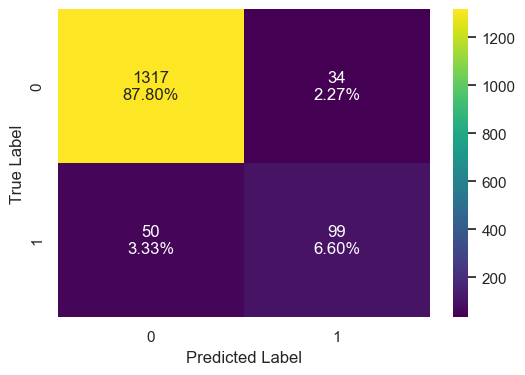

In [97]:
# Displaying the Confusion Matrix for testing Subset using Threshold_cur = 0.34:

print('\033[1m' , '\033[92m' , 'Confusion Matrix for Testing Subset (Threshold = ', round(threshold_cur,2), '):', sep='')
confusion_matrix_sklearn_with_threshold(logistic_model , X_test , y_test , threshold = threshold_cur)

In [98]:
# Displaying the Performance Metrics for Testing Subset using Threshold_cur = 0.34:

test_metrics_cur = model_performance_classification_sklearn_with_threshold(logistic_model , X_train , y_train , threshold = threshold_cur)

print('\033[1m' , '\033[92m' , 'Testing Performance Metrics (Threshold = ' , 
      '{0:.2}'.format(threshold_cur) , '):' , '\033[0m', '\033[92m', sep='')
print(test_metrics_cur.to_string(index=False))

Testing Performance Metrics (Threshold = 0.34):
 Accuracy   Recall  Precision  F1 Score
 0.948571 0.712991   0.735202  0.723926


<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.14 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Comparing with Testing Performance Metrics using Threshold 0.081, The Recall Value has decreased from 0.87 to 0.71 using a Threshold 0.34.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Accuracy, Precision, and F1 Score have now higher values than their previous values when using a Threshold 0.081.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** A noticeable increase in FN from 19 to 50 has occured on Testing Subset by changing the Threshold from 0.081 to 0.34.

In [99]:
# Reporting the TN, FP, FN, and TP in Testing Subset using Threshold_cur:

cm_cur = confusion_matrix_entries(logistic_model , X_test , y_test , threshold = threshold_cur)

In [100]:
# Displaying a Comparison between Training Performance Metrics:

train_metrics_comp = pd.concat([train_metrics_init .T ,
                                train_metrics_roc.T ,
                                train_metrics_cur.T] , axis=1)

train_metrics_comp.columns=['Threshold = ' + str('{0:.2}'.format(threshold_init)) ,
                            'Threshold = ' + str('{0:.2}'.format(threshold_roc)) ,
                            'Threshold = ' + str('{0:.2}'.format(threshold_cur))]

print('\033[1m' , '\033[92m' , 'Training Performance Comparison:' , 
      '\033[0m' , '\033[92m' , sep = '')

with pd.option_context('expand_frame_repr', False):
    print(train_metrics_comp)

Training Performance Comparison:
           Threshold = 0.5  Threshold = 0.081  Threshold = 0.34
Accuracy          0.951714           0.876000          0.948571
Recall            0.634441           0.915408          0.712991
Precision         0.813953           0.427362          0.735202
F1 Score          0.713073           0.582692          0.723926


In [101]:
# Displaying a Comparison between Testing Performance Metrics:

test_metrics_comp = pd.concat([test_metrics_init .T ,
                               test_metrics_roc.T ,
                               test_metrics_cur.T] , axis=1)

test_metrics_comp.columns=['Threshold = ' + str('{0:.2}'.format(threshold_init)) ,
                           'Threshold = ' + str('{0:.2}'.format(threshold_roc)) ,
                           'Threshold = ' + str('{0:.2}'.format(threshold_cur))]

print('\033[1m' , '\033[92m' , 'Testing Performance Comparison:' , 
      '\033[0m' , '\033[92m' , sep = '')

with pd.option_context('expand_frame_repr', False):
    print(test_metrics_comp)

Testing Performance Comparison:
           Threshold = 0.5  Threshold = 0.081  Threshold = 0.34
Accuracy          0.946000           0.884000          0.948571
Recall            0.563758           0.872483          0.712991
Precision         0.840000           0.456140          0.735202
F1 Score          0.674699           0.599078          0.723926


In [102]:
# Displaying a Comparison between TN, FP, FN, and TP in Testing Performance:

test_values_comp = pd.concat([cm_init , cm_roc , cm_cur] , axis=1)

test_values_comp.columns=['Threshold = ' + str('{0:.2}'.format(threshold_init)) ,
                          'Threshold = ' + str('{0:.2}'.format(threshold_roc)) ,
                          'Threshold = ' + str('{0:.2}'.format(threshold_cur))]

test_values_comp.index=['TN' , 'FP' , 'FN' , 'TP' ]

print('\033[1m' , '\033[92m' , 'Testing Values Comparison:' , 
      '\033[0m' , '\033[92m' , sep = '')

with pd.option_context('expand_frame_repr', False):
    print(test_values_comp)

Testing Values Comparison:
    Threshold = 0.5  Threshold = 0.081  Threshold = 0.34
TN             1335               1196              1317
FP               16                155                34
FN               65                 19                50
TP               84                130                99


<left> <font size=5 style='font-family:Courier New' color='Red' > **8.15 Notes:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Threshold = 0.5:**  The Default Threshold (**threshold_init**).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Threshold = 0.081:**  The Threshold derived from ROC-AUC (**threshold_roc**).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Threshold = 0.34:**  The Threshold derived from Recall-Precision Curve (**threshold_cur**).

<left> <font size=5 style='font-family:Courier New' color='darkblue'> **8.16 Conclusions (Logistic Regression):**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Taking our Target Metric into consideration (Recall), we found that the Logistic Model using ROC-AUC Threshold (0.081) has the best performance on both Training and Testing Subsets (Recall = 0.87 on Testing Subset), as well as its ability to acheive the minimum value of FN (FN = 19 on Testing Subset) among other models.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** We have been able to build a predictive Logistic Model that can be used by AllLife Bank to find the Depositor Customers who have the highest probability to move into Depositors/Borrowers Segment and setup the processes and plans accordingly.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Features like CD_Account, Education Level, Family Size, and Experience have the highest positive impact on moving into the Borrowers Segment, while other features like Credit Card, Online, Securities_Account, and Region_Jefferson have the highest negative impact to prevent such movement.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **9. Recommendations (Logistic Regression):**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** At the outset, the business owner (AllLife Bank) must realize that out of all the customer's data he owns; CD_Account, Education Level, Family Size, and Experience are the most influential factors in finding target customers who will be potential personal loan acceptors (Borrowers/Assets Customers) in the next campaign.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Similarely; Credit Card, Online, Securities_Account, and Region_Jefferson are the most influential factors in losing target customers who will be potential personal loan refuser in the next campaign.
        
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** The Certificate of Deposit Account (CD_Account) represent the highest significant +Ve predictor to accept the Personal Loan. Consequently, AllLife Bank must improve his policy and pay more on Marketing Plans to encourage the Depositor Customers to open CD_Accounts.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** During EDA, we found that 93.96% of Customers have no CD_Account while our Model requires a CD_Account to mark the Customer as potential Borrower. Thus, Marketing Plans in previous point must be targeted to encourage the Depositor Customers to open CD_Account to increase the probability of moving them from Depositors Segment to Depositors/Borrowers Segment.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** Customers with bigger Family Size showing a promised opportunity to accept the Personal Loan in the next Campaign. Thus, Targeting these types of Customers is very important to have a successful second round of Campaign.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** During EDA, we found that 55.36% of Customers have a Family Size between 1 and 2 Members while our Model showing that an increase in Family Size will result in an increase in the probability of marking the Customer as potential Borrower. Thus, start offering the Personal Loan to Depositor Customers with large Family Size as well as launching Kids Saving Accounts will be a great idea to attract new customers with large Family Size.
    
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Similar to Family Size, Customers with higher Levels of Education showing a promised opportunity to accept the Personal Loan in the next Campaign. Thus, Targeting these types of Customers is very important to have a successful second round of Campaign.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8.** During EDA, we found that 41.92% of Customers have an Education Level of Undergrad (1) while our Model showing that an increase in Education Level will result in an increase in the probability of marking the Customer as potential Borrower. Thus, Marketing Plans to target new Customers with higher Education Level as well as offering the Loan to Depositor Customers who has this high Level of Education.
    
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **9.** Again, Customers with higher Experience showing a promised opportunity to accept the Personal Loan in the next Campaign. Thus, Targeting these types of Customers is very important to have a successful second round of Campaign as well as start in attracting new highly experienced Customer.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **10.** Although Income, CCAvg and Mortgage have small impact on accepting the Personal Loan, It's still worthy to target the Customers with Higher Income, higher spending on Credit Cards, and higher Mortgage.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **11.** Customers who have Credit Cards issued by other Banks showing a Negative Impact on accepting the Personal Loan. Thus, AllLife Bank can either exclude them from Marketing Plans or encourage them to stop using the Credit Cards issued by other Bank and issue the AllLife Bank Cards.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **12.** Customers who have Credit Cards issued by other Banks showing the highest significant -Ve predictor to reject the Personal Loan. Thus, AllLife Bank can either exclude them from Marketing Plans or encourage them to stop using the Credit Cards issued by other Bank and issue the AllLife Bank Cards.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **13.** Low fees Credit Cards, loyalty programs, rewards and discount's agreements with retail stores, hotels, airlines, car rentals, etc, will have a great impact in encouraging the Customers to stop using other Cards and deal exclusively with AllLife Bank Cards.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **14.** The Securities Account represent the next highest significant -Ve predictor to reject the Personal Loan (10.44% of Customers have this Account). Consequently, Such Customers must be excluded and the efforts must be oriented toward the Depositor Customers who don't have such Securities Accounts.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **15.** Similar to the Securities Account; Customers who are using the Internet Banking Facilities considered as possible refuser to Personal Loan (59.68% of Customers use the Online)!Consequently, It's difficult to dismiss this segment since Internet Banking facilities are of high importance and rapidly growing these days. Thus, it might be better to try with these customers rather than ignoring a large segment of AllLife Bank Customers Base.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **16.** It's important to know that older customers are most likely to reject the Personal Loan than younger customers! Thus, trageting the Youth Customers as well as attracting the same segment of age from the community will have a good impact in increasing the bank base of borrowers.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **17.** Finally, it's worthy to know that Customers who live in Jefferson Region have the highest probability to refuse the Personal Loan while Customers in Central and North of California have the higher probability to accept it. Thus, targeting the Customers in both Central and North of California as well as avoiding the Customers of Jefferson would be more fruitful.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **10. Decision Tree Model:**  

In [103]:
# Initially, we will crate a Copy of our Dataset to be used in Decision Tree Model:

df_tree = df[:]

In [104]:
# Ensuring that the new Dataframe is working by displaying the first 5 Data Rows:

df_tree.head().style.set_properties(**{'color': 'green'})

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Region
0,25,1.000000,49,4,1.600000,1,0,0,1,0,0,0,West California
1,45,19.000000,34,3,1.500000,1,0,0,1,0,0,0,West California
2,39,15.000000,11,1,1.000000,1,0,0,0,0,0,0,Silicon Valley
3,35,9.000000,100,1,2.700000,2,0,0,0,0,0,0,Silicon Valley
4,35,8.000000,45,4,1.000000,2,0,0,0,0,0,1,West California


In [105]:
# Summarizing the No./Percentage of True (1) / False (0) Cases in Dataset:

print('\033[1m' , '\033[92m' , '- Original Dataset:' , '\033[0m' , sep='')
print('\033[92m' , 'No. of True Cases (1) : {0} ({1:0.2f}%)'. \
      format(len(df_tree.loc[df_tree['Personal_Loan'] == 1]) , (len(df_tree.loc[df_tree['Personal_Loan']==1])/len(df_tree.index)) * 100))
print('\033[92m' , 'No. of False Cases (0): {0} ({1:0.2f}%)'. \
      format(len(df_tree.loc[df_tree['Personal_Loan'] == 0]) , (len(df_tree.loc[df_tree['Personal_Loan']==0])/len(df_tree.index)) * 100))
print()

- Original Dataset:
 No. of True Cases (1) : 480 (9.60%)
 No. of False Cases (0): 4520 (90.40%)



<left> <font size=5 style='font-family:Courier New' color='Red' > **10.1 Model Evaluation Criterion:** 
<br> <left> <font size=4 style='font-family:Courier New' color='red'> Decision Tree Model can make Wrong Predictions if (Where **1: Accept**; **0: Reject**):
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Predict a Customer will accept the Personal Loan but in fact he will reject it (**FP**) - **Loss of Resources**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Predict a Customer will reject the Personal Loan but in fact he will accept it (**FN**) - **Loss of Opportunity**

<br> <left> <font size=4 style='font-family:Courier New' color='red'> Which Loss is greater?
<br> <left> <font size=3 style='font-family:Courier New' color='black'> As decided in Logistic Regression Model, **Recall Metric** will be used.

In [106]:
# Splitting the Dataset into Independent and Dependent Subsets:

X = df_tree.drop('Personal_Loan' , axis=1)
y = df_tree.pop('Personal_Loan')

In [107]:
# One-Hot Encoding the Categorical Feature (State):

X = pd.get_dummies(X, drop_first=True)

In [108]:
# Ensuring that everything is working as expected after Splitting and One-Hot Encoding by Dispaying X:

X.head().style.set_properties(**{'color': 'green'})

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Region_Jefferson,Region_North California,Region_Silicon Valley,Region_South California,Region_West California
0,25,1.000000,49,4,1.600000,1,0,1,0,0,0,0,0,0,0,1
1,45,19.000000,34,3,1.500000,1,0,1,0,0,0,0,0,0,0,1
2,39,15.000000,11,1,1.000000,1,0,0,0,0,0,0,0,1,0,0
3,35,9.000000,100,1,2.700000,2,0,0,0,0,0,0,0,1,0,0
4,35,8.000000,45,4,1.000000,2,0,0,0,0,1,0,0,0,0,1


In [109]:
# Ensuring that everything is working as expected after Splitting by Dispaying y:

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

In [110]:
# Splitting the Subsets into Training and Testing Subsets:
    
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.30 , random_state=1)

In [111]:
# Summarizing the No./Percentage of True (1) / False (0) Cases in Training and Testing Subsets:

print('\033[1m' , '\033[92m' , '- Training Subset:' , '\033[0m' , sep='')
print('\033[92m' , 'No. of True Cases (1) : {0} ({1:0.2f}%)'. \
      format(len(y_train[y_train[:]==1]) , (len(y_train[y_train[:]==1])/len(y_train)) * 100))
print('\033[92m' , 'No. of False Cases (0): {0} ({1:0.2f}%)'. \
      format(len(y_train[y_train[:]==0]) , (len(y_train[y_train[:]==0])/len(y_train)) * 100))
print()
      
print('\033[1m' , '\033[92m' , '- Testing Subset:' , '\033[0m' , sep='')
print('\033[92m' , 'No. of True Cases (1) : {0} ({1:0.2f}%)'. \
      format(len(y_test[y_test[:]==1]) , (len(y_test[y_test[:]==1])/len(y_test)) * 100))
print('\033[92m' , 'No. of False Cases (0): {0} ({1:0.2f}%)'. \
      format(len(y_test[y_test[:]==0]) , (len(y_test[y_test[:]==0])/len(y_test)) * 100))

- Training Subset:
 No. of True Cases (1) : 331 (9.46%)
 No. of False Cases (0): 3169 (90.54%)

- Testing Subset:
 No. of True Cases (1) : 149 (9.93%)
 No. of False Cases (0): 1351 (90.07%)


<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.2 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** True (1) Cases equal to 480 in the Original Dateset, they have been splitted into 331 Case in Training Subset and 149 Case in Testing Subset with convergent percentages (9.46% and 9.93% Respectively).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** False (0) Cases equal to 4,520 in the Original Dateset, they have been splitted into 3,169 Case in Training Subset and 1,351 Case in Testing Subset with convergent percentages (90.54% and 90.07% Respectively).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Huge Imbalance is noticeable in Original Dataset and consequently in both Training and Testing Subsets. Such Imbalance will cause a Bias tpward the Negative Cases as they are the dominant with a Ratio around 90% to 10% of True Cases.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** To avoid such Imbalance, the Class Weight Hyperparameter will be used in the coming Models (Full Tree, Pre-Pruned Tree, and Post-Pruned Tree).

In [112]:
# Defining a Function to Plot the Confusion Matrix:

def model_performance_classification_sklearn(model , predictors , target):
    pred = model.predict(predictors)

    acc = accuracy_score(target , pred)
    recall = recall_score(target , pred)
    precision = precision_score(target , pred)
    f1 = f1_score(target , pred)

    df_perf = pd.DataFrame({"Accuracy" : acc , 
                            "Recall" : recall ,
                            "Precision" : precision ,
                            "F1 Score" : f1} , index=[0])

    return df_perf

In [113]:
# Defining a Function to report the TN, FP, FN, and Tp in Confusion Matrix:

def confusion_matrix_entries(model, predictors, target):
    pred = model.predict(predictors)

    cm = confusion_matrix(target, pred)
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format
                        (item / cm.flatten().sum())] for item in cm.flatten()]
                         ).reshape(2, 2)
    cm_df = pd.DataFrame(cm)

    tn = cm_df.loc[0,0]
    fp = cm_df.loc[0,1]
    fn = cm_df.loc[1,0]
    tp = cm_df.loc[1,1]
    
    cm_df = pd.DataFrame({'Value': [tn, fp, fn, tp]})
    return cm_df

In [114]:
# Defining a Function to Display the Performance Metrics for Training/Testing Subsets:

def confusion_matrix_sklearn(model , predictors , target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".
             format(item / cm.flatten().sum())]
             for item in cm.flatten()]).reshape(2, 2)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="",  cmap='viridis')
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")

<left> <font size=5 style='font-family:Courier New' color='Red' > **Full Tree:** 
<br> <left> <font size=4 style='font-family:Courier New' color='red'> The Decision Tree will be allowed to grow to its full size with boundieries using the Default Hyperparameters:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** max_depth:  None
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** min_samples_leaf: 1
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** max_leaf_nodes: Not bounded

In [115]:
'''
Now, lets build the Decision Tree Model (Full Tree) using the Default Gini and Class Weight Hyperparameters:
Note: Due to the Imbalance in the Original Dataset and consequently in the Training Subset, we will use the 
Hyperparameter 'Class Weight' with revised ratios 0.10 to 0.90.
'''

tree_model_full = DecisionTreeClassifier(criterion="gini" , class_weight={0: 0.10 , 1:0.90} , random_state=1)
tree_model_full.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

  Confusion Matrix (Training Subset – Full Tree):


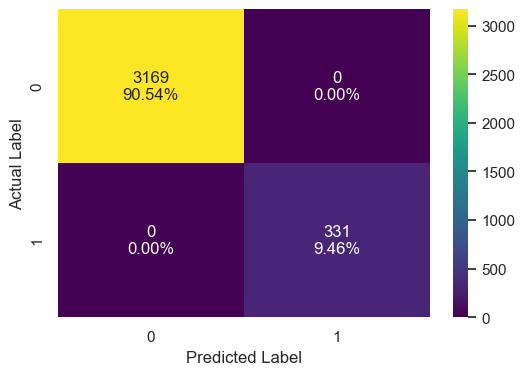

In [116]:
# Displaying the Confusion Matrix for Full Tree (Training Subset):

print('\033[1m' , '\033[92m' , 'Confusion Matrix (Training Subset – Full Tree):')      
confusion_matrix_sklearn(tree_model_full , X_train , y_train)

In [117]:
# Displaying the Performance Metrics for Full Tree (Training Subset):

train_metrics_full = model_performance_classification_sklearn(tree_model_full , X_train , y_train)

print('\033[1m' , '\033[92m' , 'Training Performance Metrics (Full Tree):' , '\033[0m', '\033[92m', sep='')
print(train_metrics_full.to_string(index=False))

Training Performance Metrics (Full Tree):
 Accuracy  Recall  Precision  F1 Score
      1.0     1.0        1.0       1.0


<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.3 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Full Tree has continued to growth till all Leaf Nodes become Pure (Homogeneous). Indeicated by FP = FN = 0 (Each Sample is correctly classified in the Training Subset with Zero Error).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Full Tree is performing perfect on Training Subset but it will have poor performance on Testing Subset and accordingly, on Unseen Data (Model is not Generalized due to **Overfitting**).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Perfect Values for all Performance Metrics have been achieved which is not our target in building a Generalized Model!

  Confusion Matrix (Testing Subset – Full Tree):


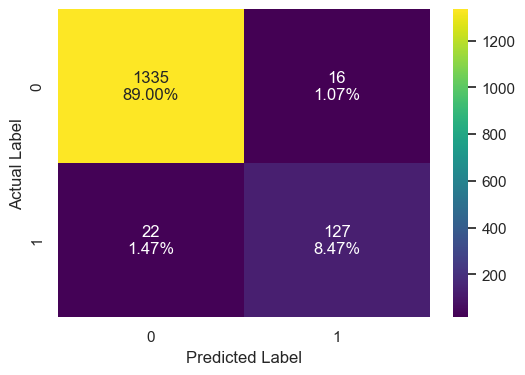

In [118]:
# Displaying the Confusion Matrix for Full Tree (Testing Subset):

print('\033[1m' , '\033[92m' , 'Confusion Matrix (Testing Subset – Full Tree):')      
confusion_matrix_sklearn(tree_model_full , X_test , y_test)

In [119]:
# Displaying the Performance Metrics for Full Tree (Testing Subset):

test_metrics_full = model_performance_classification_sklearn(tree_model_full , X_test , y_test)

print('\033[1m' , '\033[92m' , 'Testing Performance Metrics (Full Tree):' , '\033[0m', '\033[92m', sep='')
print(test_metrics_full.to_string(index=False))

Testing Performance Metrics (Full Tree):
 Accuracy   Recall  Precision  F1 Score
 0.974667 0.852349   0.888112  0.869863


In [120]:
# Reporting the TN, FP, FN, and TP For Full Tree on Testing Subset:

cm_full = confusion_matrix_entries(tree_model_full , X_test , y_test)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.4 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Usually, Full Tree Model leads to low value of Recall (Non-Generalized Model)!
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** In our Model, Full Tree has a high performance on Testing Subset which is indicated by the high value of Recall (0.85).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** The Full Tree Model is doing Wrong Predictions as follow: 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** **FN = 22 (1.47%)** Predicting a Customer will reject the Personal Loan but in fact he will accept it.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** **FP = 16 (1.07%)** Predicting a Customer will accept the Personal Loan but in fact he will reject it.

In [121]:
'''
Lets define then display the Independent Features:
Note: One-Hot Encoding will hide the first Category in Region Column (Central California).
'''

indep_columns = X_train.columns.to_list()
print(indep_columns)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Region_Jefferson', 'Region_North California', 'Region_Silicon Valley', 'Region_South California', 'Region_West California']


  Full Tree:


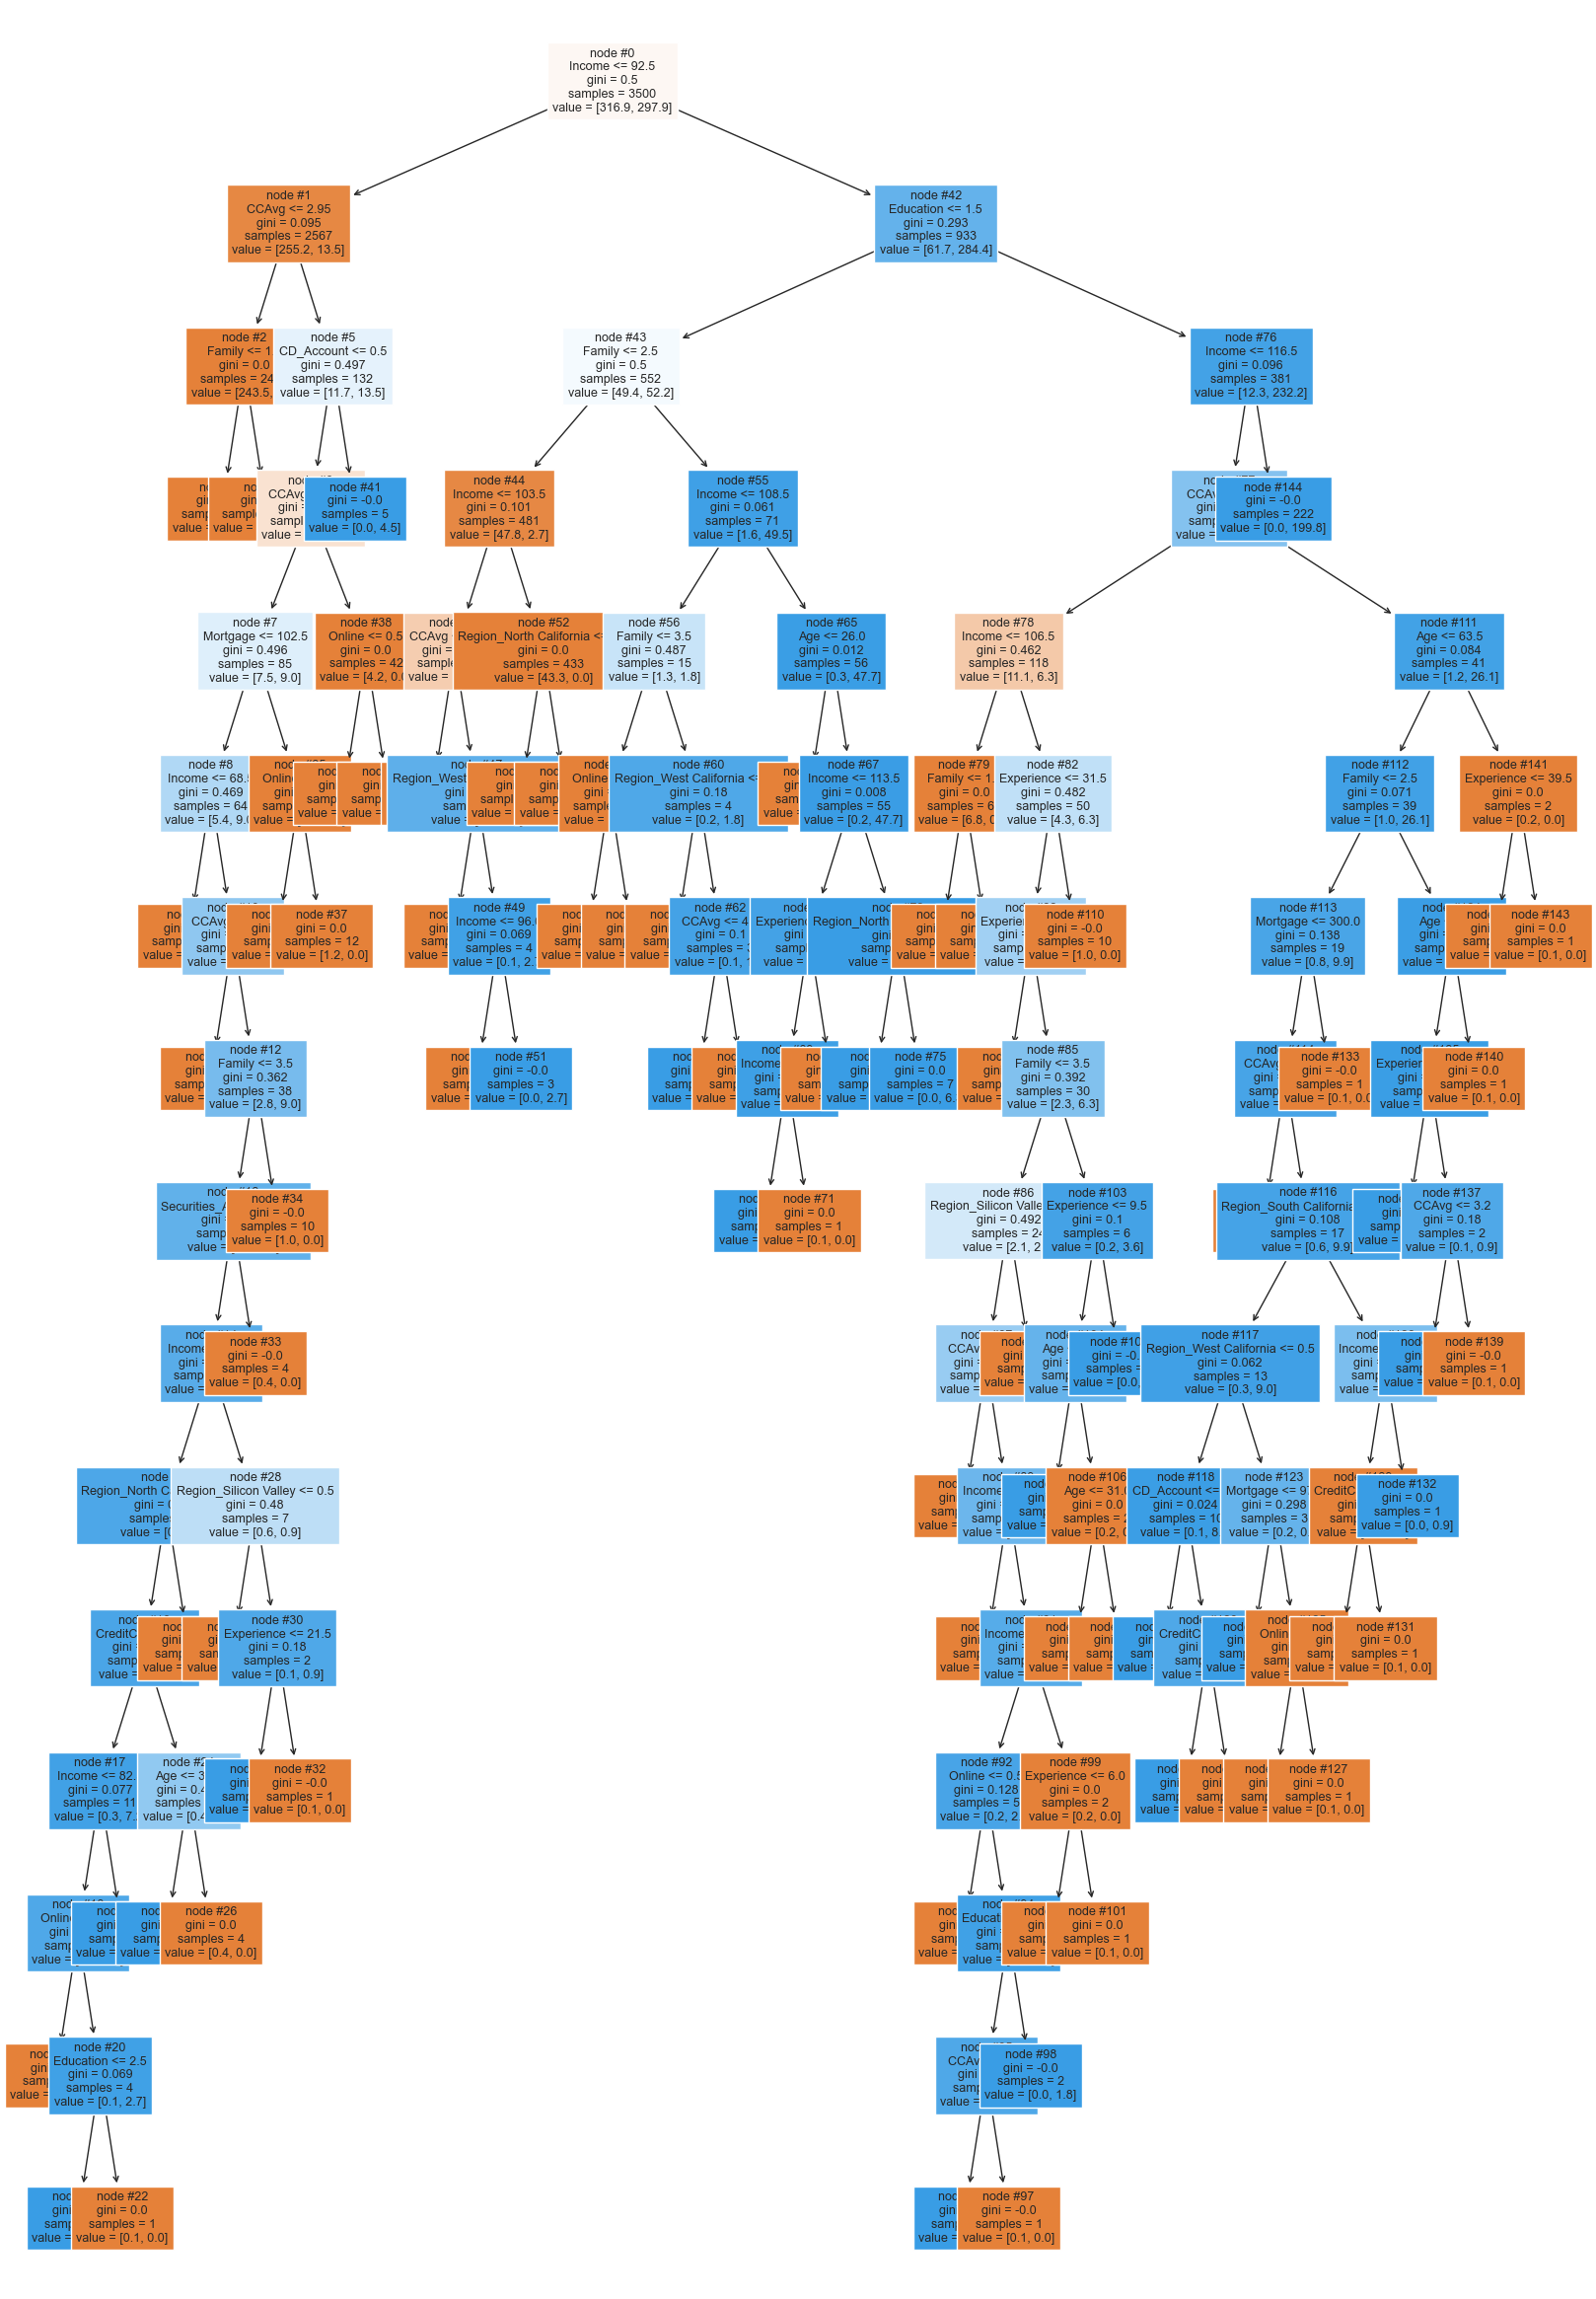

In [122]:
# Lets visualizing the Full Tree:

print('\033[1m' , '\033[92m' , 'Full Tree:') 
plt.figure(figsize=(20 , 30))
tree.plot_tree(tree_model_full , feature_names=indep_columns , filled=True , fontsize=9 , node_ids=True , class_names=None)
plt.show()

<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.5 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Although of high Recall Value, Full Tree still complex and difficult to interpret with arround a Depth of 15!
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Furthermore, it's well observed that all Leaf Nodes have a Zero Gini and very few Samples per each Leaf which is not useful when implementing the Model on Unseen Data from the real world.

In [123]:
# Lets print the Text Report showing the rules of the Full Tree:

print('\033[1m' , '\033[92m' , 'Decision Rules Report (Full Tree):' , '\033[0m', '\033[92m', sep='')
print('\033[0m' , '\033[92m' , tree.export_text(tree_model_full , feature_names=indep_columns , show_weights=True))

Decision Rules Report (Full Tree):
  |--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- Family <= 1.50
|   |   |   |--- weights: [65.10, 0.00] class: 0
|   |   |--- Family >  1.50
|   |   |   |--- weights: [178.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [1.10, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- Region_North California <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |  

In [124]:
'''
Lets display the importance of features in the Full Tree Model:
Note: The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance:
'''

print('\033[1m' , '\033[92m' , 'Importance Features Report (Full Tree):' , '\033[0m', '\033[92m', sep='')
print('\033[0m' , '\033[92m' , pd.DataFrame(tree_model_full.feature_importances_ , columns = ["Imp"] , index = X_train.columns).sort_values(by = 'Imp' , ascending = False))

Importance Features Report (Full Tree):
                                Imp
Income                   0.633127
Family                   0.148646
CCAvg                    0.090096
Education                0.089490
CD_Account               0.007748
Experience               0.007087
Mortgage                 0.006291
Age                      0.005352
Region_Silicon Valley    0.003736
Region_West California   0.002856
Securities_Account       0.001879
Online                   0.001715
CreditCard               0.001103
Region_North California  0.000546
Region_South California  0.000328
Region_Jefferson         0.000000


Importance Features Plot (Full Tree):


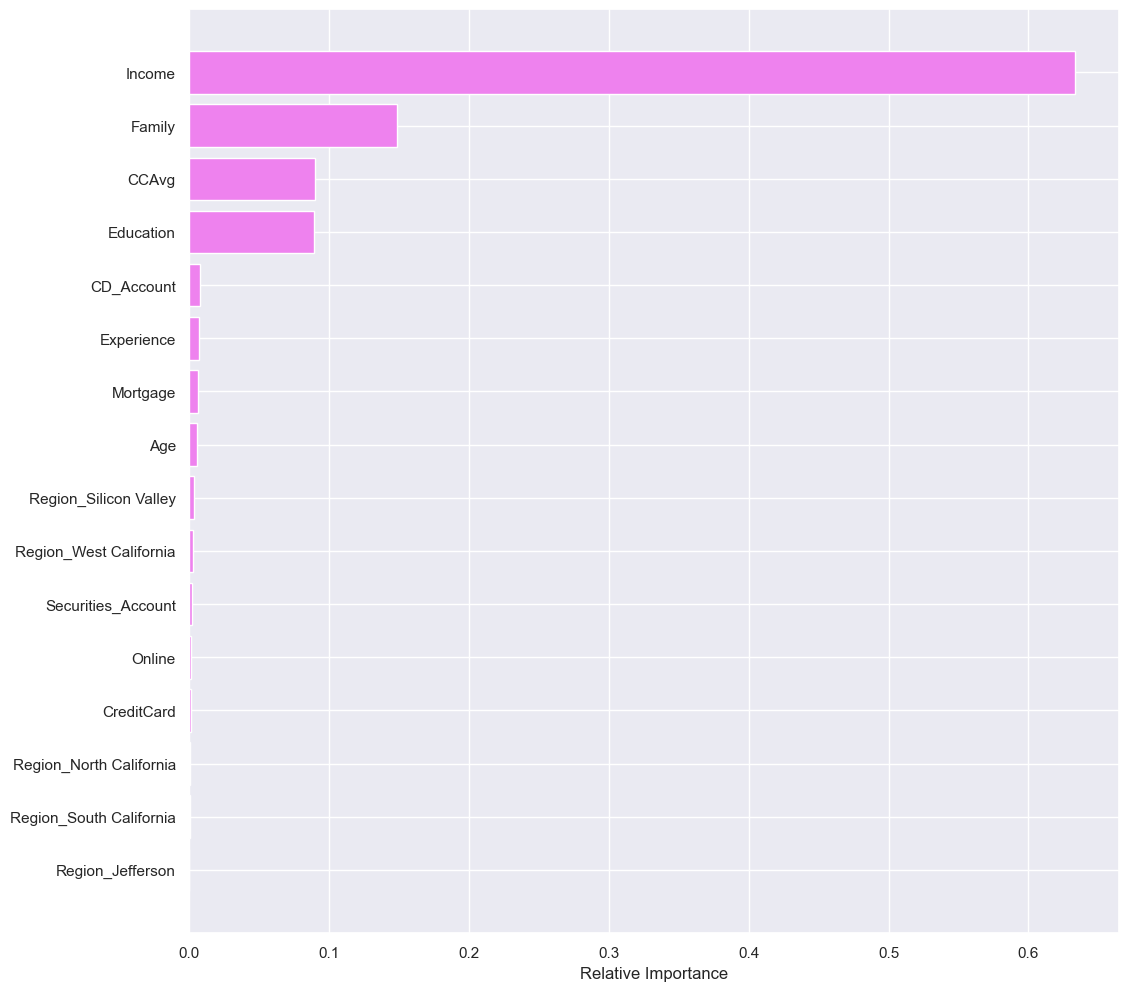

In [125]:
# Lets plot the importance of features in the Full Tree Model:

importances = tree_model_full.feature_importances_
indices = np.argsort(importances)

print('\033[1m' , '\033[92m' , 'Importance Features Plot (Full Tree):' , '\033[0m', '\033[92m', sep='')
plt.figure(figsize=(12,12))
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [indep_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.6 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** As noticed in the Features Importance Plot, Income Feature is the most Important when predicting the Acceptance of a Personal Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** While Family, CCAvg, and Education features have convergent imprtances, some features like CreditCard, Region_North California, Region_North California, Region_South California, and Region_Jefferson showing quite negligible importances.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Region Jefferson showing a Zero Impact on Predicting.

<left> <font size=5 style='font-family:Courier New' color='Red' > **Pre-Pruning (Early Stopping):** 
<br> <left> <font size=4 style='font-family:Courier New' color='red'> In order to reduce the noticeable Overfitting in the Full Tree Model, we will use the **GridSearch** to tune the Hyperparameters:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** We will keep using the **class_weight={0: 0.10 , 1:0.90}** to overcome the Imbalance Issue.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Since the Depth of Full Tree is around 15, we will use the Hyperparameter **'max_depth': [5, 8, 12, None]**, where None will take the value of Max Depth as calculated in the Full Tree Model.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** We will use the Hyperparameter **'criterion': ['entropy', 'gini']** to decide the importance of each feature.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** We will use the Hyperparameter **'splitter': ['best', 'random']** to decide which feature to use.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** We will use the Hyperparameter **'min_impurity_decrease' : [0.001 , 0.01,0.1]**.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** We will use the **Recall Score** as it's our most important Metric in Reducing the FN.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** We will use the Cross Validation Parameter **cv = 5**.

In [126]:
'''
Now, lets build the Decision Tree Model (Pre-Pruned) using the best combination of Hyperparameters:
Note: Due to the Imbalance in the Original Dataset and consequently in the Training Subset, we will use the 
Hyperparameter 'Class Weight' with revised ratios 0.10 to 0.90.
'''

tree_model_pre = DecisionTreeClassifier(class_weight={0: 0.10 , 1:0.90} , random_state=1)
parameters = {'max_depth': [3 , 6 , 9 , 12 , None] , 
              'criterion': ['entropy', 'gini'] ,
              'splitter': ['best', 'random'] ,
              'min_impurity_decrease' : [0.001 , 0.01,0.1]}
 

scorer = metrics.make_scorer(recall_score)

grid_obj = GridSearchCV(tree_model_pre , parameters , scoring=scorer , cv=5)
grid_obj = grid_obj.fit(X_train , y_train)

tree_model_pre = grid_obj.best_estimator_

tree_model_pre.fit(X_train , y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=3, min_impurity_decrease=0.01, random_state=1)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.7 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** As noticed, The best Combination of feeded Hyperparameters results in a Maximum Depth equals to 3 while it was arround 15 in the Full Tree Model.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Also, Entropy Criterion, Random Splitter, and 0.01 Impurity have been selected.

  Confusion Matrix (Training Subset – Pre-Pruned Tree):


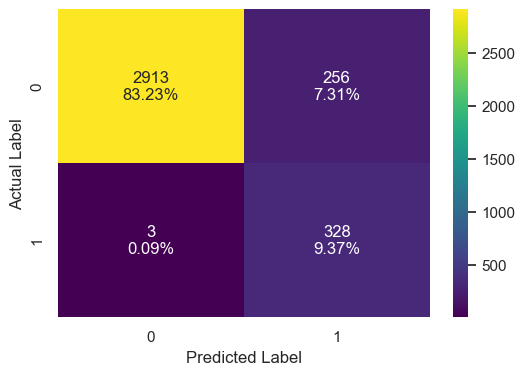

In [127]:
# Displaying the Confusion Matrix for Pre-Pruned Tree (Training Subset):

print('\033[1m' , '\033[92m' , 'Confusion Matrix (Training Subset – Pre-Pruned Tree):')      
confusion_matrix_sklearn(tree_model_pre , X_train , y_train)

In [128]:
# Displaying the Performance Metrics for Pre-Pruned Tree (Training Subset):

train_metrics_pre = model_performance_classification_sklearn(tree_model_pre , X_train , y_train)

print('\033[1m' , '\033[92m' , 'Training Performance Metrics (Pre-Pruned Tree):' , '\033[0m', '\033[92m', sep='')
print(train_metrics_pre.to_string(index=False))

Training Performance Metrics (Pre-Pruned Tree):
 Accuracy   Recall  Precision  F1 Score
    0.926 0.990937   0.561644   0.71694


<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.8 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Recall has decreased from 1.0 in Full Tree Model to 0.99 in Pre-Pruned Tree Model.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** While a small drop is noticed in Accuracy (1.0 to 0.926), a Huge drop has occured in both Precision (1.0 to 0.56) and F1 Score (0.72) Metrics. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Although the Recall Metirc has decreased, our Model has been improved and could be generalized to work better on Unseen Data.

  Confusion Matrix (Testing Subset – Pre-Pruned Tree):


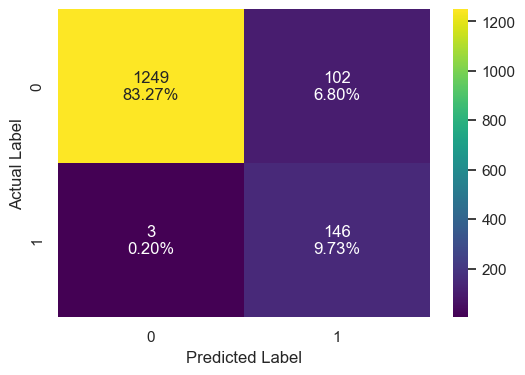

In [129]:
# Displaying the Confusion Matrix for Pre-Pruned Tree (Testing Subset):

print('\033[1m' , '\033[92m' , 'Confusion Matrix (Testing Subset – Pre-Pruned Tree):')      
confusion_matrix_sklearn(tree_model_pre , X_test , y_test)

In [130]:
# Displaying the Performance Metrics for Pre-Pruned Tree (Testing Subset):

test_metrics_pre = model_performance_classification_sklearn(tree_model_pre , X_test , y_test)

print('\033[1m' , '\033[92m' , 'Testing Performance Metrics (Pre-Pruned Tree):' , '\033[0m', '\033[92m', sep='')
print(test_metrics_pre.to_string(index=False))

Testing Performance Metrics (Pre-Pruned Tree):
 Accuracy   Recall  Precision  F1 Score
     0.93 0.979866    0.58871  0.735516


In [131]:
# Reporting the TN, FP, FN, and TP For Pre-Pruned Tree on Testing Subset:

cm_pre = confusion_matrix_entries(tree_model_pre , X_test , y_test)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.9 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Usually, Pre-Pruned Tree Model leads to higher value of Recall than Full Tree Model!
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** In our Model, Pre-Pruned Tree has a high performance on Testing Subset which is indicated by the high value of Recall (0.98).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** The Pre-Pruned Tree Model is doing Wrong Predictions as follow: 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** **FN = 3 (0.2%)** Predicting a Customer will reject the Personal Loan but in fact he will accept it.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** **FP = 102 (6.8%)** Predicting a Customer will accept the Personal Loan but in fact he will reject it.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Although there is a noticeable increasing in FP (16 to 102), our mail target of reducing FN (22 to 3) has been achieved.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** It's fair to say that our new model using the Pre-Pruning is doing better (on Testing Subset and consequently on Unseen Data) than the previous Full Tree Model.

  Pre-Pruned Tree:


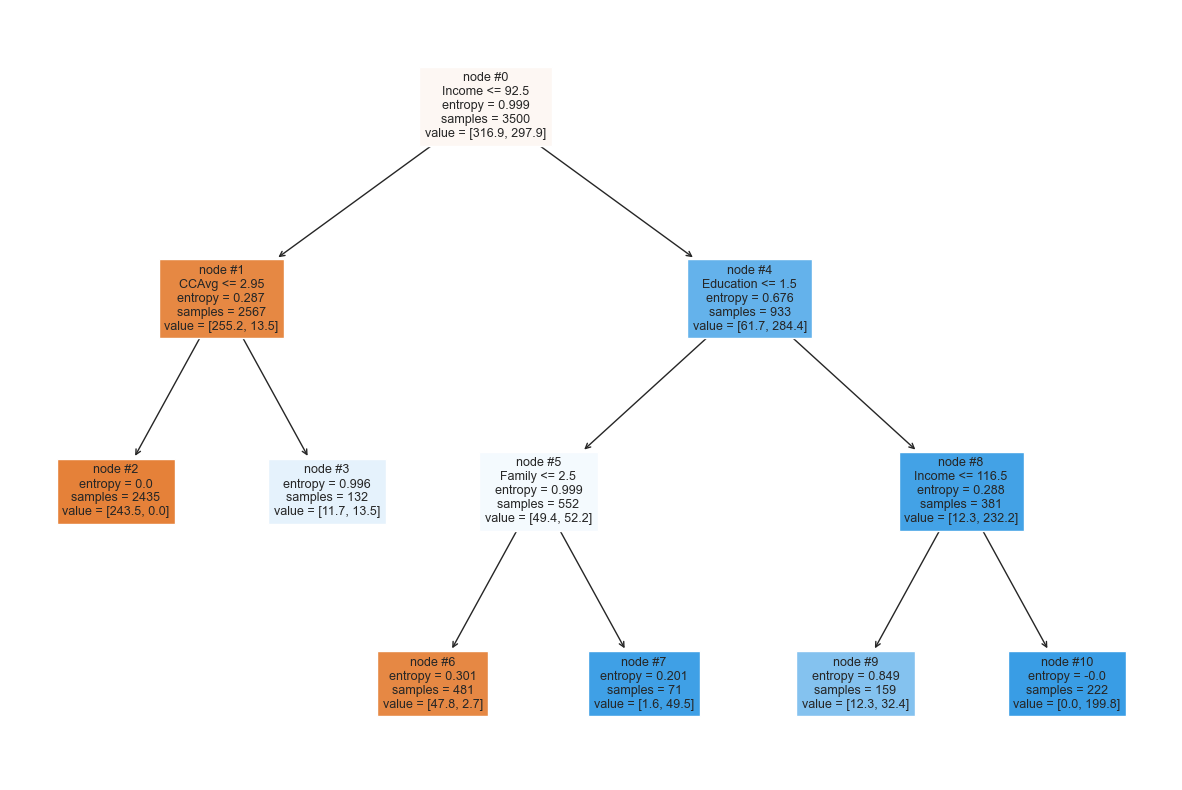

In [133]:
# Lets visualizing the Pre-Pruned Tree:

print('\033[1m' , '\033[92m' , 'Pre-Pruned Tree:')      
plt.figure(figsize=(15 , 10))
tree.plot_tree(tree_model_pre , feature_names=indep_columns , filled=True , fontsize=9 , node_ids=True , class_names=None)
plt.show()

<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.10 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Pre-Pruned Tree is less complex the Full Tree and easy to interpret with arround a Depth of 3!
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Furthermore, it's well observed that the vast majority of Leaf Nodes have a higher values of Entropy (Except Node 2 with Zero Value) and very large Samples per each Leaf which is useful when implementing the Model on Unseen Data from the real world.

In [134]:
# Lets print the Text Report showing the rules of the Pre-Pruned Tree:

print('\033[1m' , '\033[92m' , 'Decision Rules Report (Pre-Pruned Tree):' , '\033[0m', '\033[92m', sep='')
print('\033[0m' , '\033[92m' , tree.export_text(tree_model_pre , feature_names=indep_columns , show_weights=True))

Decision Rules Report (Pre-Pruned Tree):
  |--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [11.70, 13.50] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [47.80, 2.70] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.60, 49.50] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [12.30, 32.40] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 199.80] class: 1



In [135]:
'''
Lets display the importance of features in the Pre-Pruned Tree Model:
Note: The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance:
'''

print('\033[1m' , '\033[92m' , 'Importance Features Report (Pre-Pruned Tree):' , '\033[0m', '\033[92m', sep='')
print('\033[0m' , '\033[92m' , pd.DataFrame(tree_model_pre.feature_importances_ , columns = ["Imp"] , index = X_train.columns).sort_values(by = 'Imp' , ascending = False))

Importance Features Report (Pre-Pruned Tree):
                                Imp
Income                   0.637971
Family                   0.144676
Education                0.118234
CCAvg                    0.099120
Age                      0.000000
Experience               0.000000
Mortgage                 0.000000
Securities_Account       0.000000
CD_Account               0.000000
Online                   0.000000
CreditCard               0.000000
Region_Jefferson         0.000000
Region_North California  0.000000
Region_Silicon Valley    0.000000
Region_South California  0.000000
Region_West California   0.000000


Importance Features Plot (Pre-Pruned Tree):


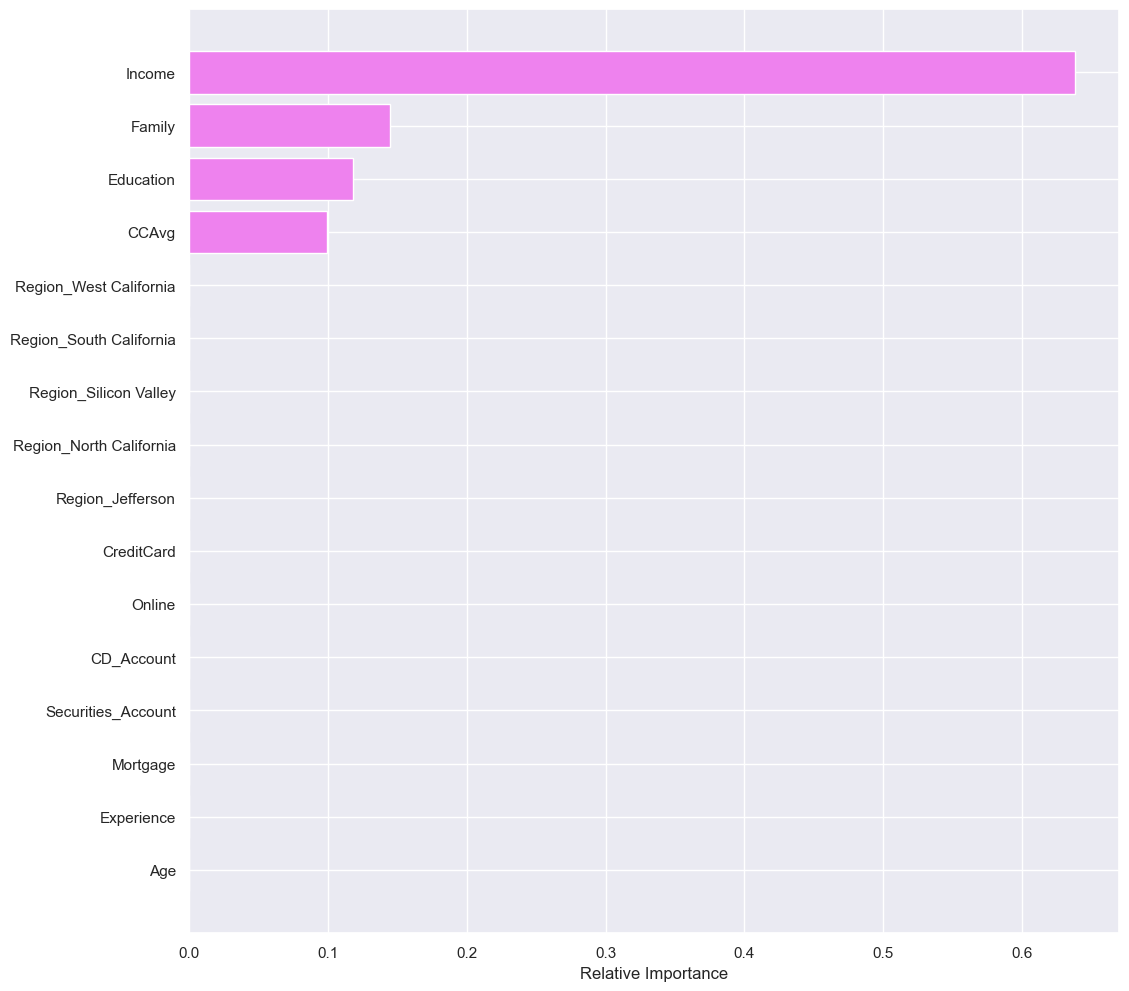

In [136]:
# Lets plot the importance of features in the Pre-Pruned Tree Model:

importances = tree_model_pre.feature_importances_
indices = np.argsort(importances)

print('\033[1m' , '\033[92m' , 'Importance Features Plot (Pre-Pruned Tree):' , '\033[0m', '\033[92m', sep='')
plt.figure(figsize=(12,12))
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [indep_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.11 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** As noticed in the Features Importance Plot, Income Feature still has the most Important when predicting the Acceptance of a Personal Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** While Family, CCAvg, and Education features have convergent imprtances, Education Feature has now a bigger Impact than Family.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Although Jefferson Region is still showing a Zero Impact on Predicting, all the remaining Feature Importances changed to Zero!

<left> <font size=5 style='font-family:Courier New' color='darkgreen'> **10.12 Interpretations (Pre-Pruning Decision Rules):**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** If a Customer has an Income less than or equal to 92.5 Thousand USD/Year and an Average Spending on Credit Card greater than 2.95 Thousand USD/Month, then it will be highly marked as promised Customer to accept the Personal Loan (Class 1).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** If a Customer has an Income greater than 92.5 Thousand USD/Year, Education Level less than or equal to 1.5 (Logically, Consider it as less than or equal to 1 since no Fractions in Education Level), and a Family Size greater than 2.5 Members (Logically, consider it as greater than or equal to 3 Members since no fractions in Family Size!), then it will be highly marked as promised Customer to accept the Personal Loan (Class 1).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Finally, if a Customer has an Income greater than 92.5 Thousand USD/Year, Education Level greater than 1.5 (Logically, Consider it as greater than or equal to 2 since no Fractions in Education Level), and again an Income greater than 116.5 Thousand USD/Year, then it will be highly marked as promised Customer to accept the Personal Loan (Class 1).

<left> <font size=5 style='font-family:Courier New' color='Red' > **Post-Pruning:** 
<br> <left> <font size=4 style='font-family:Courier New' color='red'> In order to reduce the noticable Overfitting in the Full Tree Model, we will use the Cost Compexity Parameter **ccp_alpha**:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** We will keep using the **class_weight={0: 0.10 , 1:0.90}** to overcome the Imbalance Issue.

In [137]:
# Lets start by finding the ccp_alphas vs impurities for each possible subtree:

tree_model_post = DecisionTreeClassifier(class_weight={0:0.15 , 1:0.85} , random_state=1)
path = tree_model_post.cost_complexity_pruning_path(X_train , y_train)
ccp_alphas , impurities = path.ccp_alphas , path.impurities

pd.DataFrame(path).style.set_properties(**{'color': 'green'})

,ccp_alphas,impurities
0,0.000000,-0.000000
1,0.000000,-0.000000
2,0.000000,-0.000000
3,0.000000,-0.000000
4,0.000000,-0.000000
5,0.000000,-0.000000
6,0.000000,-0.000000
7,0.000000,-0.000000
8,0.000000,-0.000000
9,0.000000,-0.000000


<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.13 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Starting from First Row, it represents the Full Tree where ccp_alphas and impurities are the smallest.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Ending at Last Row, it represents the Root Node where ccp_alphas and impurities are the largest.

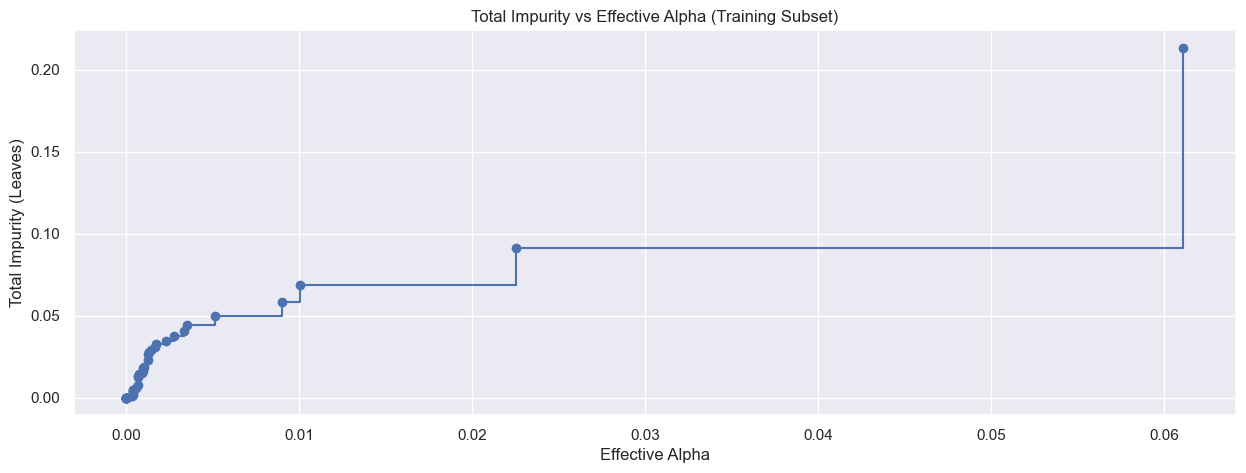

In [138]:
# Lets plot the Effective Alpha vs Total Impurity:

fig , ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1] , impurities[:-1] , marker='o' , drawstyle='steps-post')
ax.set_xlabel('Effective Alpha')
ax.set_ylabel('Total Impurity (Leaves)')
ax.set_title('Total Impurity vs Effective Alpha (Training Subset)')
plt.show()

In [139]:
# Lets train the Post-Pruned Tree using the Effective Alphas:

clfs = []
for ccp_alpha in ccp_alphas:
    tree_model_post = DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85} , random_state=1, ccp_alpha=ccp_alpha)
    tree_model_post.fit(X_train, y_train)
    clfs.append(tree_model_post)
print('\033[0m' , '\033[92m' , 'Number of Nodes in the Last Decession Tree (Root Node) is: {} with ccp_alpha: {}'
      .format(clfs[-1].tree_.node_count , ccp_alphas[-1]))

  Number of Nodes in the Last Decession Tree (Root Node) is: 1 with ccp_alpha: 0.25379571489481006


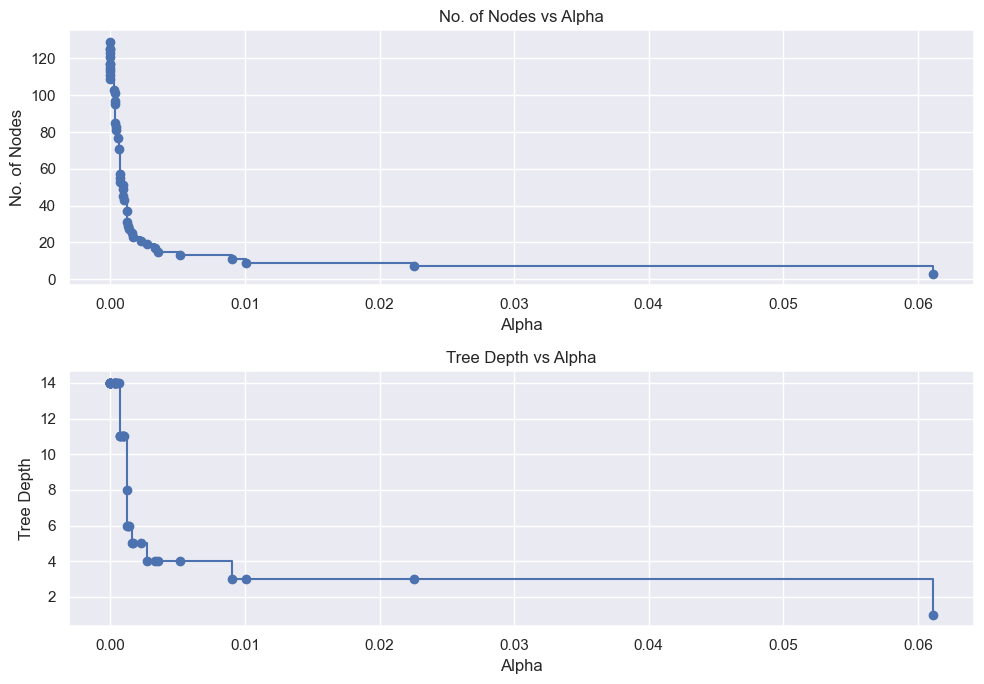

In [140]:
'''
Lets plot the No. of Nodes vs Alpha & Tree Depth vs Alpha:
Note: Last Row will be excluded as it represents the Root Node.
'''

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [tree_model_post.tree_.node_count for tree_model_post in clfs]
depth = [tree_model_post.tree_.max_depth for tree_model_post in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("No. of Nodes")
ax[0].set_title("No. of Nodes vs Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Tree Depth")
ax[1].set_title("Tree Depth vs Alpha")
fig.tight_layout()

<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.14 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** It's well observed that Alpha increases as No. of Nodes decrease. Decreasing of No. of Nodes means trimming of Nodes which in tern continues till having a Root Node only with the maximum possible value of Alpha.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Similarly, Trimminh of Nodes decreases the Depth of the Tree. The highest possible value of Alpha indicates a Tree with depth equals to 1 (Root Node). 

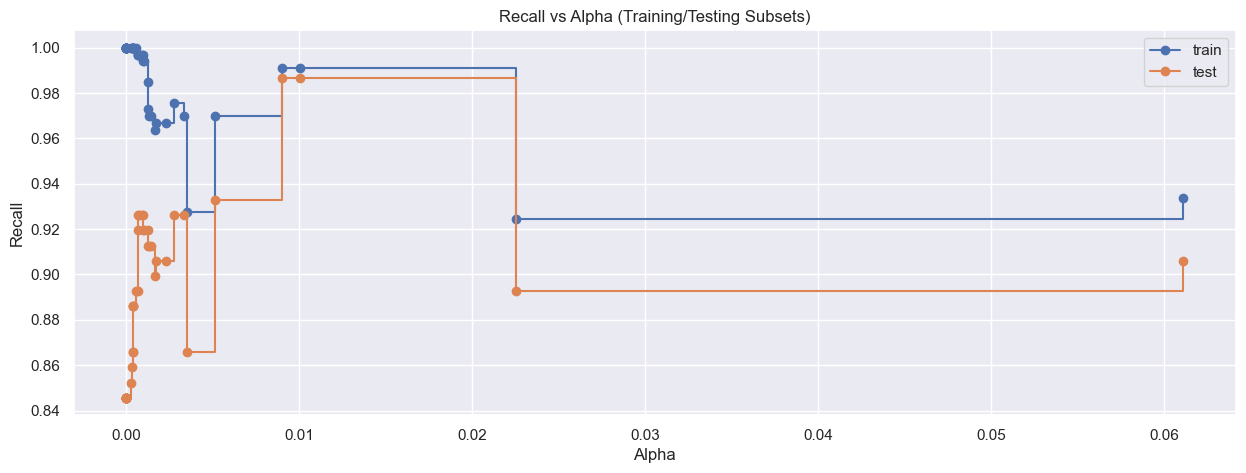

In [141]:
# Lets plot the Recall vs Alpha for both Training and Testing Subsets:

recall_train = []
for tree_model_post in clfs:
    pred_train = tree_model_post.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)


recall_test = []
for tree_model_post in clfs:
    pred_test = tree_model_post.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

train_scores = [tree_model_post.score(X_train, y_train) for tree_model_post in clfs]
test_scores = [tree_model_post.score(X_test, y_test) for tree_model_post in clfs]


fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs Alpha (Training/Testing Subsets)")
ax.plot(ccp_alphas , recall_train , marker="o" , label="train" , 
        drawstyle="steps-post")
ax.plot(ccp_alphas , recall_test , marker="o" , label="test" , 
        drawstyle="steps-post")
ax.legend()
plt.show()    

<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.15 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Investigating the Training Curve, The Highest Values of Recall occurs when Alpha has the smallest Value, then Alpha starts to Decrease then increase and eventually decrease. The interpretation of this Phenomenon is:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** The Model has started with a Full Tree Model where the Recall Value on Training Subset equals to 1.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** The Errors at this Point (Recall = 1) is Zero and consequently FP=FN=0.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** The Performance at this Point (Recall = 1) is perfect on Training Subset but it will be poor on Testing Subset (Alpha = 0.842).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** The Curve starts to decrease while Alpha Increases. This happened due to Trimming has begun to take place.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Between 0.009 and 0.023 of Alphas, the Curve has the best steady performance. This indicates that there is a chance for the model to perform better on Testing Subset and the Trimming is good enough in this interval.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** After Alpha greater than 0.023, the Curve start to decrease again. This indicates that we are moving away from the best Model and the Trimming has started to generate unwanted results.
    
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Investigating the Testing Curve, The lowest Values of Recall occurs when Alpha has the smallest Value, then Alpha starts to increase then decrease then increase and eventually decrease. The interpretation of this Phenomenon is:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** The Model has started with a Full Tree Model where the Recall Value on Testing Subset equals to 0.842.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** The Errors at this Point (Recall = 0.842) is high.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** The Performance at this Point (Recall = 0.842) is poor on Testing Subset.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** The Curve starts to increase while Alpha Increases. This happened due to Trimming has begun to take place.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Between 0.009 and 0.023 of Alphas, the Curve has the best steady performance. This indicates that there is a chance for the model to perform better on both Training and Testing Subsets and the Trimming is good enough in this interval.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** After Alpha greater than 0.023, the Curve starts to decrease again. This indicates that we are moving away from the best Model and the Trimming has started to generate unwanted results.

In [142]:
# Finding the best Recall on both Training and Testing Subsets

index_best_model = np.argmax(recall_test)
tree_model_post = clfs[index_best_model]
print('\033[1m' , '\033[92m' , 'Best Value of Alpha for both Training and Testing Subsets is: \n' , '\033[0m' , '\033[92m' , tree_model_post , sep = '')

Best Value of Alpha for both Training and Testing Subsets is: 
DecisionTreeClassifier(ccp_alpha=0.00900843430150809,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.16 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** As expected, the best value of Recall that performs best on both Training and Testing Subsets is 0.009 which falls in the previously expected interval 0.008 to 0.023!

  Confusion Matrix (Training Subset – Post-Pruned Tree):


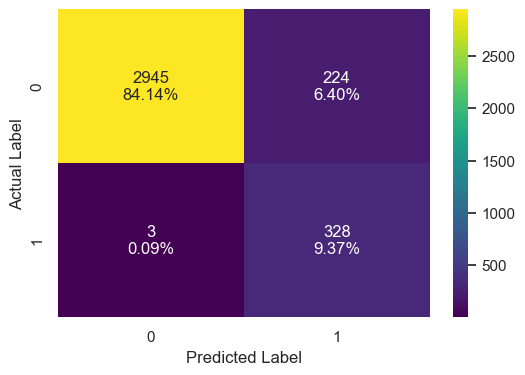

In [143]:
# Displaying the Confusion Matrix for Post-Pruned Tree (Training Subset):

print('\033[1m' , '\033[92m' , 'Confusion Matrix (Training Subset – Post-Pruned Tree):')      
confusion_matrix_sklearn(tree_model_post , X_train , y_train)

In [144]:
# Displaying the Performance Metrics for Post-Pruned Tree (Training Subset):

train_metrics_post = model_performance_classification_sklearn(tree_model_post , X_train , y_train)

print('\033[1m' , '\033[92m' , 'Training Performance Metrics (Post-Pruned Tree):' , '\033[0m', '\033[92m', sep='')
print(train_metrics_post.to_string(index=False))

Training Performance Metrics (Post-Pruned Tree):
 Accuracy   Recall  Precision  F1 Score
 0.935143 0.990937   0.594203  0.742922


<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.17 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Recall has the exact same value of Pre-Pruned Tree which is 0.990937.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Accuracy has been improved from 0.926 in Pre-Pruned Tree Model to 0.935143 in Post-Pruned Tree Model. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Precision has been improved from 0.561644 in Pre-Pruned Tree Model to 0.594203 in Post-Pruned Tree Model.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** F1 Score has been improved from 0.71694 in Pre-Pruned Tree Model to 0.742922 in Post-Pruned Tree Model. 

  Confusion Matrix (Testing Subset – Post-Pruned Tree):


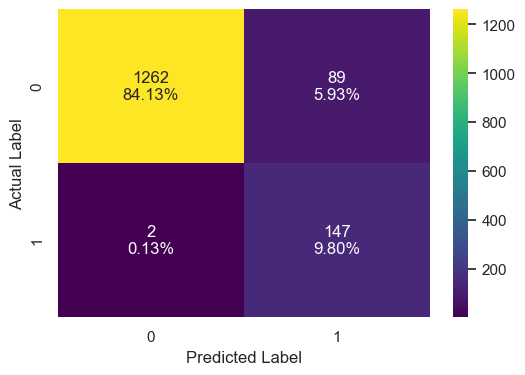

In [145]:
# Displaying the Confusion Matrix for Post-Pruned Tree (Testing Subset):

print('\033[1m' , '\033[92m' , 'Confusion Matrix (Testing Subset – Post-Pruned Tree):')      
confusion_matrix_sklearn(tree_model_post , X_test , y_test)

In [146]:
# Displaying the Performance Metrics for Post-Pruned Tree (Testing Subset):

test_metrics_post = model_performance_classification_sklearn(tree_model_post , X_test , y_test)

print('\033[1m' , '\033[92m' , 'Testing Performance Metrics (Post-Pruned Tree):' , '\033[0m', '\033[92m', sep='')
print(test_metrics_post.to_string(index=False))

Testing Performance Metrics (Post-Pruned Tree):
 Accuracy   Recall  Precision  F1 Score
 0.939333 0.986577   0.622881  0.763636


In [147]:
# Reporting the TN, FP, FN, and TP For Post-Pruned Tree on Testing Subset:

cm_post = confusion_matrix_entries(tree_model_post , X_test , y_test)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.18 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Recall has been improved from 0.93 in Pre-Pruned Tree Model to 0.939333 in Post-Pruned Tree Model. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Accuracy has been improved from 0.979866 in Pre-Pruned Tree Model to 0.986577 in Post-Pruned Tree Model. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Precision has been improved from 0.58871 in Pre-Pruned Tree Model to 0.622881 in Post-Pruned Tree Model.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** F1 Score has been improved from 0.735516 in Pre-Pruned Tree Model to 0.763636 in Post-Pruned Tree Model. 

<left> <font size=5 style='font-family:Courier New' color='darkgreen'> **10.19 Important Notice:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Although the Post-Pruned Tree has a slight better performance on Testing Subset than Pre-Pruned Tree in term of Recall, it also has a better performance when taking all other metrics into consideration.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** AllLife Bank can choose to work on the Post-Pruned Model as he has an extra advantage by reducing the FP in addition to the main purpose of reducing the FN.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** It's important to say that although the reduction in FN was really small (3 to 2), we got an addition reduction in FP (102 to 89).

  Post-Pruned Tree:


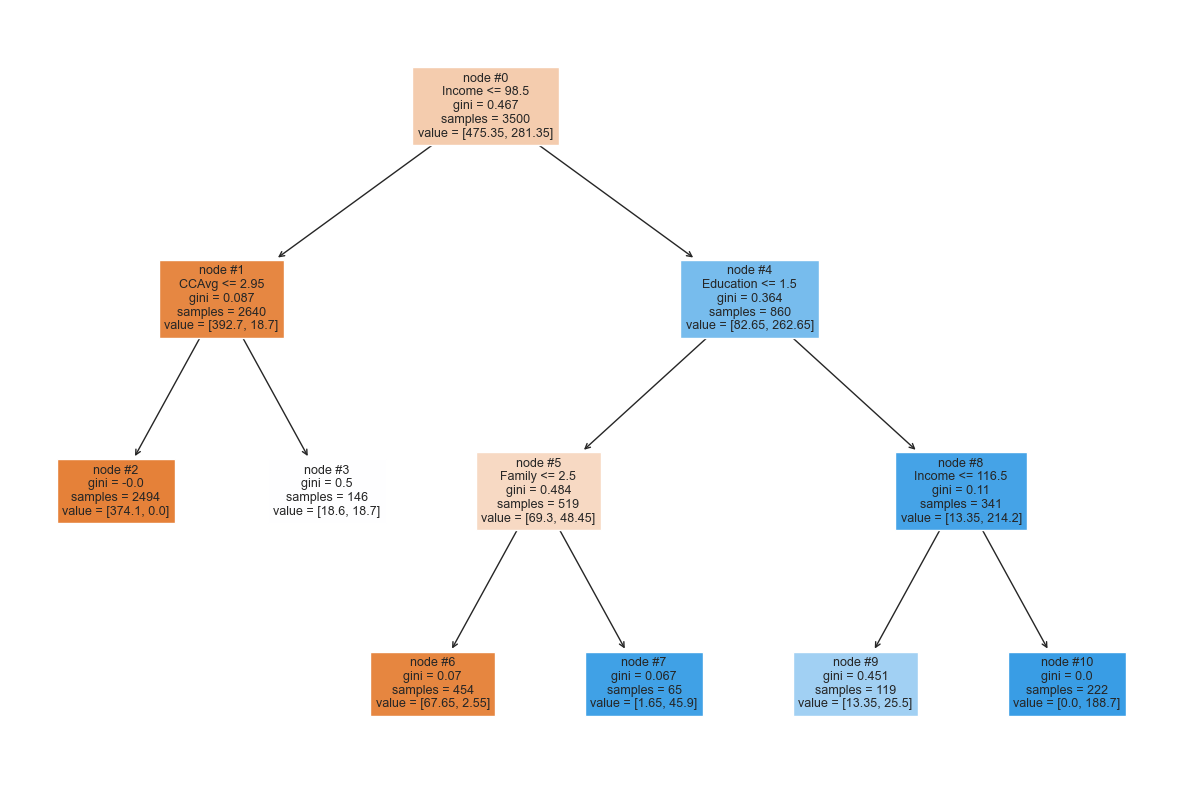

In [149]:
# Lets visualizing the Post-Pruned Tree:

print('\033[1m' , '\033[92m' , 'Post-Pruned Tree:') 
plt.figure(figsize=(15 , 10))
tree.plot_tree(tree_model_post , feature_names=indep_columns , filled=True , fontsize=9 , node_ids=True , class_names=None)
plt.show()

<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.20 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Post-Pruned Tree is the same as Pre-Pruned Tree in term of Depth (**Depth = 3**).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** The Criterion has been changed from **Entropy** in Pre-Pruned Tree to **Gini** in Post-Pruned Tree.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Although the same Decision Rules in both Pre-Pruned and Post-Pruned Tree, the first splitting has been changed from **Income <=92.5** in Pre-Pruned Tree to **Income <=98.5** in Post-Pruned Tree.

In [150]:
# Lets print the Text Report showing the rules of the Post-Pruned Tree:

print('\033[1m' , '\033[92m' , 'Decision Rules Report (Post-Pruned Tree):' , '\033[0m', '\033[92m', sep='')
print('\033[0m' , '\033[92m' , tree.export_text(tree_model_post , feature_names=indep_columns , show_weights=True))

Decision Rules Report (Post-Pruned Tree):
  |--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.35, 25.50] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 188.70] class: 1



In [151]:
'''
Lets display the importance of features in the Post-Pruned Tree Model:
Note: The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance:
'''

print('\033[1m' , '\033[92m' , 'Importance Features Report (Post-Pruned Tree):' , '\033[0m', '\033[92m', sep='')
print('\033[0m' , '\033[92m' , pd.DataFrame(tree_model_post.feature_importances_ , columns = ["Imp"] , index = X_train.columns).sort_values(by = 'Imp' , ascending = False))

Importance Features Report (Post-Pruned Tree):
                                Imp
Income                   0.645704
Family                   0.158240
Education                0.140915
CCAvg                    0.055142
Age                      0.000000
Experience               0.000000
Mortgage                 0.000000
Securities_Account       0.000000
CD_Account               0.000000
Online                   0.000000
CreditCard               0.000000
Region_Jefferson         0.000000
Region_North California  0.000000
Region_Silicon Valley    0.000000
Region_South California  0.000000
Region_West California   0.000000


Importance Features Plot (Post-Pruned Tree):


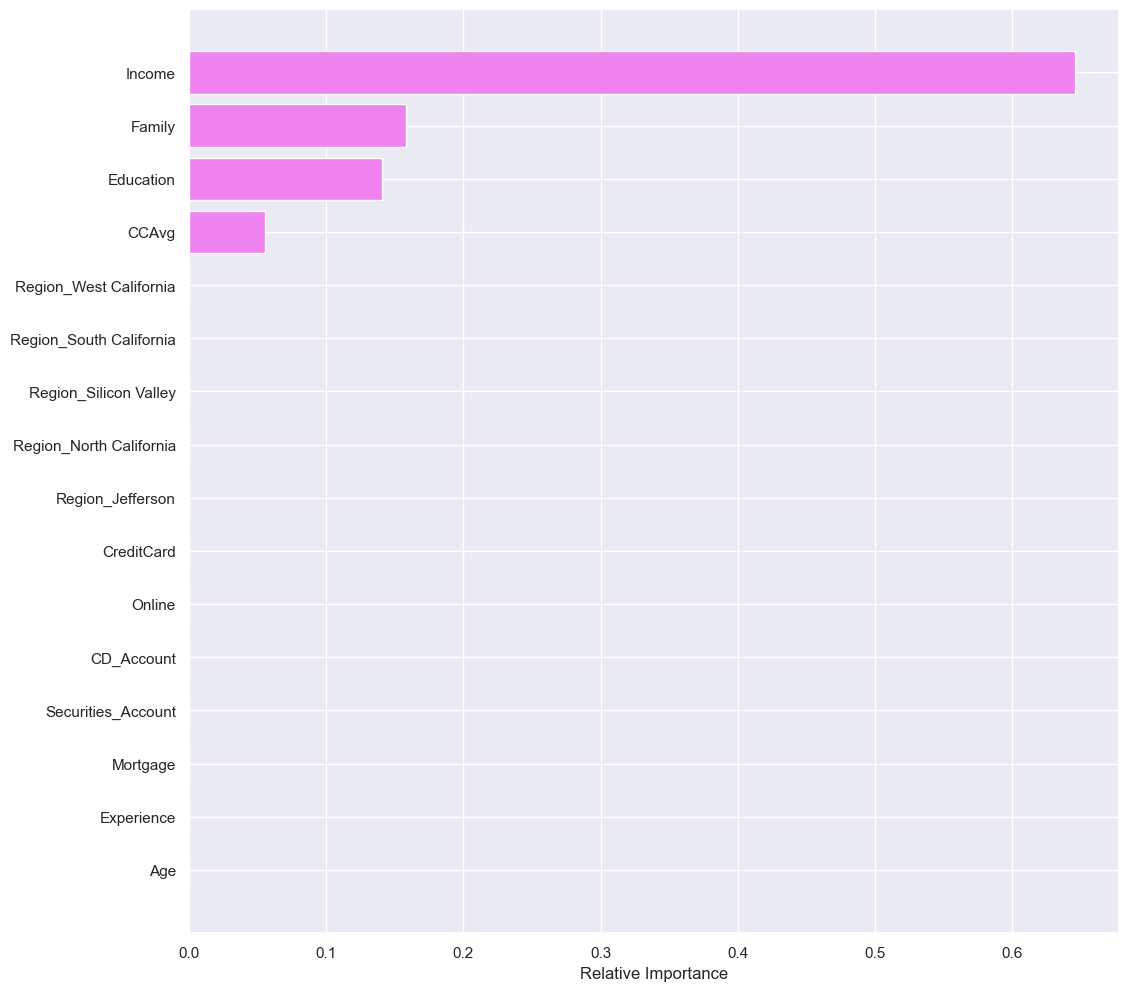

In [152]:
# Lets plot the importance of features in the Post-Pruned Tree Model:

importances = tree_model_post.feature_importances_
indices = np.argsort(importances)

print('\033[1m' , '\033[92m' , 'Importance Features Plot (Post-Pruned Tree):' , '\033[0m', '\033[92m', sep='')
plt.figure(figsize=(12,12))
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [indep_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<left> <font size=5 style='font-family:Courier New' color='Grey'> **10.21 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** As noticed in the Features Importance Plot, Income Feature still has the most Important when predicting the Acceptance of a Personal Loan.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Family, CCAvg, and Education features still have convergent imprtances with the same order of impacting as derived in the pre_pruned Tree Model.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** all the remaining Feature Importances still have Zeros as derived in the Pre-Pruned Tree Model!

<left> <font size=5 style='font-family:Courier New' color='darkgreen'> **10.22 Interpretations (Post-Pruning Decision Rules):**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** If a Customer has an Income less than or equal to 98.5 Thousand USD/Year and an Average Spending on Credit Card greater than 2.95 Thousand USD/Month, then it will be highly marked as promised Customer to accept the Personal Loan (Class 1).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** If a Customer has an Income greater than 98.5 Thousand USD/Year, Education Level less than or equal to 1.5 (Logically, Consider it as less than or equal to 1 since no Fractions in Education Level), and a Family Size greater than 2.5 Members (Logically, consider it as greater than or equal to 3 Members since no fractions in Family Size!), then it will be highly marked as promised Customer to accept the Personal Loan (Class 1).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Finally, if a Customer has an Income greater than 98.5 Thousand USD/Year, Education Level greater than 1.5 (Logically, Consider it as greater than or equal to 2 since no Fractions in Education Level), and again an Income greater than 116.5 Thousand USD/Year, then it will be highly marked as promised Customer to accept the Personal Loan (Class 1).

In [153]:
# Lets compare the Logsitic Model with Decision Tree Model (Performance Metrics):

train_metrics_comp = pd.concat([train_metrics_init .T ,
                                train_metrics_roc.T ,
                                train_metrics_cur.T , 
                                train_metrics_full.T , 
                                train_metrics_pre.T , 
                                train_metrics_post.T , ] , axis=1)

train_metrics_comp.columns=['Logistic, TH = ' + str('{0:.2}'.format(threshold_init)) ,
                            'Logistic, TH = ' + str('{0:.2}'.format(threshold_roc)) ,
                            'Logistic, TH = ' + str('{0:.2}'.format(threshold_cur)) ,
                            'Full Tree' ,
                            'Pre-Pruned Tree' ,
                            'Post-Pruned Tree']

print('\033[1m' , '\033[92m' , 'Training Performance Comparison:' , 
      '\033[0m' , '\033[92m' , sep = '')

with pd.option_context('expand_frame_repr', False):
    print(train_metrics_comp)

Training Performance Comparison:
           Logistic, TH = 0.5  Logistic, TH = 0.081  Logistic, TH = 0.34  Full Tree  Pre-Pruned Tree  Post-Pruned Tree
Accuracy             0.951714              0.876000             0.948571        1.0         0.926000          0.935143
Recall               0.634441              0.915408             0.712991        1.0         0.990937          0.990937
Precision            0.813953              0.427362             0.735202        1.0         0.561644          0.594203
F1 Score             0.713073              0.582692             0.723926        1.0         0.716940          0.742922


In [154]:
test_metrics_comp = pd.concat([test_metrics_init .T ,
                               test_metrics_roc.T ,
                               test_metrics_cur.T , 
                               test_metrics_full.T , 
                               test_metrics_pre.T , 
                               test_metrics_post.T , ] , axis=1)

test_metrics_comp.columns=['Logistic, TH = ' + str('{0:.2}'.format(threshold_init)) ,
                           'Logistic, TH = ' + str('{0:.2}'.format(threshold_roc)) ,
                           'Logistic, TH = ' + str('{0:.2}'.format(threshold_cur)) ,
                           'Full Tree' ,
                           'Pre-Pruned Tree' ,
                           'Post-Pruned Tree']

print('\033[1m' , '\033[92m' , 'Testing Performance Comparison:' , 
      '\033[0m' , '\033[92m' , sep = '')

with pd.option_context('expand_frame_repr', False):
    print(test_metrics_comp)

Testing Performance Comparison:
           Logistic, TH = 0.5  Logistic, TH = 0.081  Logistic, TH = 0.34  Full Tree  Pre-Pruned Tree  Post-Pruned Tree
Accuracy             0.946000              0.884000             0.948571   0.974667         0.930000          0.939333
Recall               0.563758              0.872483             0.712991   0.852349         0.979866          0.986577
Precision            0.840000              0.456140             0.735202   0.888112         0.588710          0.622881
F1 Score             0.674699              0.599078             0.723926   0.869863         0.735516          0.763636


In [155]:
# Finally, lets compare the Logsitic Model with Decision Tree Model (TN, FP, FN, and TP):

test_values_comp = pd.concat([cm_init , cm_roc , cm_cur , cm_full , cm_pre , cm_post] , axis=1)

test_values_comp.columns=['Logistic, TH = ' + str('{0:.2}'.format(threshold_init)) ,
                          'Logistic, TH = ' + str('{0:.2}'.format(threshold_roc)) ,
                          'Logistic, TH = ' + str('{0:.2}'.format(threshold_cur)) ,
                          'Full Tree' ,
                          'Pre-Pruned Tree' ,
                          'Post-Pruned Tree']

test_values_comp.index=['TN' , 'FP' , 'FN' , 'TP' ]

print('\033[1m' , '\033[92m' , 'Testing Values Comparison:' , 
      '\033[0m' , '\033[92m' , sep = '')

with pd.option_context('expand_frame_repr', False):
    print(test_values_comp)

Testing Values Comparison:
    Logistic, TH = 0.5  Logistic, TH = 0.081  Logistic, TH = 0.34  Full Tree  Pre-Pruned Tree  Post-Pruned Tree
TN                1335                  1196                 1317       1335             1249              1262
FP                  16                   155                   34         16              102                89
FN                  65                    19                   50         22                3                 2
TP                  84                   130                   99        127              146               147


<left> <font size=5 style='font-family:Courier New' color='Red' > **10.23 Notes:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Logistic, TH = 0.5:** Logistic Regression Model with Default Threshold.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Logistic, TH = 0.081:** Logistic Regression Model with ROC-AUC Threshold .
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Logistic, TH = 0.34:** Logistic Regression Model with Precision-Recall Curve Threshold.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Full Tree:** Decision Tree Model without Pruning.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Pre-Pruned Tree:** Decision Tree Model with Pre-Pruning (Early Stopping).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Post-Pruned Tree:** Decision Tree Model with Post-Pruning.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **TN:** True Negatives; Predict a Customer will reject the Persoanl Loan and in fact he will reject it.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **FP:** False Positives; Predict a Customer will accept the Persoanl Loan while in fact he will reject it.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **FN:** False Negatives; Predict a Customer will reject the Persoanl Loan while in fact he will accept it /<left> <font size=3 style='font-family:Courier New' color='orange'>**Loss of Opportunity - Must be minimized**.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **TP:** True Positives; Predict a Customer will accept the Persoanl Loan and in fact he will accept it.

<left> <font size=5 style='font-family:Courier New' color='darkblue'> **10.24 Conclusions (Decision Tree):**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** We have been able to build a predictive Decision Tree Model that can be used by AllLife Bank to find the Depositor Customers who have the highest probability to move into Depositors/Borrowers Segment and setup the processes and plans accordingly.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Taking our Target Metric into consideration (Recall), we found that the Decision Tree Model using Post-Pruning Technique has the best performance on both Training and Testing Subsets (Recall = 0.9866 on Testing Subset), as well as its ability to acheive the minimum value of FN (FN = 2 on Testing Subset) among other Decision Tree models.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** The features of Income, Education Level, Family Size, and Average Spending on Credot Cards have the impact on moving into the Borrowers Segment, while other features of CD_Account, Securities Account, Credit Card, Online, Experience, Age, Mortgage, and Regions have a Zero impact to imrove such movement.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **11. Recommendations (Decision Tree):**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** At the outset, the business owner (AllLife Bank) must realize that out of all the customer's data he owns; Income, Education Level, Average Spending on Credit Cards, and Family Size are the most influential factors in finding target customers who will be potential personal loan acceptors (Borrowers/Assets Customers) in the next campaign.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** As the Average Spending on Credit Cards has a positive impact on the Personal Loan acceptance, AllLife Bank must improve and launch intensive marketing plans to attract new customers to issue a Credit Cards as well as encouraging the Depositor Customers who already have it to increase their usage in daily transactions/shopping.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** During EDA, we found that 50% of Customers have an Average spending on Credit Cards between 0.7 and 2.5 Thousand USD/Month while our Model requires Average Spending exceeds 2.95 Thousands USD/Month to mark the Customer as potential Borrower. Thus, Marketing Plans in previous point must be targeted to increase the Depositor Customers Spending to exceed the Threshold of 2.95 Thousand USD/Month as well as offering the Loan to Depositor Customers who has already exceeded this Threshold.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Low fees Credit Cards, loyalty programs, rewards and discount's agreements with retail stores, hotels, airlines, car rentals, etc, will have a great impact in increasing the customers spending as well as attracting new customers.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** Expanding the customers base who have a large Family Size will be fruitful, Kids savings programs (Securing a decent life in the future and tuition fees) would be a priority to attract new customers with larger family size rather than singles and Newly married customers.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** During EDA, we found that 55.36% of Customers have a Family Size between 1 and 2 while our Model requires a Family Size greater than or equal to 3 Members to mark the Customer as potential Borrower. Thus, Marketing Plans in previous point must be targeted to attract Customers with large Family Size as well as offering the Loan to Depositor Customers who has already this large Family Size.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Although Customers with lower Income less than or equal to 98.5 Thousand USD/Year have a probability to move into Depositor/Borrower Segment especially when their Average Spending on Credit Cards exceed 2.95 THousand USD/Month, they still represents small portion when comparing them with Customers with bigger Family Size and an Income exceeding 98.5 Thousand USD/Year .

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8.** Attracting new customers with higher Income as they have a higher tend into accepting the Personal Loan.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **9.** During EDA, we found that 75% of Customers have an Income between 8 and 98 Thousand USD/Year while our Model requires an Income greater than 98.5 Thousand USD/Year to mark the Customer as potential Borrower (Income less than or equal to 98.5 has fewer impcat). Thus, Marketing Plans to target new Customers with higher Income as well as offering the Loan to Depositor Customers who has already this high Income.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **10.** If not already exists, VIP Service Centres must be established to offer a distinguished service to high income customers in order to maintain their loyalty and to prevent losing them.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **11.** Creative Advertisements must be prepared in order to introduce the current and promised customers with the benefits of having an account in AllLife Bank and why it's distinguished from other competitors in the market.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **12.** Paying more attention in targeting the Graduate and Advanced/Professional customers as they have higher tended into accepting the Personal Loan. Marketing Team must be aware about where to find these types of customers and work accordingly.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **13.** During EDA, we found that 41.92% of Customers have an Education Level of Undergrad while our Model requires Graduate or Advanced/Professional to mark the Customer as potential Borrower. Thus, Marketing Plans to target new Customers with higher Education Level as well as offering the Loan to Depositor Customers who has this high Level of Education.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **14.** Although It's not included in the Dataset, an In-Depth Study about the distribution of AllLife Bank Branches and the availability of its ATMs would be great to relocate them in a manner result in facilitating the bank services. i.e.: AllLife Bank must not expect a promised customer to accept the offer of opening an account or accepting a Personal Loan if this customer doesn’t feel comfortable when seeking for a Bank Branch, ATM, or After-Sale Services.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **15.** Also, a questionnaire might be important to understand the customer's needs, and their satisfaction with the Bank's services and working accordingly in adopting the results to enhance the services and to generate a new and attractive models of Personal Loans.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **16.** Overall, it's worthy to recommend the AllLife Marketing Team to focus on the below segment of Customers:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Customers whose Income is less than or equal to 98.5 Thousand USD/Year and their Average Spending on Credit Cards exceed 2.95 Thousand USD/Month.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Customers whose Income is greater then 98.5 Thousand USD/Year with Undergrad Education Level and have a large Family Size more than 2 Members.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Customers whose Income is greater then 116.5 Thousand USD/Year with Garduate or Advanced/Professional Education Level.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **17.** Technically, the summation of the TP in both Training and Testing Subsets (Post-Pruned Tree) is 475 (Borrowers: Class 1) while the current No. of Borrowrs in Dataset is 480! Thus, deploying the Model on current Customers won't have that much benifits. Thus, it's better to deploy the extracted influential features as a base line to wotk on attracting new customers matching to such features.

<left> <font size=6 style='font-family:Courier New' color='red' > **12. Logistic Regression vs Decision Tree:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** It's obvious that the best Logistic Model has been achieved by using the Threshold of ROC-AUC (0.081); Such Model has a Recall Values equals to 0.915408 and 0.872483 on Training and Testing Subsets respectively. Also, the FN on Testing Subset has the value of 19.  

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Similarly, the best Decision Tree Model has been achieved by using the Post-Pruning Technique; Such Model has a Recall Values equals to 0.990937 and 0.986577 on Training and Testing Subsets respectively. Also, the FN on Testing Subset has the value of 2.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Comparing the Post-Pruned Tree Model with the best Logistic Model (Threshold = 0.081), Post-Pruned Tree Model shows a valuable advantage of returning higher Recall and lower FN Values, which make it a premium model to satisfy AllLife Bank needs in predicting the Borrower Customers.
    
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** In addition to higher Recall Value, Post-Pruned Tree Model offers a higher Values of Accuracy, Precision, and F1 Score on both Training and Testing Subsets, which make it more adaptable to be used to minimize the FP as well as the main purpose of minimizing the FN.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** While CD_Account, Education Level, Family Size, and Experience are the most influential factors in predicting Borrower Customers using the Logistic Model, Post-Pruned model focus on Income, Education Level, Average Spending on Credit Cards, and Family Size as the most influential factors.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** While Credit Card, Online, Securities Account, and Jefferson Region are the most influential factors in excluding Borrower Customers using the Logistic Model, Post-Pruned Tree has changed the importance of these features - and others as well - into Zeros and kept only 4 Features with Depth of 3.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Instead of using 17 Features in Logistic Regression Model to predict the probability of a Customer to move into Depositors/Borrowers Segment, only 4 of them will be more than enough in Post-Pruned Tree Model to preict the same with more accurate returns.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8.** Finally, we strongly advice the Business Owner (AllLife Bank) to use the Post-Pruned Tree Model as the base to build all policies and plans to predict and move Customers from Loyality (Depositor) Customers Segment into Depositor/Borrowers Segment. 